In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing # to normalize the data and to convert non-numeric values to numeric values
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [3]:
df = pd.read_csv('Rental-Contracts-Non-Landed-Housing-Dev - removedNA.csv')
# df.head()
print(df.columns)

Index(['S/N', 'Building/Project Name', 'Street Name', 'Postal District',
       'Type', 'No. of Bedroom(for Non-Landed Only)', 'Monthly Gross Rent($)',
       'Floor Area (sq ft)', 'Lease Commencement Date'],
      dtype='object')


In [4]:
# Converting the non-numeric data to numeric
# In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number.
#  sklearn has a method that can do this.

# Start by creating a label encoder object and then use
# that to encode each column of data into integers
le = preprocessing.LabelEncoder()

# The method fit_transform() takes a list (each of the columns) and will return an array containing new values.
building_name = le.fit_transform(list(df["Building/Project Name"]))
street_name = le.fit_transform(list(df["Street Name"]))
postal_district = le.fit_transform(list(df["Postal District"]))
property_type = le.fit_transform(list(df["Type"]))
floor_area = le.fit_transform(list(df["Floor Area (sq ft)"]))
lease_date = le.fit_transform(list(df["Lease Commencement Date"]))
# num_of_bedrooms = le.fit_transform(list(df["No. of Bedroom(for Non-Landed Only)"]))
# monthly_rent = le.fit_transform(list(df["Monthly Gross Rent($)"]))
num_of_bedrooms = (list(df["No. of Bedroom(for Non-Landed Only)"]))
monthly_rent = (list(df["Monthly Gross Rent($)"]))

print(property_type)
print(building_name)
print(street_name)
print(floor_area)
print(lease_date)
print(postal_district)
#print(num_of_bedrooms)
#print(monthly_rent)

predict = "Monthly Gross Rent($)"

# Recombine the data into a feature list and a label list
# features
X = list(zip(property_type, building_name, street_name, floor_area, 
             lease_date, postal_district, num_of_bedrooms, monthly_rent)) 
# labels
y = list(monthly_rent)

# Finally we will split our data into training and testing data using the same process seen previously.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)


[0 0 0 ... 0 0 0]
[ 482 1920  898 ...  251  209 1319]
[231 599 441 ... 726  77 586]
[27 25  1 ... 27 24 25]
[19 19 19 ... 35 35 35]
[ 2  0  0 ... 24 25 26]


In [5]:
# Creating a KNN Classifier is almost identical to how we created the linear regression model. 
# The only difference is we can specify how many neighbors to look for as the argument n_neighbors.

model = KNeighborsClassifier(n_neighbors = 9)

# Train the model
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy', accuracy)

predictions = model.predict(X_test)
names = ["unacc", "acc", "good", "vgood"]

# This will display the predicted class, our data and the actual class
# We create a names list so that we can convert our integer predictions into 
# their string representation 
for x in range(len(predictions)):
    print("Predicted: ", predictions[x], "Data: ", X_test[x], "Actual: ", y_test[x])
    # Now we will we see the neighbors of each point in our testing data
    n = model.kneighbors([X_test[x]], 9, True)
    print("N: ", n)
 


Accuracy 0.9448247978436658
Predicted:  2300 Data:  (0, 1860, 611, 24, 7, 19, 1, 2300) Actual:  2300
N:  (array([[ 2.        , 11.04536102, 16.4924225 , 16.4924225 , 19.26136028,
        20.14944168, 21.14237451, 22.09072203, 24.        ]]), array([[ 86601, 325161, 272674,  39893,  49542, 145065, 234785, 193849,
        168963]]))
Predicted:  5800 Data:  (0, 199, 73, 1, 5, 8, 3, 5800) Actual:  5800
N:  (array([[ 3.16227766,  3.31662479,  9.53939201, 10.48808848, 10.90871211,
        11.91637529, 17.8605711 , 18.52025918, 20.85665361]]), array([[ 90442, 230983,  61885, 140691, 137223, 212174, 248932,  86713,
         26389]]))
Predicted:  3500 Data:  (0, 817, 302, 2, 51, 21, 4, 3500) Actual:  3500
N:  (array([[ 2.44948974,  8.1240384 , 17.05872211, 18.05547009, 18.05547009,
        19.05255888, 20.04993766, 22.04540769, 22.04540769]]), array([[ 16878,  55831, 235851,   2243, 139941, 182079, 230862, 101752,
        296723]]))
Predicted:  3300 Data:  (0, 704, 192, 23, 21, 1, 1, 3300) Actu

N:  (array([[ 1.        ,  1.        ,  2.        ,  3.        , 26.60826939,
        26.90724809, 28.26658805, 28.63564213, 30.33150178]]), array([[147153,  34246, 127886, 205328,  68883, 228752, 192029,  21584,
        270319]]))
Predicted:  4100 Data:  (0, 1673, 125, 0, 58, 3, 2, 4100) Actual:  4100
N:  (array([[ 5.38516481, 22.        , 26.07680962, 27.09243437, 40.        ,
        44.        , 44.46346815, 44.82186966, 46.        ]]), array([[ 86207, 286643, 332653, 224000, 121517, 145621, 245056, 128918,
        279025]]))
Predicted:  3100 Data:  (0, 704, 192, 23, 48, 1, 1, 3100) Actual:  3100
N:  (array([[0.        , 0.        , 1.        , 1.41421356, 3.        ,
        3.        , 3.        , 3.        , 3.        ]]), array([[154980, 106389, 224282, 294133, 223282,  56412, 240462, 184337,
        175018]]))
Predicted:  4500 Data:  (0, 1888, 362, 6, 5, 11, 4, 4500) Actual:  4500
N:  (array([[ 5.47722558, 15.16575089, 21.23676058, 21.44761059, 22.18107301,
        33.57082066

N:  (array([[ 2.        ,  2.        ,  4.        ,  5.09901951,  7.        ,
         8.06225775,  9.        , 10.04987562, 15.03329638]]), array([[ 58460, 129940,  92703,  12232, 203736, 319153,  19916, 242883,
         71624]]))
Predicted:  2700 Data:  (0, 1670, 705, 2, 43, 4, 3, 2700) Actual:  2700
N:  (array([[ 2.        ,  5.        , 10.        , 25.19920634, 25.35744467,
        25.37715508, 25.51470164, 25.53429067, 25.67099531]]), array([[107924, 169782, 250766, 168463, 302917, 284734, 318523, 259116,
         65115]]))
Predicted:  6500 Data:  (0, 901, 442, 1, 18, 0, 2, 6500) Actual:  6500
N:  (array([[3.87298335, 4.47213595, 5.        , 5.19615242, 5.91607978,
        5.91607978, 6.        , 6.        , 6.        ]]), array([[248051,  34218, 317238, 320177, 164604, 135383, 113994, 266516,
        129086]]))
Predicted:  2200 Data:  (0, 868, 481, 22, 27, 9, 1, 2200) Actual:  2200
N:  (array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]]), array([[ 25004, 157982,  26954, 154981, 325838

N:  (array([[1.        , 2.        , 3.31662479, 6.08276253, 6.164414  ,
        6.164414  , 6.40312424, 7.07106781, 8.06225775]]), array([[ 70470,  95539,  15919, 211337,  36510,  44565,  56465,  70581,
        196127]]))
Predicted:  2600 Data:  (0, 670, 230, 2, 42, 20, 3, 2600) Actual:  2600
N:  (array([[ 2.        ,  3.        ,  3.16227766,  5.09901951,  6.        ,
         6.32455532, 11.40175425, 12.64911064, 13.        ]]), array([[161114, 139382,   6467,  67959,  55403,   2526,  72265, 286358,
        104617]]))
Predicted:  3400 Data:  (0, 1050, 503, 25, 20, 8, 1, 3400) Actual:  3400
N:  (array([[15.03329638, 17.17556404, 19.54482029, 20.37154879, 21.21320344,
        21.21320344, 22.93468988, 26.5894716 , 27.71281292]]), array([[145655, 300218, 310645,  77160, 146737, 103968, 180346,  40208,
         80594]]))
Predicted:  2800 Data:  (0, 1677, 341, 25, 30, 21, 2, 2800) Actual:  2800
N:  (array([[1.        , 1.        , 2.        , 3.        , 4.        ,
        5.        , 5

Predicted:  3000 Data:  (0, 1864, 29, 24, 9, 9, 1, 3000) Actual:  3000
N:  (array([[ 3.        ,  4.        ,  7.        ,  8.        ,  9.        ,
        34.53983208, 35.35533906, 35.41186242, 35.51056181]]), array([[309197,  53273, 281369, 232787, 326517, 277620, 264150, 247224,
        213845]]))
Predicted:  2150 Data:  (0, 798, 338, 23, 37, 18, 2, 2150) Actual:  2150
N:  (array([[ 4.        ,  5.        ,  5.        , 14.07124728, 15.        ,
        15.03329638, 16.        , 18.        , 19.        ]]), array([[ 36971,  86989,   6797, 323317, 241679,  27531, 142246, 197022,
          1194]]))
Predicted:  25000 Data:  (0, 1701, 520, 29, 22, 8, 4, 25000) Actual:  25000
N:  (array([[  2.        , 294.44524109, 336.90057881, 336.90354703,
        337.49518515, 338.23512532, 338.41838012, 449.76215937,
        542.26469551]]), array([[138141, 263086, 300901,  28114, 305513, 296617,  33886, 219016,
        279584]]))
Predicted:  4200 Data:  (0, 472, 711, 5, 34, 11, 3, 4200) Actual:  

N:  (array([[1.        , 1.41421356, 1.73205081, 2.82842712, 3.31662479,
        3.31662479, 3.31662479, 3.60555128, 3.74165739]]), array([[ 46048, 286529,  54576,  54912,   2135,  96952, 319301, 205635,
        305925]]))
Predicted:  1900 Data:  (0, 1939, 669, 22, 24, 14, 1, 1900) Actual:  1900
N:  (array([[ 2.23606798,  2.23606798,  2.44948974,  3.16227766,  4.12310563,
         5.09901951,  6.08276253, 11.        , 11.44552314]]), array([[301296,  81802, 183474, 290950,  94898, 240363, 250853, 234747,
         85319]]))
Predicted:  1700 Data:  (0, 1253, 168, 23, 46, 26, 2, 1700) Actual:  1700
N:  (array([[ 1.        ,  1.        ,  2.23606798,  5.09901951,  9.05538514,
         9.11043358,  9.32737905, 10.39230485, 11.        ]]), array([[265115,  32089, 295608, 203682,  83187,  99743, 137098, 111826,
        267391]]))
Predicted:  2800 Data:  (0, 1419, 629, 0, 40, 9, 2, 2800) Actual:  2800
N:  (array([[ 3.        ,  6.78232998,  7.68114575, 11.5758369 , 12.92284798,
        12.9228

N:  (array([[ 5.09901951,  6.32455532,  7.07106781,  8.1240384 , 10.        ,
        10.04987562, 21.09502311, 26.01922366, 36.01388621]]), array([[264002, 240907, 108402, 120514, 237424,  63087,  49703,  99975,
        222277]]))
Predicted:  4600 Data:  (0, 364, 116, 2, 56, 9, 2, 4600) Actual:  4600
N:  (array([[ 3.        , 22.        , 23.        , 31.43246729, 32.04684072,
        33.40658618, 33.45145737, 33.64520768, 33.64520768]]), array([[114188, 331843, 107379, 295385, 154221, 170253,  86997, 209427,
        196140]]))
Predicted:  2500 Data:  (0, 923, 603, 0, 22, 17, 2, 2500) Actual:  2500
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.23606798,
        3.        , 4.        , 4.12310563, 4.24264069]]), array([[201547,   3225, 228367, 137376, 111134, 228152,  35960, 277400,
        103582]]))
Predicted:  1800 Data:  (0, 1098, 543, 22, 18, 18, 1, 1775) Actual:  1775
N:  (array([[ 6.40312424,  7.07106781, 25.        , 25.        , 25.01999201,
        25.0798724

N:  (array([[ 9.21954446, 10.04987562, 16.0623784 , 18.11077028, 38.39270764,
        42.22558466, 42.44997055, 42.59107888, 42.63801121]]), array([[220157, 183162, 286626,  99998,  90631, 233195, 161825, 125794,
         24209]]))
Predicted:  4500 Data:  (0, 648, 129, 5, 45, 4, 4, 4500) Actual:  4500
N:  (array([[ 4.12310563,  7.28010989,  8.1240384 ,  9.        ,  9.        ,
         9.        , 11.44552314, 12.20655562, 13.37908816]]), array([[298022,  69812,  26795, 238807, 246266,  15912, 159264, 213374,
        323245]]))
Predicted:  3900 Data:  (0, 1047, 294, 0, 25, 9, 2, 3900) Actual:  3900
N:  (array([[ 1.,  2.,  3.,  4., 10., 11., 13., 17., 17.]]), array([[304495, 200591, 213057,  23934, 331450,  67646, 229562, 251266,
        210813]]))
Predicted:  2800 Data:  (0, 1115, 111, 0, 10, 21, 2, 2800) Actual:  2800
N:  (array([[2.44948974, 2.44948974, 2.44948974, 2.44948974, 3.        ,
        3.        , 3.        , 3.        , 3.        ]]), array([[207697,  37341, 332406,  199

N:  (array([[ 1.        ,  4.58257569,  5.09901951, 25.0998008 , 27.01851217,
        36.01388621, 38.01315562, 42.        , 42.64973622]]), array([[290212,  93992,  75967, 313399, 311835, 169815, 119294,   7221,
        159406]]))
Predicted:  5200 Data:  (0, 91, 562, 3, 3, 8, 3, 5200) Actual:  5200
N:  (array([[ 2.23606798,  3.        ,  3.        ,  3.74165739,  3.74165739,
         5.09901951,  6.78232998, 10.24695077, 10.24695077]]), array([[ 59999,  84275, 220851, 223236, 258846,  20145, 245134, 308976,
        192939]]))
Predicted:  2400 Data:  (0, 1736, 517, 0, 16, 17, 3, 2400) Actual:  2400
N:  (array([[ 1.,  4.,  5.,  9., 10., 11., 11., 11., 11.]]), array([[128758, 285992, 303330, 191902,  88073, 270754, 295324,  39044,
        243617]]))
Predicted:  2450 Data:  (0, 1106, 174, 1, 31, 16, 3, 2450) Actual:  2450
N:  (array([[ 3.        , 14.        , 16.        , 26.        , 34.71310992,
        49.25444142, 50.        , 50.        , 50.009999  ]]), array([[101860, 127225,  490

N:  (array([[ 1.        ,  1.        ,  2.23606798,  3.16227766,  4.12310563,
         5.47722558,  7.07106781, 10.04987562, 11.04536102]]), array([[ 52907, 110321, 246487, 217072, 332700, 137474, 243158,  74776,
         39016]]))
Predicted:  3500 Data:  (0, 2006, 714, 26, 40, 8, 2, 3500) Actual:  3500
N:  (array([[ 1.41421356, 18.02775638, 18.70828693, 22.22611077, 24.08318916,
        24.33105012, 26.34387974, 27.80287755, 28.37252192]]), array([[121340, 104302,  66804, 134391, 257173, 225967, 148762, 272817,
         76988]]))
Predicted:  1950 Data:  (0, 1404, 694, 23, 27, 18, 2, 1950) Actual:  1950
N:  (array([[ 1.        , 19.02629759, 32.07802986, 32.61901286, 32.83291032,
        32.83291032, 33.30165161, 33.58571125, 36.30426972]]), array([[ 23743, 280647, 136676,  68311,  47702, 245692, 128631, 233161,
        140007]]))
Predicted:  1900 Data:  (0, 1105, 300, 25, 22, 21, 1, 1900) Actual:  1900
N:  (array([[ 1.        , 12.12435565, 12.80624847, 14.56021978, 21.67948339,
     

N:  (array([[ 1.        ,  1.41421356,  2.        , 16.        , 16.03121954,
        17.        , 18.        , 18.02775638, 19.        ]]), array([[ 12355,  88558, 202065, 249400, 230823,  74395, 285438,  10931,
         79322]]))
Predicted:  3800 Data:  (0, 268, 262, 2, 5, 2, 3, 3800) Actual:  3800
N:  (array([[ 1.,  1.,  2.,  4.,  5.,  7.,  9., 12., 14.]]), array([[225344, 259122, 125735, 190357,  70245, 152487, 271894,  59890,
        255469]]))
Predicted:  5200 Data:  (0, 288, 247, 14, 52, 20, 4, 5200) Actual:  5200
N:  (array([[54.04627647, 55.82114295, 56.00892786, 62.        , 66.1135387 ,
        68.41052551, 71.21797526, 75.31268154, 75.36577473]]), array([[233297,  14140, 136060,  74324, 175608,  68544, 179381, 149946,
        218041]]))
Predicted:  3500 Data:  (0, 1717, 433, 26, 7, 8, 4, 3500) Actual:  3500
N:  (array([[ 1.        ,  2.        ,  2.44948974,  6.        , 21.11871208,
        26.01922366, 26.2297541 , 26.47640459, 26.75817632]]), array([[301011, 329984,  801

N:  (array([[ 4.,  5.,  5.,  6.,  6.,  7.,  8., 11., 23.]]), array([[224339, 218192,  36996, 231214, 239829, 201803,  48070, 305504,
         49382]]))
Predicted:  6000 Data:  (0, 1146, 665, 8, 0, 14, 3, 6000) Actual:  6000
N:  (array([[0.        , 5.        , 5.        , 5.        , 6.70820393,
        6.70820393, 8.        , 8.48528137, 9.        ]]), array([[158248, 333835,   3558,  28093,  99752, 113020, 221266,  43944,
        142559]]))
Predicted:  3800 Data:  (0, 1435, 694, 25, 14, 18, 2, 3800) Actual:  3800
N:  (array([[ 5.47722558, 10.24695077, 10.24695077, 51.12729212, 56.18718715,
        59.43904441, 59.68249325, 60.63827174, 64.40496875]]), array([[ 69598, 305595, 271724, 197433,  65377, 244327, 176096, 285506,
          4864]]))
Predicted:  6500 Data:  (0, 1669, 277, 2, 11, 8, 3, 6500) Actual:  6500
N:  (array([[1.        , 3.        , 3.        , 5.        , 5.83095189,
        5.83095189, 7.28010989, 7.28010989, 8.06225775]]), array([[131250,  88520, 150935, 220883, 162

N:  (array([[2.44948974, 2.64575131, 3.        , 3.16227766, 3.16227766,
        3.16227766, 3.16227766, 4.69041576, 4.69041576]]), array([[187714, 140976,  23380, 226857, 152860,  58801, 229182,  14067,
        209039]]))
Predicted:  3000 Data:  (0, 1059, 659, 0, 2, 15, 2, 3000) Actual:  3000
N:  (array([[ 1.        ,  1.73205081,  3.        , 18.        , 19.        ,
        24.        , 26.07680962, 27.01851217, 27.01851217]]), array([[170395,  70537, 202866,  98785, 133833, 235201, 169985,  14054,
         56697]]))
Predicted:  15000 Data:  (0, 1823, 328, 29, 58, 8, 5, 15000) Actual:  15000
N:  (array([[152.7743434 , 175.84936736, 178.55811379, 188.69817169,
        189.78935692, 190.05788592, 193.1243123 , 193.37269714,
        193.52777578]]), array([[241198, 290246, 322612, 176765, 120990, 181533,  47069, 121716,
        144105]]))
Predicted:  2500 Data:  (0, 1231, 695, 2, 15, 18, 3, 2500) Actual:  2500
N:  (array([[0., 0., 1., 1., 2., 2., 2., 3., 4.]]), array([[234483, 245697,

N:  (array([[ 3.        ,  4.12310563, 10.44030651, 13.03840481, 14.03566885,
        24.        , 26.92582404, 27.58622845, 29.25747768]]), array([[232486,  29752, 327984,  65505, 133950,  89146,  79561, 247896,
        158201]]))
Predicted:  5000 Data:  (0, 879, 499, 5, 11, 8, 3, 5000) Actual:  5000
N:  (array([[ 3.        , 20.02498439, 21.02379604, 22.02271555, 32.29551052,
        33.63034344, 35.12833614, 36.63331817, 37.4566416 ]]), array([[  3507, 244580, 198435, 248779, 158608, 142990, 290519,  20758,
         54677]]))
Predicted:  6500 Data:  (0, 1091, 508, 14, 25, 20, 3, 6500) Actual:  6500
N:  (array([[13.        , 15.5241747 , 18.43908891, 20.39607805, 21.23676058,
        21.37755833, 31.11269837, 32.68026928, 42.79018579]]), array([[101974, 333121, 248824,  10362, 221571,  78676, 242442,  20246,
         99663]]))
Predicted:  4000 Data:  (0, 1287, 562, 26, 1, 9, 3, 4000) Actual:  4000
N:  (array([[ 0.        ,  2.        , 12.        , 14.17744688, 23.87467277,
        2

N:  (array([[0., 1., 1., 2., 3., 3., 3., 4., 4.]]), array([[266494,  52530, 107319, 283010, 153279,   1498,  57328, 272037,
         10683]]))
Predicted:  5000 Data:  (0, 928, 238, 1, 39, 2, 3, 5000) Actual:  5000
N:  (array([[ 2.        ,  3.        ,  5.        ,  8.06225775,  8.06225775,
         8.1240384 ,  9.        ,  9.05538514, 11.        ]]), array([[ 75126,  95685, 153041, 302369,  88645, 139920, 153774, 324094,
        217181]]))
Predicted:  1900 Data:  (0, 127, 409, 22, 50, 18, 1, 1900) Actual:  1900
N:  (array([[1., 2., 2., 2., 2., 3., 3., 3., 4.]]), array([[ 70940,  78629, 182126,  63203, 308222, 249300, 154398, 243877,
         42045]]))
Predicted:  3400 Data:  (0, 252, 665, 2, 37, 14, 2, 3400) Actual:  3400
N:  (array([[ 9.05538514, 16.03121954, 17.29161647, 18.27566688, 19.05255888,
        19.05255888, 19.13112647, 19.23538406, 19.26136028]]), array([[286350, 324729,  73442, 180695,  49659,  15469, 139782,  49185,
        185468]]))
Predicted:  4200 Data:  (0, 335, 3

N:  (array([[1.        , 1.41421356, 2.        , 2.        , 5.91607978,
        6.        , 6.32455532, 6.78232998, 7.        ]]), array([[312291, 124227, 204938, 333725, 252225,  35304, 185225, 130115,
        141599]]))
Predicted:  2300 Data:  (0, 949, 328, 23, 37, 8, 1, 2300) Actual:  2300
N:  (array([[ 5.,  5.,  5.,  6., 10., 16., 17., 17., 18.]]), array([[329679, 261802, 237721, 136258, 209393, 192305, 174192, 138012,
         81169]]))
Predicted:  4500 Data:  (0, 1770, 441, 26, 7, 0, 2, 4500) Actual:  4500
N:  (array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 2.        ]]), array([[ 15738,  73544, 102976,  99952, 121289, 284237,  16433, 214202,
        308314]]))
Predicted:  4900 Data:  (0, 364, 116, 2, 53, 9, 2, 4900) Actual:  4900
N:  (array([[22.09072203, 23.        , 27.25802634, 27.89265136, 29.563491  ,
        33.66006536, 34.82814953, 35.7211422 , 36.06937759]]), array([[159148, 314792, 206261, 231223, 313917

N:  (array([[ 2.        , 17.40689519, 18.43908891, 19.31320792, 22.20360331,
        23.43074903, 23.8117618 , 24.75883681, 24.75883681]]), array([[201585,  19546, 124329,  91596, 230184, 239375, 150218, 260163,
        210510]]))
Predicted:  3850 Data:  (0, 881, 462, 27, 52, 1, 2, 3850) Actual:  3850
N:  (array([[ 3.        , 11.44552314, 28.4956137 , 28.4956137 , 31.73326331,
        45.        , 48.23898838, 50.009999  , 50.03998401]]), array([[280449,  10151, 119438, 263954, 244342, 136191,  89822, 243714,
        155299]]))
Predicted:  4300 Data:  (0, 1377, 668, 3, 14, 3, 3, 4300) Actual:  4300
N:  (array([[ 1.        ,  2.        ,  3.        , 48.72371086, 49.74937186,
        49.82971001, 49.8998998 , 51.75905718, 52.22068556]]), array([[ 69752, 169226, 114385, 218792, 209596, 122452, 101063, 260290,
        248624]]))
Predicted:  3500 Data:  (0, 1180, 639, 1, 18, 2, 3, 3500) Actual:  3500
N:  (array([[1., 1., 1., 1., 1., 2., 3., 3., 4.]]), array([[284672,  24807, 255021,  748

N:  (array([[28.37252192, 36.49657518, 41.25530269, 44.03407771, 57.93962375,
        58.13776741, 58.54058421, 58.77924804, 58.92367945]]), array([[206944, 321716,  31452, 126347, 291082, 116837,  90237,  49845,
        274893]]))
Predicted:  1500 Data:  (0, 1149, 511, 21, 57, 0, 1, 1500) Actual:  1500
N:  (array([[ 0.        ,  1.        ,  1.        ,  1.        ,  1.41421356,
         2.        ,  2.23606798, 11.        , 13.03840481]]), array([[ 50817, 299386,   8341,  11300, 154092, 259189, 158748,  32808,
        153975]]))
Predicted:  4800 Data:  (0, 1926, 562, 7, 38, 9, 3, 4800) Actual:  4800
N:  (array([[1.        , 1.41421356, 2.        , 2.        , 2.        ,
        2.        , 2.44948974, 2.82842712, 5.09901951]]), array([[ 66190,  41565, 135881,  53996,   4763, 237698, 250545, 298284,
        328918]]))
Predicted:  1900 Data:  (0, 815, 302, 22, 28, 21, 1, 1900) Actual:  1900
N:  (array([[ 2.44948974,  3.        ,  4.24264069,  4.58257569,  5.        ,
        16.      

N:  (array([[ 1.        , 15.03329638, 20.        , 46.5188134 , 56.5862174 ,
        57.39337941, 58.41232747, 60.44832504, 61.65225057]]), array([[193217, 128568, 231204,  41339,  45629, 279897,  34689, 238058,
        167039]]))
Predicted:  7200 Data:  (0, 1340, 598, 29, 44, 10, 2, 7200) Actual:  7200
N:  (array([[37.28270376, 37.38983819, 46.03259715, 46.08687449, 46.08687449,
        46.3788745 , 46.67976007, 47.0637865 , 48.37354649]]), array([[ 82025, 114409, 122164, 105347, 163973, 264960, 176947, 220476,
         63797]]))
Predicted:  4000 Data:  (0, 1815, 713, 27, 36, 9, 2, 4000) Actual:  4000
N:  (array([[22.22611077, 24.75883681, 25.01999201, 25.01999201, 25.33771892,
        25.51470164, 25.82634314, 26.03843313, 26.26785107]]), array([[229557, 311849, 294410, 329346, 326758, 135068, 246469, 295592,
        188546]]))
Predicted:  3600 Data:  (0, 1377, 668, 26, 16, 3, 2, 3650) Actual:  3650
N:  (array([[ 1.        , 49.81967483, 50.03998401, 50.08991915, 50.08991915,
      

N:  (array([[ 3.60555128, 14.56021978, 15.        , 18.24828759, 24.41311123,
        24.41311123, 32.23352292, 32.78719262, 33.13608305]]), array([[112991, 315388,  27649, 233445,  40957, 328189,  70204, 296077,
        323427]]))
Predicted:  4500 Data:  (0, 1039, 7, 3, 40, 14, 3, 4500) Actual:  4500
N:  (array([[ 2.        ,  5.        ,  5.09901951,  8.        , 12.        ,
        12.        , 12.        , 12.40967365, 13.        ]]), array([[258814, 247165, 304238, 195807, 113251, 205200,  51462, 156185,
        210245]]))
Predicted:  2300 Data:  (0, 1898, 203, 26, 28, 14, 2, 2300) Actual:  2300
N:  (array([[ 1.        , 19.05255888, 25.05992817, 25.07987241, 25.23885893,
        25.23885893, 25.37715508, 25.55386468, 25.76819745]]), array([[315524,  25382,   5224, 106635, 246005,  59291, 168527, 147541,
        113850]]))
Predicted:  3800 Data:  (0, 1553, 4, 5, 22, 2, 3, 3800) Actual:  3800
N:  (array([[1.        , 1.41421356, 2.        , 2.23606798, 4.        ,
        5.      

N:  (array([[ 5.09901951, 11.91637529, 12.92284798, 15.        , 15.13274595,
        16.        , 19.94993734, 20.02498439, 20.09975124]]), array([[129406, 150665,  83441, 154628,  95263, 119003,  20561, 177985,
        321028]]))
Predicted:  2300 Data:  (0, 929, 211, 3, 37, 22, 3, 2300) Actual:  2300
N:  (array([[2.23606798, 3.31662479, 5.        , 6.40312424, 6.78232998,
        8.        , 8.        , 8.83176087, 9.        ]]), array([[ 21265, 293731, 283432, 252054,  24905, 179939, 308307, 312943,
        297646]]))
Predicted:  1900 Data:  (0, 1841, 692, 22, 15, 18, 1, 1900) Actual:  1900
N:  (array([[15.03329638, 22.4053565 , 25.01999201, 29.3428015 , 29.46183973,
        29.61418579, 30.2654919 , 30.2654919 , 30.5450487 ]]), array([[ 50057, 313145, 332519,  78005,  59168, 208435, 241247, 193759,
        298547]]))
Predicted:  3700 Data:  (0, 1800, 69, 4, 5, 20, 3, 3700) Actual:  3700
N:  (array([[ 3.        ,  4.12310563,  9.05538514, 20.02498439, 21.        ,
        21.0950231

N:  (array([[ 9.        , 11.        , 12.        , 18.        , 23.        ,
        26.26785107, 27.        , 28.        , 32.        ]]), array([[199403,  72823, 137826,   4470, 216724, 304860, 233765, 193214,
         81487]]))
Predicted:  3400 Data:  (0, 1759, 68, 5, 20, 20, 4, 3400) Actual:  3400
N:  (array([[ 6.78232998,  6.78232998,  8.30662386, 10.81665383, 15.55634919,
        20.24845673, 20.42057786, 22.38302929, 28.51315486]]), array([[ 60586,  80545,  20625,   1217, 313971, 284505, 138214, 169966,
        305058]]))
Predicted:  1700 Data:  (0, 332, 517, 22, 32, 17, 1, 1700) Actual:  1700
N:  (array([[0., 0., 0., 1., 1., 2., 2., 2., 3.]]), array([[203482, 111069, 192980, 293924, 178493, 209707, 118259, 298234,
        284349]]))
Predicted:  3400 Data:  (0, 190, 70, 2, 3, 14, 3, 3400) Actual:  3400
N:  (array([[ 0.        ,  4.        , 10.04987562, 11.04536102, 14.        ,
        14.        , 15.03329638, 18.        , 18.        ]]), array([[258636, 146628, 202793, 11162

N:  (array([[ 0.        ,  1.        ,  3.16227766,  3.60555128, 14.        ,
        16.1245155 , 20.09975124, 21.09502311, 21.09502311]]), array([[ 83422,  26188, 163529, 106894,   2310, 310888, 106857, 219536,
        200060]]))
Predicted:  5000 Data:  (0, 413, 234, 3, 58, 11, 3, 5000) Actual:  5000
N:  (array([[17.77638883, 21.07130751, 21.65640783, 24.2693222 , 27.22131518,
        36.3868108 , 36.3868108 , 37.26929031, 53.        ]]), array([[302261, 189008,  62255, 297886,  90248, 191767, 264805, 146746,
         22644]]))
Predicted:  6250 Data:  (0, 1269, 316, 5, 50, 10, 3, 6250) Actual:  6250
N:  (array([[ 2.        ,  4.        ,  6.78232998,  9.53939201, 50.009999  ,
        50.04997502, 50.08991915, 67.27555277, 68.65129278]]), array([[328998,  14870,  91311, 218312,  97838,  91165,  87833, 290242,
         78194]]))
Predicted:  4800 Data:  (0, 364, 116, 2, 18, 9, 2, 4800) Actual:  4800
N:  (array([[13.15294644, 14.        , 15.68438714, 30.2654919 , 30.83828789,
        33

N:  (array([[36.        , 36.86461718, 39.        , 40.        , 54.64430437,
        54.77225575, 55.28109984, 55.64171097, 55.64171097]]), array([[ 99565, 328254,   9873, 283979,  98700,  78206, 181807,  61153,
        225934]]))
Predicted:  2250 Data:  (0, 1280, 143, 2, 59, 14, 2, 2250) Actual:  2250
N:  (array([[ 4.12310563, 44.38468204, 46.5832588 , 47.86439178, 48.36320916,
        48.856934  , 51.09794516, 53.77731864, 54.24942396]]), array([[161763, 211775, 176547, 136146,   6140, 263487, 206340, 153791,
        254807]]))
Predicted:  2500 Data:  (0, 806, 590, 25, 5, 18, 2, 2500) Actual:  2500
N:  (array([[0.        , 1.        , 1.        , 1.41421356, 1.73205081,
        1.73205081, 2.        , 2.        , 2.44948974]]), array([[260511,  14771, 103900,   6317, 147247,   2373, 183742,  91234,
        245044]]))
Predicted:  1800 Data:  (0, 1684, 89, 22, 34, 13, 1, 1800) Actual:  1800
N:  (array([[ 5.        ,  8.        ,  8.06225775,  9.        , 10.        ,
        18.      

N:  (array([[ 3.        ,  6.        ,  6.        ,  7.        ,  7.        ,
        14.86606875, 15.        , 15.03329638, 18.        ]]), array([[ 44120, 161072, 200123, 198035,  69039, 144531,  86935, 173900,
        325919]]))
Predicted:  2350 Data:  (0, 251, 726, 27, 20, 24, 2, 2350) Actual:  2350
N:  (array([[ 0.,  5.,  5.,  7.,  7.,  8.,  9., 10., 17.]]), array([[ 39441, 275982, 248739, 168727,  40458,  45504, 197795,  73076,
        252466]]))
Predicted:  6600 Data:  (0, 1846, 680, 4, 59, 8, 3, 6600) Actual:  6600
N:  (array([[15.03329638, 17.02938637, 21.02379604, 22.        , 26.30589288,
        30.01666204, 33.01514804, 42.        , 52.49761899]]), array([[297968, 289188,  50704, 103045, 223622, 288616, 166740, 181330,
         86494]]))
Predicted:  2500 Data:  (0, 606, 273, 0, 54, 20, 3, 2450) Actual:  2450
N:  (array([[33.24154028, 33.36165464, 50.0799361 , 50.0799361 , 50.15974482,
        50.17967716, 51.23475383, 51.45872132, 52.53570215]]), array([[255818, 171117,  1

N:  (array([[0.        , 1.        , 3.16227766, 3.16227766, 4.        ,
        4.12310563, 4.47213595, 5.        , 5.        ]]), array([[ 56451,  13291, 266368,  10863,  42561, 274826,  86194,  53009,
        295456]]))
Predicted:  5600 Data:  (0, 1301, 582, 9, 13, 9, 3, 5600) Actual:  5600
N:  (array([[4.        , 4.58257569, 4.58257569, 4.89897949, 5.38516481,
        5.38516481, 6.        , 6.70820393, 6.70820393]]), array([[273329, 227939, 245109, 192779, 102945, 190329,  99950, 113682,
        291944]]))
Predicted:  9500 Data:  (0, 1732, 497, 17, 55, 9, 3, 9500) Actual:  9500
N:  (array([[ 1.41421356,  2.        , 17.3781472 , 23.83275058, 25.69046516,
        33.28663395, 38.11823711, 39.01281841, 41.90465368]]), array([[254350, 138245,  75250,  62281, 234465,  82899, 188237, 173677,
        274189]]))
Predicted:  3100 Data:  (0, 299, 592, 3, 2, 18, 3, 3100) Actual:  3100
N:  (array([[ 1.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.09901951,  8.    

N:  (array([[ 1.        ,  3.        ,  5.        ,  6.        , 15.        ,
        25.86503431, 26.30589288, 26.30589288, 27.07397274]]), array([[107477, 227685, 138258,  32103, 140447,  66766, 107589, 132812,
        171828]]))
Predicted:  3500 Data:  (0, 1393, 474, 24, 53, 8, 2, 3500) Actual:  3500
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356,
        4.12310563, 5.09901951, 6.08276253, 6.08276253]]), array([[128677,  34707,  47367,  91883, 142386,  57823,  85322, 329506,
        193303]]))
Predicted:  4500 Data:  (0, 1197, 320, 0, 48, 3, 2, 4500) Actual:  4500
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356,
        2.        , 2.        , 3.        , 3.60555128]]), array([[274377, 218236,  11712, 110003, 230462,  36928,  65862, 209230,
          7770]]))
Predicted:  5300 Data:  (0, 697, 352, 14, 4, 8, 4, 5300) Actual:  5300
N:  (array([[ 1.        , 11.22497216, 12.36931688, 13.19090596, 36.12478374,
        49.62862077, 50.2493

N:  (array([[ 1.73205081,  2.44948974,  5.        ,  5.19615242,  6.164414  ,
         8.1240384 ,  8.1240384 , 10.        , 10.09950494]]), array([[ 60273, 246263,  64722,  72768, 284303, 149689, 127663,   1954,
        262920]]))
Predicted:  1900 Data:  (0, 1169, 694, 22, 42, 18, 1, 1900) Actual:  1900
N:  (array([[ 5.        , 15.        , 15.        , 19.        , 22.        ,
        22.        , 25.98076211, 26.19160171, 31.        ]]), array([[ 88663,  24096, 102384, 282103,  75773, 248084, 122604,  70129,
         43356]]))
Predicted:  3000 Data:  (0, 1321, 588, 5, 43, 25, 4, 3000) Actual:  3000
N:  (array([[ 4.69041576,  5.38516481,  6.244998  ,  9.74679434, 11.61895004,
        12.56980509, 12.76714533, 14.6628783 , 15.        ]]), array([[128639,  24970,  27247,  86698, 150529,   1284, 308910, 312846,
        198146]]))
Predicted:  4800 Data:  (0, 1928, 707, 9, 32, 4, 3, 4800) Actual:  4800
N:  (array([[ 3.16227766,  3.74165739,  5.        ,  5.09901951, 11.22497216,
       

N:  (array([[23.57965225, 24.0208243 , 24.0208243 , 25.94224354, 27.01851217,
        28.16025568, 28.37252192, 29.41088234, 30.01666204]]), array([[144709, 270205, 132815, 132931, 309653, 266444,   4134, 257438,
        200617]]))
Predicted:  2900 Data:  (0, 798, 338, 25, 53, 18, 2, 2900) Actual:  2900
N:  (array([[ 4.35889894,  4.58257569,  5.        ,  5.19615242,  5.56776436,
         7.41619849,  8.18535277, 11.22497216, 13.19090596]]), array([[145491, 324541,  24786, 238168, 331293, 201629, 283300, 223682,
         93648]]))
Predicted:  1850 Data:  (0, 987, 213, 22, 25, 22, 1, 1850) Actual:  1850
N:  (array([[ 3.31662479,  4.24264069,  6.164414  ,  6.164414  ,  7.54983444,
         8.48528137,  9.43398113, 10.09950494, 11.09053651]]), array([[ 86747, 136400,  51434, 322514,  71039,  31074, 242395,  81205,
        313444]]))
Predicted:  3300 Data:  (0, 944, 460, 6, 15, 26, 4, 3300) Actual:  3300
N:  (array([[ 1.        ,  6.08276253, 12.16552506, 16.46207763, 16.55294536,
        

N:  (array([[0.        , 1.        , 1.        , 1.41421356, 1.41421356,
        2.23606798, 3.        , 3.16227766, 3.16227766]]), array([[187858, 195993, 252651,  19664, 308876, 148799, 280670,  16949,
         71681]]))
Predicted:  7000 Data:  (0, 1248, 566, 11, 6, 8, 4, 7000) Actual:  7000
N:  (array([[4.12310563, 4.24264069, 4.24264069, 4.47213595, 4.58257569,
        5.09901951, 5.09901951, 5.47722558, 6.40312424]]), array([[ 12582, 142956,  33825,  22145, 150695, 148165, 209612,  29419,
        277709]]))
Predicted:  1800 Data:  (0, 20, 549, 22, 31, 7, 1, 1800) Actual:  1800
N:  (array([[ 1.,  1.,  2.,  7.,  8., 11., 13., 22., 22.]]), array([[246358,  47543,  52905, 325333, 124066, 332958, 288973, 319861,
        231429]]))
Predicted:  2750 Data:  (0, 1750, 33, 3, 13, 6, 3, 2750) Actual:  2750
N:  (array([[22.58317958, 22.82542442, 23.10844002, 23.36664289, 31.12876483,
        33.3166625 , 35.665109  , 37.17526059, 45.033321  ]]), array([[180345, 218074, 159546,  84999,  81735,

N:  (array([[ 2.        ,  4.        ,  7.        ,  9.        , 16.        ,
        17.        , 18.        , 19.        , 19.33907961]]), array([[272540, 115145, 174472, 267103, 261835,  97384, 236696, 270308,
         23864]]))
Predicted:  3300 Data:  (0, 312, 335, 26, 36, 7, 2, 3300) Actual:  3300
N:  (array([[0., 1., 1., 1., 1., 2., 2., 3., 3.]]), array([[196992, 197941, 256602, 293375, 307448, 271266,  43576,  21373,
        254051]]))
Predicted:  2600 Data:  (0, 1750, 33, 27, 38, 6, 2, 2600) Actual:  2600
N:  (array([[ 1.        ,  2.82842712,  4.35889894,  4.47213595,  9.05538514,
        13.15294644, 15.        , 15.16575089, 16.30950643]]), array([[ 74965,   6757,  54730, 299206, 326160, 208488, 125503,  52061,
        184213]]))
Predicted:  2250 Data:  (0, 454, 604, 27, 27, 17, 2, 2250) Actual:  2250
N:  (array([[ 1.,  1.,  2.,  5.,  7., 10., 11., 11., 14.]]), array([[232166,  59561, 268399, 105544, 326952, 131568, 239568, 202445,
        216321]]))
Predicted:  4000 Data:  

N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 4.12310563, 5.        , 5.        ]]), array([[ 53158, 322396, 261258, 213010, 161918, 161578, 129274,  45376,
        245551]]))
Predicted:  3200 Data:  (0, 1851, 694, 2, 54, 18, 3, 3200) Actual:  3200
N:  (array([[ 1.41421356,  2.23606798, 20.88061302, 21.23676058, 21.79449472,
        21.81742423, 21.88606863, 21.88606863, 22.22611077]]), array([[301889, 226376, 186859,  78533,  36187,  39898, 206407, 221006,
        282464]]))
Predicted:  2300 Data:  (0, 737, 107, 26, 12, 18, 2, 2300) Actual:  2300
N:  (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 2.23606798, 2.23606798]]), array([[230509, 264694, 138592, 298153,  20126, 107929, 142201,  66096,
         49794]]))
Predicted:  2700 Data:  (0, 1980, 36, 27, 30, 15, 2, 2700) Actual:  2700
N:  (array([[1.        , 1.        , 1.41421356, 1.73205081, 2.        ,
        2.        , 2.82842712

N:  (array([[ 4.12310563,  9.05538514, 10.04987562, 11.04536102, 15.03329638,
        16.2788206 , 17.11724277, 21.02379604, 31.        ]]), array([[197056, 281689,  38602, 133249,   9669, 274064, 300636, 268820,
        161313]]))
Predicted:  4000 Data:  (0, 1197, 320, 1, 15, 3, 2, 4000) Actual:  4000
N:  (array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 4.58257569,
        5.09901951, 5.09901951, 6.        , 6.08276253]]), array([[114037,  23254,  81235, 120159, 114989, 180509,  15066, 176949,
        288423]]))
Predicted:  1850 Data:  (0, 500, 175, 1, 13, 16, 2, 1850) Actual:  1850
N:  (array([[ 4.        , 10.        , 12.        , 14.        , 16.        ,
        23.79075451, 25.        , 26.07680962, 26.17250466]]), array([[131797, 260781, 196931,  18323, 158717,  78125, 153466, 164697,
        267772]]))
Predicted:  3400 Data:  (0, 139, 35, 0, 19, 15, 3, 3400) Actual:  3400
N:  (array([[1.        , 4.12310563, 6.4807407 , 8.        , 8.        ,
        8.77496439, 8.774

N:  (array([[ 4.24264069,  8.        , 11.        , 13.        , 14.        ,
        14.14213562, 15.84297952, 18.46618531, 20.42057786]]), array([[ 73167, 297294,  11210,  27729,  87350, 185847,  26271, 201032,
         39356]]))
Predicted:  3250 Data:  (0, 315, 293, 24, 15, 7, 1, 3250) Actual:  3250
N:  (array([[ 3.16227766,  5.        , 23.        , 42.17819342, 42.21374184,
        42.27292278, 42.35563717, 42.59107888, 42.91852747]]), array([[242297, 165969, 305417, 146040,   4011,  55807,    277, 300672,
         32868]]))
Predicted:  3700 Data:  (0, 1926, 562, 1, 22, 9, 2, 3700) Actual:  3700
N:  (array([[1.        , 2.23606798, 2.82842712, 3.16227766, 3.16227766,
        4.12310563, 4.12310563, 5.        , 5.09901951]]), array([[ 55980,  79763, 240064,  51938, 299256, 296978, 244024, 135847,
        105703]]))
Predicted:  2100 Data:  (0, 314, 25, 23, 47, 11, 1, 2100) Actual:  2100
N:  (array([[ 2.        ,  2.23606798, 11.61895004, 11.95826074, 12.04159458,
        12.28820573

N:  (array([[0., 0., 2., 2., 3., 4., 4., 5., 9.]]), array([[189683,  11927, 316706,  64301,  31783, 330641, 201534,  23596,
         14619]]))
Predicted:  4700 Data:  (0, 1996, 529, 11, 10, 4, 3, 4682) Actual:  4682
N:  (array([[45.04442252, 46.63689527, 47.61302343, 49.43682838, 50.90186637,
        51.05878964, 51.2249939 , 51.41011574, 51.41011574]]), array([[111543, 208401, 280111,  21856, 205672, 171814, 161901, 240472,
        235828]]))
Predicted:  2200 Data:  (0, 1373, 47, 22, 57, 19, 1, 2200) Actual:  2200
N:  (array([[ 2.,  3.,  6.,  7.,  8., 10., 11., 11., 12.]]), array([[242672, 286510,  62463, 310637,  55418, 307157,  29920, 297550,
        108039]]))
Predicted:  3200 Data:  (0, 721, 184, 25, 18, 21, 2, 3200) Actual:  3200
N:  (array([[0.        , 1.        , 1.        , 1.41421356, 2.        ,
        2.23606798, 2.23606798, 2.44948974, 3.        ]]), array([[102366,  94460, 278195, 261452, 198240, 124316, 129805, 328013,
        110183]]))
Predicted:  4882 Data:  (0, 130

Predicted:  3600 Data:  (0, 351, 114, 25, 50, 1, 2, 3600) Actual:  3600
N:  (array([[ 2.        ,  9.        , 19.84943324, 20.61552813, 21.04756518,
        21.04756518, 21.04756518, 21.28379665, 21.30727575]]), array([[100601, 119796, 280000,  83279, 255897, 194433, 139802, 182457,
        203735]]))
Predicted:  4800 Data:  (0, 385, 343, 3, 31, 9, 3, 4800) Actual:  4800
N:  (array([[1.        , 1.41421356, 1.41421356, 2.23606798, 2.23606798,
        3.16227766, 3.16227766, 3.16227766, 3.60555128]]), array([[142036,  73674,  24987, 300517,  14133, 327998, 195752, 288279,
        318182]]))
Predicted:  3700 Data:  (0, 1981, 36, 4, 43, 15, 4, 3700) Actual:  3700
N:  (array([[1.73205081, 2.82842712, 4.35889894, 5.19615242, 6.164414  ,
        6.244998  , 6.8556546 , 8.18535277, 8.30662386]]), array([[274791, 250095,  74960,  95149, 124766,  65454, 165977, 199090,
        206484]]))
Predicted:  3350 Data:  (0, 1945, 526, 26, 49, 8, 2, 3350) Actual:  3350
N:  (array([[ 1.        , 11.22497

N:  (array([[23.21637353, 23.89560629, 24.4744765 , 31.35283081, 32.61901286,
        44.14748011, 44.68780594, 44.68780594, 44.68780594]]), array([[ 29467, 289114, 251657, 256041,  23174,  40224,  66340, 323979,
        251650]]))
Predicted:  6200 Data:  (0, 1146, 665, 8, 4, 14, 3, 6200) Actual:  6200
N:  (array([[ 0.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         5.        ,  6.70820393, 13.        , 17.        ]]), array([[ 89773,  81581,  90862, 319222,    140,  55536, 200795,  22488,
          3850]]))
Predicted:  4000 Data:  (0, 1604, 303, 27, 45, 21, 2, 4000) Actual:  4000
N:  (array([[ 2.        ,  4.        ,  5.        , 21.04756518, 21.61018278,
        21.65640783, 21.86321111, 22.15851981, 24.10394159]]), array([[172746, 257017, 219869, 320917, 332761, 288438, 125071, 289453,
        255762]]))
Predicted:  3650 Data:  (0, 732, 295, 2, 10, 9, 3, 3650) Actual:  3650
N:  (array([[ 2.        ,  9.53939201, 22.        , 43.3474336 , 44.79955357,
        5

N:  (array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 2.        , 2.        ]]), array([[ 31205,  82157, 169519,  88012,  66077, 175271, 229153, 332611,
        128216]]))
Predicted:  2100 Data:  (0, 505, 243, 23, 3, 13, 1, 2100) Actual:  2100
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.41421356,
        1.41421356, 2.        , 4.        , 4.        ]]), array([[ 24791, 210348, 181498, 229194, 132196,  38202, 193231,  16956,
        284057]]))
Predicted:  2200 Data:  (0, 472, 711, 22, 49, 11, 1, 2200) Actual:  2200
N:  (array([[1., 2., 2., 2., 3., 3., 4., 5., 5.]]), array([[253195, 103602, 240019, 176224, 246236,  67150, 324755, 186108,
         99049]]))
Predicted:  2000 Data:  (0, 1772, 657, 25, 52, 17, 2, 2050) Actual:  2050
N:  (array([[ 1.        , 50.009999  , 50.009999  , 50.009999  , 50.05996404,
        50.15974482, 50.20956084, 50.35871325, 50.40833264]]), array([[280325, 193455, 177101,  30009, 268147, 112

N:  (array([[12.88409873, 12.88409873, 13.74772708, 17.52141547, 21.11871208,
        22.44994432, 22.6715681 , 23.06512519, 23.32380758]]), array([[  4286, 166158, 166077, 243985, 315156, 115272, 206258, 225927,
        232547]]))
Predicted:  2400 Data:  (0, 241, 576, 1, 15, 23, 3, 2400) Actual:  2400
N:  (array([[1.        , 1.        , 2.        , 2.82842712, 5.09901951,
        6.08276253, 8.        , 8.        , 9.        ]]), array([[323327, 301476, 205493,  97631,  28098, 330199,  74542, 160954,
        183982]]))
Predicted:  3500 Data:  (0, 346, 444, 0, 40, 14, 2, 3500) Actual:  3500
N:  (array([[0.        , 2.        , 3.        , 3.16227766, 3.74165739,
        4.        , 4.12310563, 5.        , 5.09901951]]), array([[308529, 279006,  94624,  85001, 161260,  46511, 291789, 125309,
         56834]]))
Predicted:  2100 Data:  (0, 472, 711, 22, 10, 11, 1, 2100) Actual:  2100
N:  (array([[0., 1., 1., 1., 2., 2., 2., 2., 2.]]), array([[184933, 261757,  30510,  50746, 168851, 25531

N:  (array([[ 6.08276253,  6.08276253,  7.07106781,  7.28010989, 11.74734012,
        14.45683229, 17.34935157, 31.48015248, 32.32645975]]), array([[ 82755,  85305, 147798, 267189,  83229, 304534, 272853, 233336,
        129681]]))
Predicted:  9500 Data:  (0, 1248, 566, 8, 7, 8, 4, 9600) Actual:  9600
N:  (array([[ 63.95310782,  64.60650122, 100.08496391, 101.01980004,
        101.79390944, 102.18610473, 103.5857133 , 107.33592129,
        107.37783756]]), array([[ 82595, 121037,  34376,  95387,  35890, 233779, 122583, 259344,
         88804]]))
Predicted:  2800 Data:  (0, 1252, 589, 2, 7, 18, 4, 2800) Actual:  2800
N:  (array([[ 1.        ,  1.        ,  1.        ,  3.74165739,  4.58257569,
        12.        , 14.17744688, 15.16575089, 16.15549442]]), array([[189007, 108773, 250501, 271839, 301012,   6681, 127580, 275015,
        141248]]))
Predicted:  3000 Data:  (0, 1241, 206, 25, 6, 2, 1, 3000) Actual:  3000
N:  (array([[0.        , 0.        , 1.41421356, 1.41421356, 2.        ,

N:  (array([[0.        , 1.41421356, 1.73205081, 3.31662479, 5.19615242,
        7.14142843, 8.1240384 , 9.        , 9.11043358]]), array([[ 97842,   2381, 276387,  49315, 183452, 290614,  78994,  80457,
        158090]]))
Predicted:  8500 Data:  (0, 1334, 340, 11, 24, 9, 4, 8444) Actual:  8444
N:  (array([[ 89.20762299,  93.14504818, 121.35073135, 121.47016094,
        127.99218726, 128.25755338, 135.66134306, 139.85349477,
        145.52662987]]), array([[ 66902, 327717, 261731, 181003,  53827, 332741, 198366,  81682,
         58828]]))
Predicted:  3000 Data:  (0, 597, 453, 26, 10, 19, 2, 3000) Actual:  3000
N:  (array([[ 5.        ,  6.08276253,  6.08276253,  7.        , 12.        ,
        13.03840481, 14.03566885, 23.        , 29.01723626]]), array([[ 15575, 205689, 240618, 194177, 103766,  99871, 206202, 290466,
        206655]]))
Predicted:  1800 Data:  (0, 624, 384, 22, 13, 13, 1, 1800) Actual:  1800
N:  (array([[0., 0., 0., 0., 1., 1., 1., 1., 1.]]), array([[249982,  46804,  

N:  (array([[ 2.        ,  2.        ,  5.        ,  8.30662386, 10.24695077,
        31.71750305, 31.76476035, 33.58571125, 34.43835072]]), array([[ 43394,  88670,  27651, 280143,  82369, 118542, 131622, 179789,
        224438]]))
Predicted:  3600 Data:  (0, 896, 69, 5, 11, 20, 3, 3600) Actual:  3600
N:  (array([[2.        , 2.23606798, 2.23606798, 4.47213595, 5.38516481,
        5.38516481, 6.32455532, 7.07106781, 9.21954446]]), array([[153598,  61863,  79426, 110513, 218813, 271639, 109495, 188892,
        114390]]))
Predicted:  6350 Data:  (0, 103, 9, 13, 52, 9, 3, 6350) Actual:  6350
N:  (array([[ 1.        , 26.5894716 , 27.62245463, 27.96426291, 39.0256326 ,
        50.24937811, 56.4092191 , 56.44466317, 57.12267501]]), array([[290670, 168020,  20284,  16761, 272053,  57658, 277684, 288269,
        321850]]))
Predicted:  3400 Data:  (0, 1751, 455, 26, 24, 12, 3, 3400) Actual:  3400
N:  (array([[ 0.        ,  4.24264069,  7.        ,  7.        ,  9.64365076,
         9.64365076,

N:  (array([[10.        , 11.        , 15.        , 18.13835715, 18.27566688,
        18.46618531, 18.68154169, 18.68154169, 18.78829423]]), array([[301955, 295248, 101730, 204674,  95255,  49785, 151140, 213259,
        129942]]))
Predicted:  3200 Data:  (0, 701, 230, 3, 59, 20, 3, 3200) Actual:  3200
N:  (array([[ 6.55743852, 25.03996805, 25.0998008 , 26.81417536, 26.87005769,
        28.60069929, 28.61817604, 30.        , 31.144823  ]]), array([[149901, 112867, 184592, 140386, 266053,  81894, 214502,  23218,
         24493]]))
Predicted:  3900 Data:  (0, 898, 441, 25, 54, 0, 1, 3900) Actual:  3900
N:  (array([[ 2.        ,  2.        ,  4.        ,  4.35889894,  5.        ,
         5.        , 15.        , 15.32970972, 15.32970972]]), array([[180013, 295812, 116836,  47497,  30224, 293725, 301387,  34274,
        317047]]))
Predicted:  1900 Data:  (0, 531, 174, 24, 46, 16, 1, 1900) Actual:  1900
N:  (array([[ 1.        ,  1.        ,  2.        ,  3.31662479,  3.31662479,
         

N:  (array([[ 2.23606798,  2.82842712,  2.82842712,  8.24621125,  8.54400375,
        11.48912529, 11.78982612, 15.62049935, 17.08800749]]), array([[326827,   5339, 124186, 299915, 193539, 323520, 278966, 104816,
        210903]]))
Predicted:  2000 Data:  (0, 472, 711, 22, 1, 11, 1, 2000) Actual:  2000
N:  (array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]]), array([[297121, 154354, 309305, 129149,  19138, 155125, 163467,  21454,
        253358]]))
Predicted:  3800 Data:  (0, 45, 721, 0, 21, 12, 3, 3800) Actual:  3800
N:  (array([[ 2.        ,  3.        ,  5.83095189,  6.        ,  7.        ,
         8.        ,  9.        , 12.        , 12.        ]]), array([[ 17846, 259651, 274697, 144795,  53791, 110060, 331352, 154102,
        296785]]))
Predicted:  2550 Data:  (0, 417, 129, 27, 14, 4, 2, 2550) Actual:  2550
N:  (array([[16.46207763, 20.46948949, 27.33130074, 30.        , 46.46504062,
        50.03998401, 50.03998401, 50.24937811, 50.24937811]]), array([[322507, 197301, 165512, 29535

N:  (array([[ 1.41421356,  3.16227766,  5.        ,  6.08276253, 10.04987562,
        11.04536102, 14.        , 14.03566885, 15.        ]]), array([[101815, 212851, 123476,   8080, 318742,  79210, 253654,  92519,
         54554]]))
Predicted:  1550 Data:  (0, 1109, 576, 22, 36, 23, 1, 1550) Actual:  1550
N:  (array([[0., 0., 1., 1., 1., 1., 2., 2., 2.]]), array([[287022, 261569, 166385, 230703, 283959,  81908,  73116, 100238,
         29486]]))
Predicted:  2150 Data:  (0, 1654, 39, 23, 54, 15, 1, 2150) Actual:  2150
N:  (array([[ 1.        ,  5.09901951, 10.04987562, 13.07669683, 15.03329638,
        17.02938637, 18.05547009, 22.02271555, 23.28089345]]), array([[235748, 279598,    979, 109775, 138237, 156757, 113652,  29852,
         39883]]))
Predicted:  2600 Data:  (0, 1748, 211, 2, 29, 22, 3, 2600) Actual:  2600
N:  (array([[ 4.        , 10.04987562, 11.04536102, 13.        , 17.        ,
        17.        , 20.02498439, 22.        , 22.        ]]), array([[321910, 276270,  73404, 

N:  (array([[ 3.16227766, 21.86321111, 26.13426869, 26.21068484, 28.01785145,
        29.01723626, 30.        , 37.        , 51.20546846]]), array([[214096, 127015,  71501,  74726,  63146,  55198, 260695, 231160,
        252093]]))
Predicted:  4200 Data:  (0, 895, 601, 7, 28, 14, 3, 4200) Actual:  4200
N:  (array([[ 2.        ,  2.        ,  4.47213595,  4.47213595,  5.38516481,
         6.        ,  6.40312424,  9.8488578 , 15.        ]]), array([[282961, 237178, 116865, 133449,  59519, 260144, 312611,  89199,
        157684]]))
Predicted:  3000 Data:  (0, 1066, 352, 23, 7, 8, 1, 3000) Actual:  3000
N:  (array([[0., 0., 0., 0., 0., 1., 1., 1., 1.]]), array([[170044,    395,  35937,  59690,  32048, 157974, 333030, 181852,
        133273]]))
Predicted:  3300 Data:  (0, 1699, 457, 1, 4, 14, 3, 3300) Actual:  3300
N:  (array([[ 1.        ,  1.        ,  3.        ,  8.        ,  8.06225775,
         8.06225775,  9.        , 10.        , 10.        ]]), array([[236308, 273883, 182925, 2963

N:  (array([[25.01999201, 25.03996805, 25.07987241, 25.23885893, 25.29822128,
        25.3179778 , 25.33771892, 25.3968502 , 25.49509757]]), array([[213702,  40800,  43847, 268193,  36324,  22814, 298846, 147526,
         60934]]))
Predicted:  2100 Data:  (0, 923, 603, 0, 37, 17, 2, 2100) Actual:  2100
N:  (array([[ 1.,  2.,  4., 12., 14., 14., 15., 16., 27.]]), array([[302348, 242315, 134142, 183031,  74970, 221209,  36246, 151258,
        284332]]))
Predicted:  2400 Data:  (0, 1979, 36, 26, 5, 15, 2, 2400) Actual:  2400
N:  (array([[2.        , 2.23606798, 2.23606798, 2.23606798, 2.44948974,
        2.44948974, 3.        , 3.        , 4.        ]]), array([[ 96802,  50147,   3207, 298167,  23543, 273833, 129765,  28111,
         19572]]))
Predicted:  2500 Data:  (0, 48, 545, 1, 11, 18, 3, 2500) Actual:  2500
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.41421356,
        1.41421356, 1.41421356, 2.        , 4.12310563]]), array([[328205, 267143, 238235, 194095, 328905

Predicted:  1850 Data:  (0, 1014, 97, 24, 41, 22, 1, 1850) Actual:  1850
N:  (array([[ 4.,  5.,  5.,  6.,  7.,  8., 18., 19., 20.]]), array([[298331, 130208, 279040, 215774, 240625, 279823, 192918, 138189,
        235085]]))
Predicted:  5300 Data:  (0, 419, 133, 7, 59, 9, 4, 5300) Actual:  5300
N:  (array([[ 2.44948974,  5.09901951,  5.47722558,  9.74679434, 12.56980509,
        13.        , 14.2126704 , 15.45962483, 16.40121947]]), array([[  9390, 320269,  43303, 105843,  66144,  60932, 333658, 236070,
        161984]]))
Predicted:  2400 Data:  (0, 48, 545, 25, 18, 18, 2, 2400) Actual:  2400
N:  (array([[1.        , 1.        , 2.23606798, 2.23606798, 2.82842712,
        4.        , 5.38516481, 6.        , 7.        ]]), array([[263844, 298045,  12847,  48138,  67607, 108207, 155713, 325960,
        208593]]))
Predicted:  2750 Data:  (0, 1986, 84, 23, 59, 8, 1, 2750) Actual:  2750
N:  (array([[ 1.        ,  2.        , 18.02775638, 39.34463115, 42.        ,
        43.89760814, 44.068

N:  (array([[0., 0., 1., 1., 1., 1., 1., 2., 2.]]), array([[119302,  80304, 283743, 285252, 189736, 135944, 288099,  92301,
        291970]]))
Predicted:  3600 Data:  (0, 1727, 69, 2, 13, 20, 3, 3600) Actual:  3600
N:  (array([[ 2.23606798,  3.        ,  7.        , 18.22086716, 26.        ,
        26.94438717, 32.03123476, 32.26453161, 32.40370349]]), array([[318571, 141062, 276395, 242373, 126399, 288282, 317255, 297355,
        147194]]))
Predicted:  2800 Data:  (0, 1100, 469, 23, 55, 8, 1, 2800) Actual:  2800
N:  (array([[1.        , 2.        , 2.        , 2.        , 3.        ,
        4.        , 4.        , 5.        , 7.07106781]]), array([[179017,  61811, 212569,  89956, 207750, 238936,  67807,  29187,
        273782]]))
Predicted:  2000 Data:  (0, 671, 211, 27, 37, 22, 2, 2000) Actual:  2000
N:  (array([[2.23606798, 2.44948974, 2.44948974, 2.44948974, 3.        ,
        3.        , 3.31662479, 5.        , 5.09901951]]), array([[329760, 184598, 333565,  91541, 190594, 1124

N:  (array([[ 2.,  2.,  3., 14., 15., 16., 18., 23., 24.]]), array([[ 33075,   9945, 156963, 229216, 181141, 200599,  50818,   5824,
         79511]]))
Predicted:  3500 Data:  (0, 1055, 494, 27, 51, 4, 1, 3500) Actual:  3500
N:  (array([[ 3.16227766,  6.        ,  6.        , 10.19803903, 15.65247584,
        25.61249695, 26.        , 27.4226184 , 28.16025568]]), array([[ 88728, 228592, 137775,  19660, 246274, 256004, 239520,  85802,
        202232]]))
Predicted:  1800 Data:  (0, 465, 175, 25, 40, 16, 1, 1800) Actual:  1800
N:  (array([[ 1.        ,  1.41421356, 10.        , 10.04987562, 13.19090596,
        14.17744688, 16.03121954, 18.05547009, 19.05255888]]), array([[166538, 319354,  38000,  51751, 274715,  61632, 100630, 300418,
         39816]]))
Predicted:  2900 Data:  (0, 1283, 69, 1, 0, 9, 3, 2900) Actual:  2900
N:  (array([[25.        , 53.1130869 , 54.34151268, 55.39855594, 70.50531895,
        70.75309181, 74.26304599, 74.98666548, 78.10889834]]), array([[ 41146,   7213, 202

N:  (array([[ 0.        ,  3.        , 11.        , 12.        , 12.        ,
        13.        , 13.        , 13.03840481, 14.        ]]), array([[ 85376,  44468,  97329,  34704, 211961, 318381, 194938, 325271,
         46543]]))
Predicted:  2000 Data:  (0, 744, 615, 22, 21, 7, 1, 2000) Actual:  2000
N:  (array([[ 1.        ,  1.41421356,  6.        ,  8.        ,  9.        ,
        10.        , 10.04987562, 11.04536102, 11.18033989]]), array([[ 70308, 121819,  92195,  52606, 328249, 206704, 218806, 244664,
        316862]]))
Predicted:  3200 Data:  (0, 1877, 186, 26, 54, 13, 3, 3200) Actual:  3200
N:  (array([[0.        , 0.        , 1.        , 2.        , 2.        ,
        2.        , 2.        , 2.23606798, 2.23606798]]), array([[277741,  79392, 203805,  60307,  24703, 302784, 276025, 153572,
        178038]]))
Predicted:  2000 Data:  (0, 1244, 168, 24, 37, 26, 2, 2000) Actual:  2000
N:  (array([[ 2.        ,  3.        ,  3.16227766,  8.06225775,  9.        ,
        10.0498

N:  (array([[2.        , 2.23606798, 2.44948974, 5.        , 6.08276253,
        6.08276253, 7.        , 8.        , 8.        ]]), array([[143084,  94980, 256057, 270092, 259692, 145772, 188756,  16962,
        158323]]))
Predicted:  2400 Data:  (0, 748, 330, 26, 44, 2, 2, 2400) Actual:  2400
N:  (array([[18.33030278, 18.43908891, 18.57417562, 18.57417562, 19.        ,
        20.51828453, 20.71231518, 21.09502311, 21.37755833]]), array([[287433, 219148, 101081, 171680, 315768, 118871, 106179, 178621,
        193790]]))
Predicted:  2100 Data:  (0, 1362, 609, 22, 29, 13, 1, 2100) Actual:  2100
N:  (array([[0., 0., 1., 2., 4., 5., 5., 5., 6.]]), array([[306408, 277382, 141492, 129673, 288399,  33142, 247485, 181195,
        136659]]))
Predicted:  3250 Data:  (0, 1992, 703, 2, 25, 4, 3, 3250) Actual:  3250
N:  (array([[ 1.        ,  4.        ,  5.        , 25.        , 29.30870178,
        30.14962686, 35.08560959, 35.36947837, 35.55277767]]), array([[203496, 154556, 322500,  79592, 230

N:  (array([[ 0.        ,  1.        ,  1.41421356,  2.        ,  2.23606798,
        10.04987562, 11.04536102, 12.68857754, 17.02938637]]), array([[104999, 267396, 138270, 108446, 216579,  97188, 325501, 272482,
        265017]]))
Predicted:  4000 Data:  (0, 1867, 329, 3, 59, 8, 3, 4000) Actual:  4000
N:  (array([[ 1.        ,  2.        ,  2.23606798,  4.12310563, 10.        ,
        12.        , 14.        , 14.        , 16.        ]]), array([[208089, 259837, 207716, 216967, 178261, 322023, 250669, 221504,
        257440]]))
Predicted:  4200 Data:  (0, 1919, 560, 27, 16, 8, 2, 4200) Actual:  4200
N:  (array([[13.        , 16.        , 23.97915762, 24.93992783, 24.97999199,
        25.15949125, 25.15949125, 25.15949125, 25.15949125]]), array([[172340,  67589, 285181, 236296,  96313, 227326, 250154, 261814,
        255823]]))
Predicted:  3600 Data:  (0, 1604, 303, 0, 32, 21, 3, 3600) Actual:  3600
N:  (array([[2.        , 2.23606798, 5.38516481, 5.91607978, 7.07106781,
        7.071

N:  (array([[ 1.        ,  5.        ,  5.09901951,  6.70820393,  7.61577311,
         8.54400375,  9.05538514, 10.        , 10.04987562]]), array([[123124, 119061,  84089, 220312,  32667, 314091,  14568,  21076,
        225401]]))
Predicted:  4500 Data:  (0, 248, 341, 7, 21, 21, 4, 4500) Actual:  4500
N:  (array([[ 2.        ,  6.32455532,  7.28010989, 11.04536102, 11.18033989,
        12.04159458, 12.12435565, 15.03329638, 17.02938637]]), array([[  1607, 235635, 318270, 110953,  43524, 282599, 245416, 230096,
        185435]]))
Predicted:  2600 Data:  (0, 139, 35, 23, 10, 15, 1, 2600) Actual:  2600
N:  (array([[1., 1., 1., 1., 2., 2., 3., 3., 3.]]), array([[ 25842,  85383, 138552, 301047, 196673,  44862, 230895,  36159,
         78890]]))
Predicted:  3000 Data:  (0, 1770, 441, 23, 14, 0, 1, 3000) Actual:  3000
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[191663,  67454, 205477, 204540, 256613, 110510, 258603, 256009,
         31904]]))
Predicted:  3000 Data:  (0, 489, 

N:  (array([[ 1.        ,  4.12310563,  6.        ,  6.08276253,  7.        ,
         7.        ,  9.        ,  9.        , 10.        ]]), array([[ 42238, 240429,  66446, 122570, 147826, 306590, 143447, 207576,
        303652]]))
Predicted:  4800 Data:  (0, 1672, 22, 27, 55, 8, 2, 4800) Actual:  4800
N:  (array([[ 1.        , 12.        , 15.        , 21.        , 25.19920634,
        25.51470164, 25.51470164, 37.        , 39.        ]]), array([[ 56947,  49861, 212651, 296442, 326509, 136688,  36518,  16598,
         58556]]))
Predicted:  2000 Data:  (0, 505, 243, 23, 41, 13, 1, 2000) Actual:  2000
N:  (array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.41421356, 2.        ]]), array([[247954, 225162, 161279, 108132,  63229, 109659, 270219, 114174,
        229227]]))
Predicted:  4300 Data:  (0, 414, 295, 6, 9, 9, 3, 4300) Actual:  4300
N:  (array([[ 3.16227766,  4.12310563, 24.0208243 , 45.02221674, 47.01063709,
        49.01020302,

N:  (array([[ 1.,  1.,  9., 10., 13., 14., 17., 19., 20.]]), array([[ 52585,  62353,  86264, 184024, 327301,  15795, 312832,  77061,
        171946]]))
Predicted:  3800 Data:  (0, 190, 70, 3, 29, 14, 3, 3800) Actual:  3800
N:  (array([[ 2.23606798,  7.07106781, 11.22497216, 13.07669683, 13.6381817 ,
        14.49137675, 15.32970972, 16.1245155 , 16.18641406]]), array([[274365,  46910,  98728,  69320,  38824, 281943, 239794, 322153,
        274486]]))
Predicted:  3200 Data:  (0, 1928, 707, 0, 22, 4, 2, 3200) Actual:  3200
N:  (array([[ 2.       , 14.       , 15.       , 16.       , 17.       ,
        24.       , 28.4956137, 29.       , 31.       ]]), array([[ 99359, 134313,  95502,  61875, 174697, 199032, 165015,  17118,
        301290]]))
Predicted:  2900 Data:  (0, 798, 338, 27, 44, 18, 3, 2900) Actual:  2900
N:  (array([[2.        , 2.23606798, 3.31662479, 4.        , 4.79583152,
        5.38516481, 5.56776436, 7.        , 8.        ]]), array([[223682, 283300, 201629,  93648, 33129

N:  (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 2.23606798,
        2.23606798, 3.16227766, 4.12310563, 4.12310563]]), array([[228054, 233030, 277457, 229702,  68918, 189352,  89876, 120775,
         54159]]))
Predicted:  2500 Data:  (0, 79, 37, 26, 30, 15, 2, 2500) Actual:  2500
N:  (array([[2.23606798, 2.44948974, 2.44948974, 3.        , 3.        ,
        3.74165739, 3.87298335, 4.58257569, 5.47722558]]), array([[ 55416, 207585, 169130, 242180, 155543, 206085, 193930, 120842,
        176521]]))
Predicted:  4500 Data:  (0, 217, 319, 1, 55, 3, 3, 4500) Actual:  4500
N:  (array([[ 2.        ,  4.12310563,  6.08276253,  9.        , 12.        ,
        19.        , 19.        , 19.        , 20.02498439]]), array([[298550,  63252, 139321, 197697, 122166, 186037, 216158,  21724,
        265379]]))
Predicted:  4000 Data:  (0, 1213, 158, 27, 11, 10, 2, 4000) Actual:  4000
N:  (array([[ 0.,  1.,  4.,  8.,  9., 10., 11., 11., 11.]]), array([[  5976, 194206, 183457, 313621, 24848

N:  (array([[26.96293753, 29.58039892, 33.39161571, 36.31803959, 36.51027253,
        37.89459064, 38.10511777, 39.63584237, 40.04996879]]), array([[277232, 285131, 129875, 200047, 107570, 208096,  80388,  82860,
        239648]]))
Predicted:  2700 Data:  (0, 914, 531, 5, 39, 22, 3, 2700) Actual:  2700
N:  (array([[1.41421356, 2.23606798, 3.16227766, 3.16227766, 3.60555128,
        5.        , 5.83095189, 6.70820393, 7.07106781]]), array([[ 42500, 206239, 198965, 283463,  47376, 193662,  52043, 234796,
        152656]]))
Predicted:  4000 Data:  (0, 417, 129, 2, 28, 4, 3, 4000) Actual:  4000
N:  (array([[0.        , 0.        , 2.        , 3.16227766, 4.        ,
        5.        , 5.        , 6.78232998, 7.        ]]), array([[249711,  18266,  33403,  59361,  46943, 210397, 238520,  71840,
        266824]]))
Predicted:  3000 Data:  (0, 732, 295, 1, 1, 9, 3, 3000) Actual:  3000
N:  (array([[ 2.23606798,  2.44948974,  5.38516481,  8.24621125, 11.18033989,
        12.12435565, 22.0907220

Predicted:  5300 Data:  (0, 325, 49, 7, 4, 19, 4, 5300) Actual:  5300
N:  (array([[23.87467277, 23.89560629, 24.06241883, 24.16609195, 24.22808288,
        24.61706725, 24.77902339, 25.07987241, 25.41653005]]), array([[189630, 172144,  15862, 116955,  22892,  51621, 200972, 137359,
        172589]]))
Predicted:  1900 Data:  (0, 1964, 624, 21, 20, 4, 1, 1900) Actual:  1900
N:  (array([[0., 2., 4., 4., 4., 4., 4., 6., 6.]]), array([[ 38100, 132213,  66033,    822, 143654, 333190, 141185, 216116,
        304333]]))
Predicted:  2531 Data:  (0, 597, 453, 26, 38, 19, 2, 2550) Actual:  2550
N:  (array([[46.80811895, 47.40253158, 48.43552415, 48.90807704, 50.009999  ,
        51.2445119 , 51.63332257, 53.04714884, 53.34791467]]), array([[ 43930, 317978, 108177, 289809, 175534, 291092, 234755, 302225,
         60435]]))
Predicted:  9900 Data:  (0, 1130, 218, 9, 25, 9, 4, 9800) Actual:  9800
N:  (array([[  8.54400375,  10.81665383,  54.2678542 ,  54.66260147,
        100.07996803, 100.12492197, 

N:  (array([[ 0.        ,  3.16227766,  4.12310563,  5.09901951,  9.05538514,
         9.05538514, 10.04987562, 14.03566885, 14.03566885]]), array([[232015, 237848, 319683, 181150, 247535, 138417, 275513, 260448,
         99299]]))
Predicted:  3200 Data:  (0, 1141, 523, 0, 3, 13, 2, 3200) Actual:  3200
N:  (array([[ 3.74165739,  9.2736185 , 14.4222051 , 16.58312395, 17.63519209,
        17.63519209, 18.13835715, 19.13112647, 19.31320792]]), array([[140500, 228774, 255594,  85264, 263858, 316442, 175268, 265493,
        111680]]))
Predicted:  3600 Data:  (0, 1180, 639, 1, 17, 2, 3, 3600) Actual:  3600
N:  (array([[0., 0., 0., 1., 1., 2., 2., 2., 2.]]), array([[ 48390,  61857,  23760,   7373,  12276,  47482, 106489, 265859,
         86165]]))
Predicted:  2000 Data:  (0, 1275, 576, 0, 50, 23, 3, 2000) Actual:  2000
N:  (array([[ 3.16227766,  3.31662479,  4.12310563,  6.08276253, 11.04536102,
        15.        , 22.84731932, 24.61706725, 26.03843313]]), array([[ 16519,  39305,  46533, 278

N:  (array([[1.        , 1.41421356, 1.41421356, 2.23606798, 2.23606798,
        3.16227766, 4.12310563, 4.12310563, 4.47213595]]), array([[280888, 204308, 280555, 315338, 139081, 194523, 165090, 213978,
        191799]]))
Predicted:  5500 Data:  (0, 1385, 613, 0, 39, 10, 2, 5500) Actual:  5500
N:  (array([[1.        , 1.41421356, 2.        , 2.23606798, 2.23606798,
        3.        , 3.16227766, 4.        , 4.        ]]), array([[ 56804, 130331,   1123, 183583, 262109, 104936, 256297, 103740,
        275054]]))
Predicted:  4400 Data:  (0, 896, 69, 7, 2, 20, 3, 4400) Actual:  4400
N:  (array([[ 2.        ,  4.        ,  6.        , 17.02938637, 17.4642492 ,
        24.18677324, 28.67054237, 29.        , 31.        ]]), array([[139652, 283985, 228313, 187401,  22248, 284199, 252678, 121240,
        112584]]))
Predicted:  3000 Data:  (0, 1105, 300, 2, 56, 21, 3, 3000) Actual:  3000
N:  (array([[0., 1., 1., 1., 1., 1., 2., 2., 2.]]), array([[169600, 161495, 299637,  11798, 252435, 293327

N:  (array([[ 1.41421356,  2.23606798, 10.04987562, 11.70469991, 14.        ,
        15.5241747 , 17.        , 18.97366596, 20.        ]]), array([[111821, 326472,  22455,  13898, 191300,  57904, 249683, 267874,
        308831]]))
Predicted:  4000 Data:  (0, 629, 202, 4, 38, 14, 3, 4000) Actual:  4000
N:  (array([[ 5.09901951,  7.07106781,  7.14142843,  9.05538514,  9.05538514,
        10.        , 13.03840481, 15.06651917, 15.06651917]]), array([[257806, 116856, 320016, 210426, 113998,    815, 111051, 210166,
        200069]]))
Predicted:  8000 Data:  (0, 1655, 683, 9, 25, 10, 4, 8000) Actual:  8000
N:  (array([[0., 0., 1., 1., 2., 3., 3., 4., 4.]]), array([[143173,  65537,  88635, 308632, 302126, 136793,  27815,  23759,
        167845]]))
Predicted:  2200 Data:  (0, 1044, 242, 23, 44, 11, 2, 2200) Actual:  2200
N:  (array([[1.        , 1.41421356, 2.        , 2.23606798, 3.16227766,
        6.08276253, 7.        , 7.07106781, 9.        ]]), array([[  9995,  21291, 169783, 218981, 26

N:  (array([[ 0.        ,  1.        ,  2.        ,  3.31662479,  4.58257569,
         5.        ,  5.        ,  5.47722558, 10.        ]]), array([[ 88442, 321871, 184806,  82204,  72551, 109918, 259558, 282087,
        254813]]))
Predicted:  2400 Data:  (0, 877, 431, 5, 23, 16, 2, 2380) Actual:  2380
N:  (array([[ 1.        , 20.04993766, 20.34698995, 20.51828453, 20.71231518,
        20.73644135, 20.88061302, 21.11871208, 21.11871208]]), array([[314311, 126125, 171820, 226146,  80890, 254821, 307721,  32194,
         38923]]))
Predicted:  2300 Data:  (0, 1039, 7, 23, 29, 14, 1, 2300) Actual:  2300
N:  (array([[1., 2., 4., 5., 5., 7., 8., 8., 8.]]), array([[133740, 150117,  63343, 104194,   3843,  41711, 118961, 287715,
        303368]]))
Predicted:  2000 Data:  (0, 2014, 718, 24, 25, 23, 1, 2000) Actual:  2000
N:  (array([[1.        , 1.        , 1.        , 2.23606798, 2.44948974,
        3.        , 3.31662479, 4.        , 4.        ]]), array([[ 43088, 229827, 250777, 136140, 286

N:  (array([[ 1.        ,  2.        ,  4.12310563, 11.13552873, 25.19920634,
        26.38181192, 26.70205985, 30.03331484, 30.21588986]]), array([[326591, 255089, 193299,  14214, 202609, 318559, 130811, 246920,
         47343]]))
Predicted:  5200 Data:  (0, 1840, 703, 6, 33, 4, 4, 5200) Actual:  5200
N:  (array([[16.30950643, 24.        , 24.93992783, 25.23885893, 25.41653005,
        25.41653005, 25.63201124, 26.85144316, 27.        ]]), array([[201800,  93731,  21950, 268105, 301422, 120212, 128949, 241131,
         36426]]))
Predicted:  1900 Data:  (0, 31, 143, 22, 41, 14, 1, 1900) Actual:  1900
N:  (array([[ 1.        ,  1.73205081,  5.        , 17.        , 18.        ,
        20.        , 20.39607805, 35.        , 36.        ]]), array([[301139, 198650, 183635, 300763, 231864,  79319, 189996, 164911,
        221385]]))
Predicted:  2850 Data:  (0, 1842, 97, 2, 48, 22, 3, 2850) Actual:  2850
N:  (array([[ 1.        ,  1.41421356,  3.16227766,  5.        , 35.98610843,
        36

N:  (array([[ 2.,  2.,  5.,  6.,  8.,  8.,  9., 10., 11.]]), array([[ 43672, 332143, 139091,    518, 192603, 250632, 122062, 250187,
        323046]]))
Predicted:  5600 Data:  (0, 1247, 579, 5, 31, 14, 3, 5600) Actual:  5600
N:  (array([[ 3.        ,  6.164414  , 14.6628783 , 15.74801575, 16.03121954,
        16.03121954, 16.37070554, 16.76305461, 17.20465053]]), array([[257096, 195915, 233857, 249848,   3380, 330084, 293816, 224145,
        219286]]))
Predicted:  3000 Data:  (0, 1775, 583, 24, 14, 8, 1, 3000) Actual:  3000
N:  (array([[ 0.,  2.,  2.,  2.,  3.,  8.,  8., 12., 12.]]), array([[301586, 302783,  97995, 285250, 105384, 305355, 307289, 218230,
         89265]]))
Predicted:  1800 Data:  (0, 186, 350, 25, 42, 24, 2, 1800) Actual:  1800
N:  (array([[0.        , 2.23606798, 3.        , 3.16227766, 4.        ,
        4.        , 5.        , 5.        , 5.        ]]), array([[253365, 172632,  36632, 246546, 274182, 220952,  26499, 232711,
         57123]]))
Predicted:  3300 Data:

N:  (array([[ 14.        , 100.04498988, 100.17983829, 100.3543721 ,
        100.39422294, 100.49875621, 100.57832769, 101.15334893,
        101.86756108]]), array([[272118, 203798, 191940,  81214, 271468, 332373, 305207, 271135,
        199502]]))
Predicted:  2900 Data:  (0, 1608, 240, 1, 39, 11, 3, 2900) Actual:  2900
N:  (array([[ 2.        , 31.20897307, 34.45286635, 35.9722115 , 38.        ,
        40.57092555, 41.48493703, 42.02380278, 53.09425581]]), array([[ 88881,  15590, 333333, 295368, 243664, 279533,  87988,  96945,
        153999]]))
Predicted:  2600 Data:  (0, 1744, 73, 23, 38, 8, 1, 2600) Actual:  2600
N:  (array([[ 0.,  1.,  3.,  3.,  4., 10., 11., 11., 12.]]), array([[ 78255,  53405, 163105, 322665,  49314,  81426, 122191, 117644,
        174934]]))
Predicted:  3000 Data:  (0, 472, 711, 1, 29, 11, 3, 3000) Actual:  3000
N:  (array([[ 3.16227766, 11.04536102, 12.04159458, 13.03840481, 21.9317122 ,
        23.02172887, 23.04343724, 23.79075451, 24.06241883]]), array([[2

N:  (array([[2.23606798, 3.        , 7.        , 7.        , 8.        ,
        8.        , 8.        , 9.        , 9.05538514]]), array([[156962,  75418, 228347, 268315,  15817, 269542,  88664, 162495,
        199866]]))
Predicted:  4100 Data:  (0, 312, 335, 2, 50, 7, 3, 4100) Actual:  4100
N:  (array([[1., 1., 1., 2., 2., 3., 3., 3., 4.]]), array([[227887,  90774,  55098, 227506, 131076,  78935, 294448, 262245,
        249752]]))
Predicted:  2500 Data:  (0, 1724, 280, 25, 27, 25, 2, 2500) Actual:  2500
N:  (array([[ 4.24264069,  4.58257569, 10.09950494, 11.09053651, 16.        ,
        16.0623784 , 19.13112647, 20.1246118 , 22.11334439]]), array([[ 40444, 155808, 225942,  48065,  88186, 212393,  49283,  67099,
         26953]]))
Predicted:  7700 Data:  (0, 142, 505, 7, 8, 8, 3, 7700) Actual:  7700
N:  (array([[ 2.        ,  4.12310563,  5.83095189,  8.06225775, 15.5241747 ,
        31.25699922, 37.10795063, 44.56455991, 58.83026432]]), array([[112516, 257036,  46532, 154695, 298165

N:  (array([[2.44948974, 2.64575131, 3.        , 3.        , 3.16227766,
        3.16227766, 3.16227766, 3.16227766, 3.16227766]]), array([[ 19836,  64496, 230551, 270139, 169525, 151696, 281282, 269096,
         86765]]))
Predicted:  3200 Data:  (0, 1266, 571, 22, 43, 0, 1, 3200) Actual:  3200
N:  (array([[1.        , 1.        , 2.        , 2.44948974, 3.        ,
        3.        , 3.74165739, 5.09901951, 5.47722558]]), array([[ 65860, 297359, 245375, 195244, 291714,  66231, 184330,  82927,
        315961]]))
Predicted:  1750 Data:  (0, 392, 393, 22, 54, 13, 1, 1750) Actual:  1750
N:  (array([[ 1.        ,  2.        , 11.        , 32.58834147, 35.15679166,
        50.        , 50.04997502, 50.0799361 , 50.0999002 ]]), array([[ 37197,    235, 188485, 136289, 207125, 329948, 151779, 280046,
        104097]]))
Predicted:  2000 Data:  (0, 1858, 53, 22, 38, 19, 1, 2000) Actual:  2000
N:  (array([[ 1.        ,  2.        ,  2.        ,  3.        ,  3.74165739,
         5.        ,  8. 

N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 1.41421356]]), array([[285557,  41664,  41778, 203769, 181572,  77841, 318595, 103057,
        127934]]))
Predicted:  1700 Data:  (0, 1029, 257, 22, 25, 16, 1, 1700) Actual:  1700
N:  (array([[ 1.        ,  4.12310563, 11.        , 12.        , 13.        ,
        39.28103868, 39.96248241, 40.4103947 , 40.66939882]]), array([[246309,  63155,  63537, 331289, 293304, 181346,  94864, 131990,
        117916]]))
Predicted:  2200 Data:  (0, 1402, 726, 25, 59, 18, 2, 2200) Actual:  2200
N:  (array([[1.        , 1.        , 2.        , 3.        , 4.12310563,
        6.08276253, 6.08276253, 7.07106781, 7.07106781]]), array([[ 39875, 173869,  12976, 147439, 314873,   9268,  66057, 286695,
         97096]]))
Predicted:  2450 Data:  (0, 781, 695, 26, 4, 18, 3, 2450) Actual:  2450
N:  (array([[ 1.        , 15.16575089, 39.        , 42.41462012, 42.41462012,
        42.54409477, 43.

N:  (array([[ 1.        ,  8.        , 23.8117618 , 27.        , 28.08914381,
        28.46049894, 29.29163703, 29.88310559, 34.6554469 ]]), array([[308343, 152978, 303410, 232753, 231629, 127761,  92544, 202690,
        133012]]))
Predicted:  4000 Data:  (0, 1907, 562, 0, 12, 8, 1, 4000) Actual:  4000
N:  (array([[1.        , 1.        , 1.41421356, 2.        , 2.44948974,
        3.31662479, 3.60555128, 5.        , 6.08276253]]), array([[304262, 212913,  67942, 233558,  54135, 106802, 182474, 328403,
        270566]]))
Predicted:  6000 Data:  (0, 697, 352, 11, 56, 8, 4, 6000) Actual:  6000
N:  (array([[ 1.        ,  2.23606798,  2.44948974,  2.44948974,  4.24264069,
         4.58257569,  5.91607978,  7.68114575, 22.38302929]]), array([[ 30457, 301866, 298954, 193382, 308571, 178021, 100108, 104256,
        180536]]))
Predicted:  2500 Data:  (0, 463, 94, 27, 54, 22, 3, 2500) Actual:  2500
N:  (array([[ 2.23606798,  3.        ,  5.47722558,  9.2736185 , 15.16575089,
        18.        

N:  (array([[ 1.        ,  2.        ,  5.        , 15.29705854, 16.1245155 ,
        19.23538406, 22.02271555, 47.08502947, 47.11687596]]), array([[168744, 202478, 206580, 282691, 171257, 123840, 133433,  78407,
        226603]]))
Predicted:  7000 Data:  (0, 1042, 127, 2, 28, 8, 3, 7000) Actual:  7000
N:  (array([[1.        , 2.        , 2.        , 3.16227766, 3.31662479,
        3.31662479, 6.08276253, 7.07106781, 7.28010989]]), array([[314291, 244703,  75139,  61613, 327856, 115900,  90132, 134735,
         12365]]))
Predicted:  13000 Data:  (0, 1125, 194, 19, 23, 9, 3, 13000) Actual:  13000
N:  (array([[ 10.        , 102.15184776, 102.74239631, 103.04853226,
        103.14552826, 108.25894882, 133.76845667, 145.33753817,
        145.5953296 ]]), array([[275419,  57293,  12500, 206415, 271089, 168214, 155357, 112286,
        159184]]))
Predicted:  1800 Data:  (0, 943, 89, 22, 24, 13, 1, 1800) Actual:  1800
N:  (array([[2.        , 2.        , 2.        , 3.31662479, 4.        ,
   

N:  (array([[16.2788206 , 17.        , 18.        , 18.        , 19.6468827 ,
        19.67231557, 20.174241  , 20.83266666, 21.61018278]]), array([[139163, 166077,   4286, 166158, 206258, 314872, 151033, 315156,
        225114]]))
Predicted:  2100 Data:  (0, 131, 32, 26, 12, 15, 2, 2100) Actual:  2100
N:  (array([[1.        , 1.        , 1.41421356, 2.        , 2.        ,
        2.        , 2.23606798, 2.23606798, 3.        ]]), array([[155242, 311851, 310790, 122162,  82557,  20038, 305380, 139839,
         40495]]))
Predicted:  3200 Data:  (0, 441, 661, 3, 39, 15, 3, 3200) Actual:  3200
N:  (array([[2.        , 2.23606798, 2.23606798, 2.23606798, 2.23606798,
        2.82842712, 2.82842712, 3.        , 3.60555128]]), array([[270862, 187980,  58278, 195701, 254508,  87794, 278372, 112699,
        287861]]))
Predicted:  3100 Data:  (0, 1478, 51, 3, 0, 11, 3, 3150) Actual:  3150
N:  (array([[41.        , 50.35871325, 50.6359556 , 50.81338406, 61.52235366,
        61.6116872 , 61.64414

N:  (array([[ 1.        ,  6.        ,  9.        ,  9.11043358, 14.03566885,
        16.0623784 , 18.02775638, 19.05255888, 19.67231557]]), array([[ 85272, 318563,  88411, 132079,  68969, 156385, 200949, 288760,
        166861]]))
Predicted:  1800 Data:  (0, 1456, 384, 27, 48, 13, 2, 1800) Actual:  1800
N:  (array([[ 3.        ,  5.91607978,  9.05538514,  9.05538514,  9.05538514,
        10.34408043, 11.        , 11.04536102, 11.22497216]]), array([[193581, 313667, 310019, 229241, 160643, 180892, 181665, 225665,
        191910]]))
Predicted:  4200 Data:  (0, 417, 129, 2, 36, 4, 3, 4200) Actual:  4200
N:  (array([[ 7.        ,  7.07106781,  7.07106781,  7.07106781,  7.87400787,
         8.42614977, 11.        , 12.92284798, 13.        ]]), array([[295984,  70025,  32307, 103375, 298474, 313795, 209782, 179692,
         98034]]))
Predicted:  3300 Data:  (0, 704, 192, 23, 5, 1, 1, 3300) Actual:  3300
N:  (array([[0.        , 0.        , 1.        , 1.        , 2.        ,
        2.     

N:  (array([[ 2.82842712,  3.16227766,  5.65685425,  8.94427191,  8.94427191,
         9.21954446, 13.60147051, 15.5241747 , 17.11724277]]), array([[320100, 210955, 262699, 257984, 304776, 260546, 150911, 136757,
        102905]]))
Predicted:  4500 Data:  (0, 683, 220, 5, 44, 9, 3, 4500) Actual:  4500
N:  (array([[ 8.18535277,  9.94987437, 10.19803903, 11.5758369 , 12.16552506,
        14.38749457, 15.58845727, 21.23676058, 23.28089345]]), array([[145840, 141335, 102497,  74831,  49885,  97873, 236792, 289526,
        310591]]))
Predicted:  2100 Data:  (0, 1025, 517, 25, 22, 17, 2, 2100) Actual:  2100
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        2.        , 2.        , 2.        , 2.82842712]]), array([[247596,  30741,  57950, 275865, 212149, 143213, 291746, 231980,
        156961]]))
Predicted:  4700 Data:  (0, 534, 172, 5, 0, 9, 2, 4700) Actual:  4700
N:  (array([[25.        , 32.        , 33.        , 36.01388621, 36.74234614,
        40.01249805,

N:  (array([[1., 3., 3., 4., 5., 5., 6., 8., 9.]]), array([[189785, 165601, 319911, 238861, 179578, 248938,  60229,  78068,
        136891]]))
Predicted:  2500 Data:  (0, 703, 704, 25, 34, 4, 2, 2500) Actual:  2500
N:  (array([[1.        , 3.31662479, 3.60555128, 3.60555128, 3.60555128,
        5.        , 5.38516481, 5.38516481, 6.        ]]), array([[128815, 180498, 300398, 308655, 179786,  48485,  90841, 157803,
        299799]]))
Predicted:  3000 Data:  (0, 1920, 599, 22, 44, 0, 1, 3000) Actual:  3000
N:  (array([[ 1.        ,  3.60555128,  5.        ,  5.38516481,  5.83095189,
         6.08276253, 10.19803903, 12.04159458, 12.16552506]]), array([[ 49295, 121491, 253211, 320855, 263608, 115765, 306628, 151708,
        251346]]))
Predicted:  2150 Data:  (0, 1149, 511, 22, 41, 0, 1, 2150) Actual:  2150
N:  (array([[47.60252094, 47.69696007, 47.81213235, 47.94788838, 48.10405388,
        49.18333051, 51.57518783, 52.49761899, 53.06599665]]), array([[ 39322, 212746,  22441, 255109,  54

N:  (array([[ 3.74165739,  5.47722558, 10.24695077, 12.20655562, 17.        ,
        28.        , 38.61346915, 40.08740451, 40.27406113]]), array([[ 15774,  97564,  98053, 141960, 160365, 254092, 237230, 217440,
         28983]]))
Predicted:  7000 Data:  (0, 1615, 488, 11, 26, 3, 3, 7000) Actual:  7000
N:  (array([[0., 0., 1., 1., 3., 3., 3., 3., 3.]]), array([[163033, 159908,  23879, 142585, 297732,  84564, 302747, 205677,
        202282]]))
Predicted:  3850 Data:  (0, 896, 69, 3, 22, 20, 3, 3850) Actual:  3850
N:  (array([[35.55277767, 36.05551275, 36.22154055, 36.66060556, 50.009999  ,
        50.04997502, 50.19960159, 50.24937811, 50.24937811]]), array([[190017, 307679,  69696, 139201, 192115, 306573, 294722,  53739,
          3307]]))
Predicted:  3700 Data:  (0, 1626, 119, 9, 31, 22, 3, 3700) Actual:  3700
N:  (array([[ 1.        ,  1.41421356,  2.        ,  2.23606798,  3.        ,
         3.        ,  5.        ,  5.83095189, 26.        ]]), array([[167591,  53139,  40929,  46

N:  (array([[ 1.        , 32.20248438, 32.64965543, 34.05877273, 41.52107898,
        53.09425581, 53.96295025, 54.4334456 , 54.51605268]]), array([[206440, 213844, 243342, 200732, 188995, 202936,  49572, 106006,
        182410]]))
Predicted:  2600 Data:  (0, 1155, 413, 27, 48, 14, 2, 2600) Actual:  2600
N:  (array([[ 1.        , 14.38749457, 30.5122926 , 31.46426545, 46.16275555,
        48.09365863, 49.75942122, 50.33885179, 50.54700782]]), array([[ 44178,   1634,  27393, 321934, 168396,  32056, 287320, 186717,
        292398]]))
Predicted:  17500 Data:  (0, 980, 480, 29, 52, 9, 4, 17500) Actual:  17500
N:  (array([[  2.        ,  37.10795063, 100.26963648, 103.10189135,
        197.88633101, 199.25360724, 199.43670675, 200.42205467,
        200.5617112 ]]), array([[211301, 283942, 325432,   4961, 183441, 122635, 124348, 260919,
        199179]]))
Predicted:  2400 Data:  (0, 1362, 609, 24, 2, 13, 2, 2400) Actual:  2400
N:  (array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([[13506

N:  (array([[1.41421356, 1.41421356, 2.        , 2.        , 2.23606798,
        3.        , 3.        , 3.16227766, 3.74165739]]), array([[138909, 178934,  91061, 290058, 217121, 189087,  40953,   4067,
        253851]]))
Predicted:  5000 Data:  (0, 1306, 583, 24, 0, 8, 1, 5000) Actual:  5000
N:  (array([[ 0.,  1.,  3.,  5.,  6.,  7.,  8., 10., 16.]]), array([[142723, 100728,  64424, 168786, 150477, 315785, 198659, 130498,
        242945]]))
Predicted:  5300 Data:  (0, 1002, 483, 2, 7, 10, 2, 5300) Actual:  5300
N:  (array([[ 2.44948974,  5.56776436, 10.53565375, 19.5192213 , 19.6468827 ,
        20.5669638 , 21.49418526, 30.09983389, 38.78143886]]), array([[162065, 172974, 151526,   6760, 263338,  49970, 191257, 139466,
          9198]]))
Predicted:  4200 Data:  (0, 1987, 543, 3, 58, 18, 4, 4200) Actual:  4200
N:  (array([[ 4.        ,  5.        , 15.        , 30.16620626, 32.78719262,
        33.        , 33.33166662, 33.7934905 , 35.31288717]]), array([[192507, 107836, 234821, 110

N:  (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356,
        2.        , 2.        , 2.        , 2.23606798]]), array([[323547, 238364, 110892, 188257,  82762,  83090, 194203,  49892,
        237593]]))
Predicted:  2450 Data:  (0, 1522, 510, 1, 24, 15, 3, 2450) Actual:  2450
N:  (array([[11.        , 12.        , 13.        , 13.82027496, 28.67054237,
        33.22649545, 36.08323711, 43.43961326, 44.26059195]]), array([[252932, 146512, 239647, 244035, 202380, 327509, 256372, 269143,
        185929]]))
Predicted:  1900 Data:  (0, 1813, 656, 22, 18, 18, 1, 1900) Actual:  1900
N:  (array([[1., 2., 2., 2., 3., 3., 3., 4., 5.]]), array([[ 87211,  81041, 319370,   3221, 202772, 202881, 289041, 174528,
        128431]]))
Predicted:  1750 Data:  (0, 1664, 212, 23, 24, 22, 1, 1750) Actual:  1750
N:  (array([[ 1.        ,  2.        ,  9.        , 10.        , 17.        ,
        19.        , 32.        , 35.09985755, 35.12833614]]), array([[172280, 271599,  55205, 257108, 

N:  (array([[30.64310689, 33.7194306 , 38.01315562, 39.01281841, 39.88734135,
        41.88078318, 41.88078318, 41.94043395, 42.02380278]]), array([[145695, 158108, 157739, 181336, 168101, 320086,   2080, 103382,
         43262]]))
Predicted:  3200 Data:  (0, 289, 597, 1, 33, 9, 3, 3200) Actual:  3200
N:  (array([[ 6.        ,  6.08276253,  7.        ,  8.        ,  9.05538514,
        11.04536102, 11.09053651, 11.13552873, 11.18033989]]), array([[285515, 194106, 229857, 129946, 169913, 149221, 324020,   1918,
         93870]]))
Predicted:  2700 Data:  (0, 48, 545, 2, 51, 18, 3, 2700) Actual:  2700
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.        ,
        3.16227766, 3.60555128, 4.        , 4.47213595]]), array([[  6095,  89812,  58690,  71831, 320749, 107873, 174087, 253132,
        321001]]))
Predicted:  2400 Data:  (0, 763, 256, 27, 38, 18, 2, 2400) Actual:  2400
N:  (array([[ 1.        ,  5.        ,  9.        , 11.        , 11.22497216,
        11.35781669,

N:  (array([[ 5.38516481, 11.09053651, 13.22875656, 13.22875656, 13.67479433,
        14.89966443, 15.        , 15.58845727, 16.0623784 ]]), array([[306560,  22798, 273770,  80522, 333622, 190711, 201727, 299597,
        214128]]))
Predicted:  2950 Data:  (0, 1647, 179, 23, 30, 9, 1, 2950) Actual:  2950
N:  (array([[ 1.        , 29.66479395, 40.47221269, 41.86884283, 42.21374184,
        45.67274899, 50.009999  , 50.009999  , 50.24937811]]), array([[233695, 228352, 243146, 222052, 121464, 185440,  43203,  21084,
         25537]]))
Predicted:  2300 Data:  (0, 1992, 703, 25, 55, 4, 2, 2320) Actual:  2320
N:  (array([[19.6468827 , 20.1246118 , 20.19900988, 20.49390153, 21.54065923,
        24.43358345, 24.93992783, 24.95996795, 25.05992817]]), array([[ 54995, 298318, 318144, 318481, 127955, 214644, 240957, 246655,
        267475]]))
Predicted:  4800 Data:  (0, 1248, 566, 0, 54, 8, 2, 4800) Actual:  4800
N:  (array([[ 0.        ,  1.        ,  2.        ,  7.21110255, 12.08304597,
        

Predicted:  5400 Data:  (0, 1655, 683, 4, 55, 10, 3, 5400) Actual:  5400
N:  (array([[31.        , 33.        , 45.        , 48.01041554, 49.        ,
        50.24937811, 60.63827174, 62.46599075, 66.38523932]]), array([[249465, 150119,  98763,  37195,  93469, 104087, 325976,  18629,
         56214]]))
Predicted:  3200 Data:  (0, 877, 431, 7, 46, 16, 3, 3200) Actual:  3200
N:  (array([[ 3.        ,  3.16227766,  5.09901951,  7.        ,  7.07106781,
         7.28010989,  7.28010989,  9.        , 11.        ]]), array([[ 11289, 291605, 158308, 316022, 315583, 102549, 116939, 276883,
        138648]]))
Predicted:  2300 Data:  (0, 1405, 625, 21, 28, 1, 1, 2300) Actual:  2300
N:  (array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]]), array([[122789,  24364, 151681,  55438, 197013,  76224, 251148,  89803,
        177907]]))
Predicted:  4200 Data:  (0, 197, 75, 25, 15, 8, 1, 4200) Actual:  4200
N:  (array([[ 0.        ,  1.        ,  1.41421356,  4.12310563,  6.08276253,
         8.        , 12.16

Predicted:  1900 Data:  (0, 737, 107, 25, 36, 18, 2, 1900) Actual:  1900
N:  (array([[ 4.35889894,  4.35889894,  5.        ,  5.91607978,  6.        ,
         8.60232527,  8.60232527, 12.20655562, 17.        ]]), array([[  6230, 310347, 225732, 168548,  41612,  93730,  62233, 100508,
          9875]]))
Predicted:  2400 Data:  (0, 1513, 230, 27, 59, 20, 2, 2400) Actual:  2400
N:  (array([[ 0.,  1.,  1.,  2.,  3.,  5.,  5., 12., 16.]]), array([[163432, 256641, 235498, 210521, 215916, 149837,  78306,  26956,
         35798]]))
Predicted:  2600 Data:  (0, 1807, 395, 1, 24, 13, 3, 2600) Actual:  2600
N:  (array([[ 2.        ,  2.23606798,  5.09901951,  7.        ,  7.07106781,
         8.        , 10.        , 13.82027496, 14.        ]]), array([[ 72736, 322040, 108515,  99814, 317844, 254338,  30814, 307793,
        239575]]))
Predicted:  3400 Data:  (0, 1685, 166, 27, 28, 9, 2, 3400) Actual:  3400
N:  (array([[ 2.23606798, 12.        , 19.        , 19.        , 21.        ,
        28.  

N:  (array([[ 2.44948974,  2.44948974,  3.        ,  7.34846923, 13.        ,
        15.        , 16.        , 17.05872211, 23.85372088]]), array([[280208, 277310,  28397, 149068, 290446, 188278,  61664, 239533,
         70998]]))
Predicted:  2400 Data:  (0, 131, 32, 27, 19, 15, 2, 2400) Actual:  2400
N:  (array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]]), array([[219952,  70699, 250184,  23981,  58134, 105118, 235051, 143832,
         82640]]))
Predicted:  2500 Data:  (0, 1678, 304, 27, 1, 21, 2, 2500) Actual:  2500
N:  (array([[1.        , 2.        , 3.        , 6.        , 6.        ,
        6.        , 6.        , 6.08276253, 6.08276253]]), array([[201085, 248426, 264825,   4059, 243761, 233632,   6925, 268810,
        175981]]))
Predicted:  1900 Data:  (0, 841, 345, 22, 39, 12, 1, 1900) Actual:  1900
N:  (array([[ 0.        ,  4.24264069,  6.        ,  7.        ,  8.        ,
         8.        , 10.29563014, 10.44030651, 10.67707825]]), array([[189108,  71951,  39017,  92653, 225

N:  (array([[1., 1., 1., 2., 2., 2., 3., 3., 3.]]), array([[ 10063, 247691, 235345,  79148, 297926, 136987, 123116, 289746,
        225434]]))
Predicted:  2000 Data:  (0, 1493, 424, 24, 51, 13, 2, 2050) Actual:  2050
N:  (array([[50.009999  , 51.67204273, 53.14132102, 53.26349594, 54.63515352,
        55.04543578, 57.16642371, 60.46486583, 61.6116872 ]]), array([[189347, 195622, 290777, 227899, 128796,  32557, 302554, 195280,
          8799]]))
Predicted:  2650 Data:  (0, 1738, 11, 25, 9, 19, 2, 2650) Actual:  2650
N:  (array([[ 5.47722558, 28.86173938, 30.757113  , 31.01612484, 31.01612484,
        32.87856445, 36.02776707, 37.97367509, 42.86023798]]), array([[278667, 146380, 255785,  36216, 109867, 295532, 226227, 322093,
         14077]]))
Predicted:  5900 Data:  (0, 999, 483, 7, 30, 10, 4, 5916) Actual:  5916
N:  (array([[12.20655562, 20.27313493, 22.627417  , 24.16609195, 24.37211521,
        25.61249695, 25.61249695, 28.21347196, 33.2565783 ]]), array([[ 83229, 147798, 129681, 26

N:  (array([[ 1.,  4.,  4.,  5.,  7., 10., 14., 19., 20.]]), array([[ 21371, 103786,  65417, 291562, 306466, 282308,  29666, 237592,
        104942]]))
Predicted:  2100 Data:  (0, 1677, 341, 25, 24, 21, 2, 2100) Actual:  2100
N:  (array([[ 3.31662479,  5.91607978,  6.40312424,  6.40312424,  7.34846923,
         8.30662386,  8.60232527, 10.24695077, 10.24695077]]), array([[237903, 197207,  93165, 121460,  72381, 136835,  35920,  98790,
         29803]]))
Predicted:  14000 Data:  (0, 418, 131, 16, 21, 9, 4, 14000) Actual:  14000
N:  (array([[ 7.        , 10.        , 10.        , 12.36931688, 13.        ,
        14.        , 15.        , 20.        , 29.        ]]), array([[ 47799,  22207, 265425, 322983, 272967, 254399,  28455,  67029,
        279501]]))
Predicted:  3000 Data:  (0, 1528, 538, 26, 51, 2, 2, 3000) Actual:  3000
N:  (array([[ 2.        , 21.79449472, 23.23790008, 24.39262184, 24.55605832,
        24.87971061, 25.07987241, 25.0998008 , 25.35744467]]), array([[182867, 22620

N:  (array([[19.72308292, 20.        , 20.51828453, 20.97617696, 20.97617696,
        22.        , 51.84592559, 55.61474625, 56.4092191 ]]), array([[ 96165, 174728, 139378,  71170, 323895, 295774, 110348, 216495,
         94930]]))
Predicted:  5000 Data:  (0, 1054, 493, 1, 53, 9, 3, 5000) Actual:  5000
N:  (array([[ 6.08276253,  6.8556546 ,  8.18535277, 13.03840481, 17.88854382,
        20.76053949, 23.62202362, 25.55386468, 26.70205985]]), array([[181348, 121714, 100031, 196196,  66427, 246279, 302701,  87934,
        305327]]))
Predicted:  2250 Data:  (0, 388, 517, 25, 29, 17, 2, 2250) Actual:  2250
N:  (array([[ 1.        ,  1.        ,  6.        ,  6.40312424,  8.        ,
        10.        , 13.        , 18.        , 19.        ]]), array([[138405, 116683, 234319, 319985, 145029,  96498, 224615,  19238,
        267912]]))
Predicted:  2400 Data:  (0, 1654, 39, 24, 49, 15, 2, 2400) Actual:  2400
N:  (array([[0.        , 1.        , 1.41421356, 2.        , 2.23606798,
        3.   

N:  (array([[ 2.44948974, 12.        , 32.54228019, 34.11744422, 34.92849839,
        35.36947837, 35.83294573, 36.31803959, 36.31803959]]), array([[144206, 154296, 150881,  46495, 240010,   9651,  86361, 214510,
        127677]]))
Predicted:  2400 Data:  (0, 673, 61, 0, 25, 22, 3, 2400) Actual:  2400
N:  (array([[ 1.        ,  1.        ,  1.41421356,  2.        ,  2.        ,
         2.23606798,  2.23606798,  3.        , 12.        ]]), array([[137043, 132296,  79142, 316851,  12715,  86065, 119397, 227984,
          8811]]))
Predicted:  7700 Data:  (0, 214, 113, 8, 58, 3, 3, 7700) Actual:  7700
N:  (array([[ 1.41421356,  2.23606798,  4.        , 39.11521443, 45.033321  ,
        54.63515352, 55.00909016, 55.82114295, 57.84461946]]), array([[ 62686, 244748, 236424, 118210, 328341, 176978, 293479, 301552,
        158824]]))
Predicted:  3200 Data:  (0, 515, 158, 2, 13, 10, 2, 3200) Actual:  3200
N:  (array([[13.37908816, 17.54992877, 21.74856317, 21.74856317, 22.15851981,
        22.9

N:  (array([[ 1.        ,  1.        , 25.82634314, 29.06888371, 31.0322413 ,
        32.80243893, 36.76955262, 37.48332963, 38.94868419]]), array([[233039, 194182, 264349, 129794, 216986, 317722, 214585, 291291,
        190267]]))
Predicted:  3800 Data:  (0, 1920, 599, 26, 32, 0, 2, 3800) Actual:  3800
N:  (array([[ 1.41421356,  2.44948974,  5.91607978,  7.14142843,  8.30662386,
        25.01999201, 25.03996805, 25.0998008 , 26.03843313]]), array([[284743, 321854, 261133, 138677, 262645, 133244, 166752, 178747,
         83286]]))
Predicted:  2100 Data:  (0, 811, 411, 22, 31, 14, 1, 2100) Actual:  2100
N:  (array([[ 3.74165739, 11.22497216, 12.84523258, 19.13112647, 20.59126028,
        21.09502311, 32.66496594, 32.81767816, 32.86335345]]), array([[325076, 156131,  91254,   4202, 110534, 157932, 175035, 321211,
        273672]]))
Predicted:  6650 Data:  (0, 1197, 320, 5, 52, 3, 3, 6650) Actual:  6650
N:  (array([[ 3.        ,  3.        ,  3.74165739,  5.47722558,  5.47722558,
        

N:  (array([[24.59674775, 24.81934729, 28.91366459, 32.46536616, 33.15116891,
        33.43650699, 35.14256678, 36.85105155, 61.52235366]]), array([[252591, 118909, 139580, 302703, 132675, 232623, 257655, 242772,
        214060]]))
Predicted:  2500 Data:  (0, 923, 603, 0, 30, 17, 2, 2500) Actual:  2500
N:  (array([[1.41421356, 1.41421356, 1.41421356, 2.23606798, 2.23606798,
        2.44948974, 3.16227766, 3.16227766, 4.12310563]]), array([[ 84359, 187573,  92517,  93511,  77322, 324747, 274937, 206441,
        277400]]))
Predicted:  2300 Data:  (0, 1595, 691, 26, 22, 15, 3, 2300) Actual:  2300
N:  (array([[30.19933774, 30.28200786, 30.4466747 , 31.76476035, 31.76476035,
        31.93743885, 32.09361307, 32.14031736, 33.2565783 ]]), array([[160938, 278079,  33435, 128111, 104904, 286338,  30357, 140760,
        284520]]))
Predicted:  2500 Data:  (0, 753, 664, 23, 38, 14, 1, 2500) Actual:  2500
N:  (array([[1.        , 1.        , 1.        , 2.        , 2.        ,
        2.23606798, 3

N:  (array([[ 5.        ,  9.05538514, 10.        , 10.04987562, 11.04536102,
        12.20655562, 14.        , 15.62049935, 25.        ]]), array([[115727, 122473, 118435, 238597, 165713,  11385, 190083,  48515,
        176199]]))
Predicted:  4300 Data:  (0, 1553, 4, 7, 16, 2, 3, 4300) Actual:  4300
N:  (array([[ 1.        ,  1.41421356,  5.        ,  7.28010989,  8.06225775,
         9.        ,  9.05538514, 10.04987562, 11.18033989]]), array([[168194, 126134,  76418, 325016, 210594, 282132, 219004,  87507,
        191437]]))
Predicted:  2700 Data:  (0, 1292, 665, 25, 22, 14, 2, 2700) Actual:  2700
N:  (array([[1.        , 1.41421356, 2.23606798, 6.        , 6.        ,
        6.        , 6.08276253, 7.        , 7.07106781]]), array([[ 44134, 277483, 301841,  29918, 287947,  80933,  30346, 322748,
        191269]]))
Predicted:  8800 Data:  (0, 335, 33, 12, 14, 6, 4, 8800) Actual:  8800
N:  (array([[  1.41421356,   6.08276253,  39.        ,  41.        ,
         42.        ,  89.632

N:  (array([[ 0.        ,  2.23606798,  3.        ,  5.        ,  6.        ,
         7.        ,  7.68114575, 10.        , 13.49073756]]), array([[279183, 122920, 209141, 139039, 234603, 235560, 229351, 254254,
        246293]]))
Predicted:  12300 Data:  (0, 83, 21, 18, 27, 9, 4, 12200) Actual:  12200
N:  (array([[  3.        ,   6.        ,  11.        ,  51.67204273,
        100.02499688, 100.12492197, 100.17983829, 100.24968828,
        100.98019608]]), array([[262495, 269368,  56560, 330111, 257595, 213610, 310525, 172829,
        251836]]))
Predicted:  2200 Data:  (0, 1250, 693, 26, 43, 18, 2, 2200) Actual:  2200
N:  (array([[0.        , 1.        , 1.        , 1.        , 2.        ,
        2.        , 2.        , 4.12310563, 5.        ]]), array([[317556, 237368, 228341, 294861, 199028, 230564, 203287, 188469,
         24739]]))
Predicted:  3000 Data:  (0, 640, 206, 0, 52, 2, 2, 3000) Actual:  3000
N:  (array([[ 1.        ,  1.        ,  3.        ,  4.        ,  5.        ,


N:  (array([[ 4.58257569,  4.58257569,  5.        ,  8.30662386, 11.        ,
        12.        , 17.        , 17.        , 18.        ]]), array([[322727,  44562,  42074, 139397, 328651,  64413,  40912, 302151,
         91367]]))
Predicted:  2750 Data:  (0, 48, 545, 0, 7, 18, 3, 2750) Actual:  2750
N:  (array([[1.        , 1.        , 1.        , 5.        , 5.38516481,
        5.38516481, 6.        , 7.28010989, 8.06225775]]), array([[160834, 283392,  30798, 211259, 183424, 204113, 213079, 182392,
        108300]]))
Predicted:  3300 Data:  (0, 1526, 663, 0, 8, 9, 3, 3300) Actual:  3300
N:  (array([[ 2.        ,  7.34846923,  7.54983444, 10.14889157, 12.28820573,
        20.14944168, 22.38302929, 22.8035085 , 23.08679276]]), array([[242640, 121433, 147936, 185835,  61230,  43442,  87616, 316881,
        308293]]))
Predicted:  1950 Data:  (0, 16, 556, 24, 29, 18, 2, 1950) Actual:  1950
N:  (array([[ 5.47722558, 14.69693846, 44.20407221, 44.24929378, 44.38468204,
        45.11097427, 4

N:  (array([[ 3.        ,  4.        ,  7.        ,  7.        ,  8.        ,
        21.04756518, 21.04756518, 23.02172887, 24.        ]]), array([[306919, 221321, 265060, 303248, 224056, 154993, 204862, 268266,
        186205]]))
Predicted:  2200 Data:  (0, 332, 517, 25, 48, 17, 2, 2200) Actual:  2200
N:  (array([[1., 4., 4., 5., 5., 5., 5., 9., 9.]]), array([[186125, 163242, 165697, 292668, 113882, 114710,  31615, 250813,
          4179]]))
Predicted:  3200 Data:  (0, 1749, 463, 24, 36, 8, 1, 3200) Actual:  3200
N:  (array([[2.        , 2.        , 2.23606798, 3.        , 3.        ,
        3.        , 4.        , 4.        , 4.12310563]]), array([[162070, 212112, 116896, 190079,   9321, 234165, 273504, 333701,
        106619]]))
Predicted:  4300 Data:  (0, 1776, 8, 4, 50, 14, 3, 4300) Actual:  4300
N:  (array([[ 2.23606798,  5.38516481, 10.09950494, 11.78982612, 12.16552506,
        13.60147051, 13.60147051, 14.14213562, 16.91153453]]), array([[217309, 292151, 210783, 152544,  118

N:  (array([[11.        , 17.49285568, 18.46618531, 18.46618531, 19.4422221 ,
        19.4422221 , 33.2565783 , 33.2565783 , 33.57082066]]), array([[164267,  27069,  66551, 331363, 124942,  22008, 321084,  77612,
        121207]]))
Predicted:  1700 Data:  (0, 1642, 727, 23, 26, 25, 1, 1700) Actual:  1700
N:  (array([[ 0.,  1.,  5.,  5.,  6.,  7.,  8., 13., 17.]]), array([[ 26996, 186602, 205657, 176330, 224271, 144186, 249399,  73224,
         36264]]))
Predicted:  2300 Data:  (0, 333, 106, 22, 14, 2, 1, 2300) Actual:  2300
N:  (array([[0., 2., 3., 5., 5., 5., 5., 5., 5.]]), array([[319442, 137953,  33680,  55785, 206173,  25570, 314014,  35582,
         59722]]))
Predicted:  4900 Data:  (0, 1700, 473, 5, 4, 9, 3, 4900) Actual:  4900
N:  (array([[ 1.41421356,  2.23606798, 17.11724277, 19.02629759, 21.09502311,
        23.08679276, 25.72936066, 28.0713377 , 32.54228019]]), array([[ 34239, 320376,  90101, 277800, 208644,  24191,  14239, 271838,
        290321]]))
Predicted:  3500 Data:  

Predicted:  3600 Data:  (0, 343, 555, 3, 23, 14, 2, 3600) Actual:  3600
N:  (array([[0.        , 2.        , 3.        , 3.        , 3.        ,
        3.60555128, 4.        , 5.        , 5.        ]]), array([[168183, 328483, 156356,   3429, 328960, 108563,  22401, 131170,
        150747]]))
Predicted:  4150 Data:  (0, 319, 324, 4, 7, 8, 3, 4150) Actual:  4150
N:  (array([[16.58312395, 35.62302626, 39.29376541, 39.45883931, 48.13522619,
        48.82622246, 50.35871325, 50.6359556 , 51.66236541]]), array([[107123, 302713, 112462, 188810, 281490, 124733, 161940,  26075,
        198414]]))
Predicted:  2800 Data:  (0, 59, 4, 26, 41, 2, 1, 2800) Actual:  2800
N:  (array([[1.73205081, 2.        , 2.44948974, 3.31662479, 4.47213595,
        4.58257569, 4.69041576, 5.        , 5.19615242]]), array([[140705,  50101,  36392,  99847, 162134,  55402, 275965, 288171,
        325888]]))
Predicted:  3200 Data:  (0, 1775, 583, 24, 12, 8, 1, 3200) Actual:  3200
N:  (array([[ 1.,  3.,  3.,  3.,  4., 

N:  (array([[ 0.        ,  1.        ,  5.        ,  5.47722558,  6.08276253,
         6.32455532, 11.22497216, 16.03121954, 20.14944168]]), array([[105496, 320003, 167645, 130307, 303636,  46750,  46072,  12183,
        320226]]))
Predicted:  3500 Data:  (0, 58, 5, 24, 2, 2, 2, 3500) Actual:  3500
N:  (array([[0.        , 1.        , 2.        , 2.        , 2.44948974,
        3.16227766, 3.31662479, 3.31662479, 3.46410162]]), array([[ 75022, 164241, 230996,  46480, 185407,  47594,  82123, 228490,
          1158]]))
Predicted:  2100 Data:  (0, 625, 198, 22, 7, 13, 2, 2100) Actual:  2100
N:  (array([[ 1.73205081,  1.73205081,  5.        ,  6.        ,  7.34846923,
         9.53939201, 10.09950494, 14.        , 14.07124728]]), array([[ 14121, 166548, 313669, 194066, 333067, 247287, 271773,  90359,
        312323]]))
Predicted:  2500 Data:  (0, 1098, 543, 27, 7, 18, 3, 2500) Actual:  2500
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.        ,
        2.44948974, 2.44948

N:  (array([[1.        , 2.        , 2.        , 2.        , 2.        ,
        2.23606798, 2.82842712, 2.82842712, 3.60555128]]), array([[ 75604, 119537, 120603,  73649, 159023,  31694,  43465, 133057,
        178844]]))
Predicted:  3600 Data:  (0, 1197, 320, 25, 22, 3, 2, 3600) Actual:  3600
N:  (array([[ 2.        ,  2.82842712, 16.03121954, 20.02498439, 25.49509757,
        26.2488095 , 33.06055051, 39.8246155 , 52.1440313 ]]), array([[213818, 271478, 143142,   3006, 182227, 228691,  24628, 311627,
        313312]]))
Predicted:  3000 Data:  (0, 544, 69, 26, 39, 20, 2, 3000) Actual:  3000
N:  (array([[ 4.        ,  8.        ,  8.06225775, 11.        , 18.02775638,
        20.        , 21.        , 21.14237451, 23.        ]]), array([[ 19145, 157417, 160193,  84491, 328407, 221228, 224625, 165926,
        184608]]))
Predicted:  4200 Data:  (0, 1520, 675, 19, 1, 10, 4, 4200) Actual:  4200
N:  (array([[ 2.        , 15.45962483, 16.09347694, 20.29778313, 20.39607805,
        21.725560

N:  (array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([[242134, 298206,  53109, 275211,  94871, 134111, 287593, 133718,
          7073]]))
Predicted:  2500 Data:  (0, 81, 36, 26, 27, 15, 2, 2500) Actual:  2500
N:  (array([[0., 1., 1., 1., 2., 2., 3., 4., 4.]]), array([[206085, 193930, 155543, 120842, 176521, 130319,  55416, 169130,
        207585]]))
Predicted:  5200 Data:  (0, 1600, 474, 0, 29, 8, 2, 5187) Actual:  5187
N:  (array([[10.        , 19.        , 26.01922366, 26.26785107, 26.32489316,
        26.41968963, 27.22131518, 27.87471973, 27.87471973]]), array([[311102, 142317, 126009,  38618,  25878, 274607, 328364, 221747,
        244305]]))
Predicted:  2800 Data:  (0, 1594, 726, 3, 58, 24, 3, 2800) Actual:  2800
N:  (array([[ 6.4807407 ,  8.24621125, 10.04987562, 10.48808848, 13.03840481,
        15.03329638, 17.02938637, 17.88854382, 28.        ]]), array([[152681,  82341, 234115, 141838, 281957, 332259, 179850,  72283,
        294377]]))
Predicted:  6200 Data:  (0, 1065, 

N:  (array([[55.92852582, 56.06246516, 63.07931515, 63.56099433, 64.05466415,
        64.66065264, 66.693328  , 67.25325271, 67.71262807]]), array([[129065, 137207, 276106, 180128, 142861, 237917, 227000,  63225,
        291856]]))
Predicted:  6800 Data:  (0, 1694, 351, 15, 33, 8, 4, 6750) Actual:  6750
N:  (array([[10.48808848, 50.3487835 , 50.82322304, 51.00980298, 59.18614703,
        59.92495307, 61.84658438, 61.84658438, 61.84658438]]), array([[291821, 139209, 175871, 180988,  22287,  48280,   3330,   5328,
        231397]]))
Predicted:  2200 Data:  (0, 966, 622, 22, 48, 8, 1, 2200) Actual:  2200
N:  (array([[ 4.12310563,  5.09901951,  6.        ,  6.08276253,  9.05538514,
        10.04987562, 11.        , 21.77154106, 21.86321111]]), array([[163328, 223350, 314962,  31085,  50143, 173263, 271424, 120914,
         22750]]))
Predicted:  2700 Data:  (0, 1549, 421, 25, 48, 14, 2, 2700) Actual:  2700
N:  (array([[13.41640786, 16.64331698, 22.86919325, 24.43358345, 24.85960579,
       

N:  (array([[ 0.,  1.,  1.,  2.,  3.,  5., 10., 12., 22.]]), array([[165668, 144138, 153850, 239038,  89660, 166604,  28206, 277243,
        189066]]))
Predicted:  3000 Data:  (0, 621, 377, 2, 19, 13, 3, 3000) Actual:  3000
N:  (array([[18.05547009, 19.92485885, 19.97498436, 20.59126028, 21.49418526,
        29.61418579, 32.04684072, 32.84813541, 38.78143886]]), array([[ 46541, 268297, 276592, 221554, 235491, 107962, 124718, 323374,
        277637]]))
Predicted:  3000 Data:  (0, 1406, 625, 24, 57, 1, 1, 3000) Actual:  3000
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.73205081,
        1.73205081, 1.73205081, 1.73205081, 2.        ]]), array([[243118, 302141,  50543, 163032, 118906,   6133, 175313,   2780,
        159877]]))
Predicted:  2050 Data:  (0, 1714, 458, 27, 30, 25, 2, 2050) Actual:  2050
N:  (array([[ 8.06225775, 20.02498439, 23.02172887, 25.01999201, 25.72936066,
        34.71310992, 39.86226286, 40.45985665, 40.66939882]]), array([[199167, 136979,  87058,  

N:  (array([[24.08318916, 25.01999201, 25.53429067, 27.05549852, 34.9714169 ,
        43.70354677, 43.93176527, 50.        , 50.009999  ]]), array([[333712, 184675, 173039, 132423, 123459,  90802, 152933, 213619,
         21034]]))
Predicted:  2200 Data:  (0, 1107, 230, 27, 12, 20, 2, 2200) Actual:  2200
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.        ,
        2.        , 8.94427191, 9.11043358, 9.11043358]]), array([[140183,  15450,  32486, 119381, 293435, 144887, 129078, 178777,
        282359]]))
Predicted:  2300 Data:  (0, 1012, 325, 0, 53, 11, 3, 2300) Actual:  2300
N:  (array([[1.        , 1.        , 1.        , 2.        , 5.        ,
        6.        , 9.        , 9.        , 9.05538514]]), array([[287323, 124005, 230871, 143467, 322339, 240535, 313569, 266062,
        240592]]))
Predicted:  3200 Data:  (0, 592, 516, 4, 42, 4, 3, 3200) Actual:  3200
N:  (array([[ 2.        ,  2.23606798,  4.        , 17.40689519, 24.0208243 ,
        30.        , 31.  

N:  (array([[ 2.        ,  5.        ,  7.        ,  8.        , 10.        ,
        12.        , 15.19868415, 15.58845727, 16.        ]]), array([[208269,  76510,  99860, 320439, 310043, 210179, 271337, 189269,
        333281]]))
Predicted:  2400 Data:  (0, 531, 174, 1, 48, 16, 3, 2400) Actual:  2400
N:  (array([[0.        , 1.        , 1.        , 3.        , 3.31662479,
        3.87298335, 4.24264069, 4.47213595, 5.19615242]]), array([[ 23430, 186451, 194882,  14565, 265194, 154806, 310137,  80513,
         95213]]))
Predicted:  3500 Data:  (0, 58, 5, 24, 29, 2, 2, 3500) Actual:  3500
N:  (array([[0.        , 2.        , 2.64575131, 3.60555128, 3.60555128,
        3.60555128, 4.35889894, 4.58257569, 5.        ]]), array([[251113,    469, 210345, 317142,  78021, 309286, 104404,   7663,
        295650]]))
Predicted:  4800 Data:  (0, 91, 562, 3, 6, 8, 3, 4850) Actual:  4850
N:  (array([[ 0.        , 19.        , 31.08054054, 49.        , 50.009999  ,
        50.03998401, 50.03998401, 

N:  (array([[23.        , 25.3179778 , 25.3179778 , 25.65151068, 25.72936066,
        25.8069758 , 26.15339366, 26.17250466, 29.10326442]]), array([[ 77794, 112878, 108778, 296950, 218988, 140464, 218421,   3827,
        236486]]))
Predicted:  1800 Data:  (0, 1088, 419, 22, 46, 13, 1, 1800) Actual:  1800
N:  (array([[ 0.,  1.,  1.,  1.,  2.,  6., 12., 13., 13.]]), array([[ 69646,  42838, 144267, 131872,  85038,  88889,  80810,  32847,
        142841]]))
Predicted:  9258 Data:  (0, 324, 194, 12, 4, 9, 3, 9250) Actual:  9250
N:  (array([[ 8.24621125,  8.54400375, 13.60147051, 23.40939982, 29.69848481,
        63.41135545, 70.71067812, 71.42128534, 72.83543094]]), array([[ 91844, 224895, 233337, 155906, 184541, 269571, 192732, 208879,
        308155]]))
Predicted:  2500 Data:  (0, 793, 339, 0, 36, 18, 3, 2500) Actual:  2500
N:  (array([[ 2.23606798,  2.23606798,  5.19615242,  5.29150262,  6.        ,
        14.        , 14.35270009, 15.        , 17.        ]]), array([[ 18067, 295445, 29

N:  (array([[10.        , 10.04987562, 23.02172887, 29.22327839, 36.81032464,
        37.08099244, 37.50999867, 40.37325848, 40.66939882]]), array([[213837, 326675, 175188, 138092, 295416, 308111, 114793, 313748,
        263166]]))
Predicted:  11000 Data:  (0, 892, 69, 15, 55, 9, 4, 11000) Actual:  11000
N:  (array([[19.77371993, 20.14944168, 20.14944168, 20.95232684, 23.89560629,
        24.20743687, 24.79919354, 26.72077843, 28.10693865]]), array([[ 89294,  14359,  26404, 247856, 183507, 329884, 181501, 267344,
         53264]]))
Predicted:  2300 Data:  (0, 332, 517, 25, 47, 17, 2, 2300) Actual:  2300
N:  (array([[0.        , 0.        , 0.        , 2.        , 5.        ,
        5.        , 5.47722558, 5.47722558, 8.        ]]), array([[235790,   4388, 224527, 175198, 191166, 305067, 266330,  58446,
        332656]]))
Predicted:  3300 Data:  (0, 1641, 516, 1, 23, 4, 3, 3300) Actual:  3300
N:  (array([[1.        , 1.        , 1.41421356, 1.41421356, 2.        ,
        4.        , 4

N:  (array([[ 1.        ,  1.        ,  2.        ,  4.        ,  6.        ,
         7.        , 11.09053651, 12.08304597, 24.        ]]), array([[ 13377,  77519, 284061, 115633, 189449, 315767,  37608,  19220,
        219039]]))
Predicted:  5300 Data:  (0, 103, 9, 6, 17, 9, 3, 5300) Actual:  5300
N:  (array([[ 6.08276253, 10.        , 11.        , 16.30950643, 16.76305461,
        17.05872211, 17.72004515, 18.60107524, 19.6468827 ]]), array([[144042,  30958,  22288, 153841, 326259, 315649, 207995,  25774,
        249270]]))
Predicted:  2300 Data:  (0, 270, 369, 23, 0, 13, 2, 2300) Actual:  2300
N:  (array([[ 2.        ,  2.        ,  2.        ,  9.        , 11.04536102,
        13.03840481, 13.03840481, 18.13835715, 23.        ]]), array([[322714, 149622, 318510,  23386, 242038, 163174,  74647, 169120,
        197726]]))
Predicted:  3000 Data:  (0, 505, 243, 1, 3, 13, 3, 3000) Actual:  3000
N:  (array([[ 1.        ,  2.        , 12.08304597, 26.03843313, 26.15339366,
        27.   

N:  (array([[0.        , 1.        , 1.41421356, 2.        , 2.23606798,
        2.23606798, 3.16227766, 4.12310563, 4.12310563]]), array([[261719, 119928, 167234, 172192, 219541,  93363,  39068, 174274,
        137979]]))
Predicted:  3200 Data:  (0, 1433, 560, 25, 9, 8, 1, 3200) Actual:  3200
N:  (array([[ 2.        ,  2.23606798,  5.19615242, 10.34408043, 13.03840481,
        14.03566885, 16.79285562, 23.49468025, 25.        ]]), array([[262329,  90119, 106996,  24528,  60792, 158675,   7676,  39380,
        152453]]))
Predicted:  2800 Data:  (0, 1012, 648, 27, 3, 10, 2, 2800) Actual:  2800
N:  (array([[ 1.41421356, 22.5166605 , 23.64318084, 24.87971061, 27.29468813,
        27.31300057, 29.37686164, 29.73213749, 30.49590136]]), array([[107604,  96667,  22256,  56586, 297045, 169729, 202859, 305683,
        194669]]))
Predicted:  3000 Data:  (0, 1380, 156, 21, 41, 1, 1, 3000) Actual:  3000
N:  (array([[ 3.        ,  5.        ,  9.        , 10.        , 10.        ,
        11.      

N:  (array([[1.        , 1.73205081, 2.        , 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 3.31662479, 3.31662479]]), array([[156941, 255604,   4586, 104455, 170284, 260204, 186976, 199456,
        135362]]))
Predicted:  5600 Data:  (0, 1769, 573, 2, 27, 4, 2, 5600) Actual:  5600
N:  (array([[ 5.09901951, 13.        , 16.18641406, 22.        , 22.58317958,
        24.18677324, 26.01922366, 27.20294102, 28.7923601 ]]), array([[195015,  92497, 267665, 129100,  27584, 140382, 191930, 269530,
         44311]]))
Predicted:  2200 Data:  (0, 1315, 516, 23, 19, 4, 1, 2200) Actual:  2200
N:  (array([[ 5.        ,  5.38516481, 10.        , 12.        , 12.        ,
        13.        , 13.89244399, 14.31782106, 14.62873884]]), array([[279632, 305398,  91471,  15222, 262127, 259139, 256774, 233110,
        187883]]))
Predicted:  3000 Data:  (0, 1749, 463, 24, 32, 8, 1, 3000) Actual:  3000
N:  (array([[ 2.        ,  3.        ,  4.12310563,  9.05538514,  9.48683298,
         9.643650

N:  (array([[ 2.        ,  2.        ,  4.        ,  4.        , 19.33907961,
        20.14944168, 22.15851981, 22.49444376, 22.6715681 ]]), array([[ 72682,  26420, 303562, 148908, 131331, 306957, 244630, 159568,
         76792]]))
Predicted:  3000 Data:  (0, 1204, 62, 1, 49, 22, 3, 3000) Actual:  3000
N:  (array([[19.33907961, 19.39071943, 19.4422221 , 20.95232684, 21.86321111,
        24.04163056, 30.        , 30.0499584 , 33.22649545]]), array([[212458, 163760,  12535,  33892, 200773,  84604, 282490, 326739,
        119519]]))
Predicted:  2200 Data:  (0, 1281, 273, 0, 48, 20, 2, 2175) Actual:  2175
N:  (array([[26.92582404, 33.67491648, 33.86738844, 34.0881211 , 35.665109  ,
        47.47630988, 48.19751031, 50.60632372, 51.2249939 ]]), array([[211510, 286501, 305488,  30796, 203546, 110820,  78644, 143064,
        264444]]))
Predicted:  4200 Data:  (0, 873, 159, 3, 57, 14, 3, 4200) Actual:  4200
N:  (array([[ 2.82842712,  6.        , 23.19482701, 30.        , 30.14962686,
        5

N:  (array([[20.22374842, 20.90454496, 21.56385865, 22.82542442, 22.82542442,
        23.32380758, 23.32380758, 25.        , 25.        ]]), array([[318255, 247283, 102924,  66911, 262323,  57338, 240545, 219986,
        256941]]))
Predicted:  1600 Data:  (0, 1459, 691, 21, 16, 14, 1, 1600) Actual:  1600
N:  (array([[0.        , 1.        , 1.        , 1.        , 2.        ,
        2.23606798, 5.        , 5.        , 5.91607978]]), array([[295896, 166444, 252968, 170563, 232749, 110850, 244556,   5881,
         51457]]))
Predicted:  1700 Data:  (0, 887, 464, 23, 33, 11, 1, 1700) Actual:  1700
N:  (array([[ 1.        ,  1.        ,  1.41421356,  3.16227766,  3.16227766,
        12.        , 12.04159458, 18.02775638, 19.02629759]]), array([[ 22240,  86782, 217174, 133393, 198091,   4380, 304138, 122843,
        240849]]))
Predicted:  2500 Data:  (0, 1738, 11, 24, 28, 19, 2, 2500) Actual:  2500
N:  (array([[ 1.        ,  4.12310563,  6.        , 10.04987562, 10.48808848,
        11.    

N:  (array([[0.        , 0.        , 1.        , 1.        , 2.        ,
        2.        , 2.        , 3.        , 8.06225775]]), array([[126927, 297086, 277165, 331894, 273109, 278560, 101245, 302915,
         20636]]))
Predicted:  4500 Data:  (0, 366, 315, 0, 57, 9, 2, 4500) Actual:  4500
N:  (array([[0.        , 1.        , 2.        , 2.        , 2.        ,
        3.        , 4.24264069, 5.        , 6.        ]]), array([[153589, 333657,   8032,  62641,  58297,  63420, 295826, 129813,
        111997]]))
Predicted:  3200 Data:  (0, 1091, 508, 6, 12, 20, 3, 3200) Actual:  3200
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        2.        , 2.        , 2.        , 4.24264069]]), array([[ 62474, 227501,  29679, 105964, 263000, 155171, 315366, 129005,
         65336]]))
Predicted:  2800 Data:  (0, 462, 42, 26, 38, 15, 2, 2800) Actual:  2800
N:  (array([[ 0.        ,  2.44948974,  4.12310563,  5.09901951,  9.        ,
        10.04987562, 12.04159458, 15.

N:  (array([[0., 0., 0., 0., 1., 1., 1., 1., 1.]]), array([[ 38630, 320056, 260611,  64324,  26577, 253655, 227305,  38715,
        124290]]))
Predicted:  9768 Data:  (0, 1763, 489, 15, 32, 3, 4, 9768) Actual:  9768
N:  (array([[ 2.        ,  5.        ,  6.        ,  9.        , 26.        ,
        32.15587038, 32.20248438, 33.77869151, 46.05431576]]), array([[253372, 227664, 282855, 125535, 141449, 123813,  38754, 222375,
        187447]]))
Predicted:  2750 Data:  (0, 549, 531, 2, 32, 22, 3, 2750) Actual:  2750
N:  (array([[ 2.        ,  9.        , 10.        , 18.        , 23.21637353,
        23.97915762, 24.73863375, 25.51470164, 34.81379037]]), array([[115161, 289222,   5071,  25900,  30366, 252266, 147755, 240970,
        117100]]))
Predicted:  3600 Data:  (0, 439, 584, 7, 18, 14, 2, 3600) Actual:  3600
N:  (array([[ 1.        , 31.70173497, 31.95309062, 32.26453161, 32.69556545,
        32.81767816, 32.81767816, 32.95451411, 32.95451411]]), array([[ 90469, 227436, 269197, 325

N:  (array([[ 0.,  1.,  1.,  1.,  2.,  3.,  5., 10., 10.]]), array([[148740, 127123, 267841,  82353, 103109, 256144, 171995,     24,
        237791]]))
Predicted:  2900 Data:  (0, 1770, 441, 24, 33, 0, 1, 2900) Actual:  2900
N:  (array([[ 1.        ,  1.41421356,  9.        ,  9.        ,  9.05538514,
        10.04987562, 12.        , 12.        , 12.04159458]]), array([[135693,   8544, 316484, 212287, 256837, 145981,   9312, 199226,
        293993]]))
Predicted:  3500 Data:  (0, 269, 186, 2, 23, 13, 3, 3500) Actual:  3500
N:  (array([[ 3.        ,  6.        ,  8.06225775,  8.06225775,  9.        ,
         9.05538514, 10.        , 11.        , 12.04159458]]), array([[330710, 255967, 277774, 178010, 252240,  27575,  19528, 180843,
        173249]]))
Predicted:  4000 Data:  (0, 1372, 47, 26, 47, 19, 2, 4000) Actual:  4000
N:  (array([[1.41421356, 1.41421356, 1.41421356, 1.73205081, 2.23606798,
        2.44948974, 4.12310563, 4.12310563, 4.12310563]]), array([[228779, 181547, 193702, 23

N:  (array([[  2.        ,  10.        ,  15.23154621,  33.9705755 ,
         60.85228015,  81.28345465, 100.25966288, 101.44456614,
        101.51847123]]), array([[281374, 160779, 182377, 325925, 187804,  45089, 182249,  12154,
        110562]]))
Predicted:  5000 Data:  (0, 335, 33, 1, 17, 6, 1, 5000) Actual:  5000
N:  (array([[1.        , 2.        , 3.16227766, 5.        , 5.        ,
        5.        , 6.        , 6.        , 6.08276253]]), array([[289305,  47547, 155252,  24505, 134343, 314843, 140965,  40810,
        322877]]))
Predicted:  2300 Data:  (0, 822, 413, 25, 50, 14, 2, 2300) Actual:  2300
N:  (array([[12.04159458, 38.15756806, 38.22302971, 38.22302971, 38.97435054,
        39.1535439 , 39.66106403, 41.76122604, 43.06971093]]), array([[196177,  53046, 101257,  63472,  46301,  21821,  25590, 146536,
         94520]]))
Predicted:  3700 Data:  (0, 655, 330, 24, 47, 2, 2, 3700) Actual:  3700
N:  (array([[ 2.,  5.,  5.,  6., 10., 10., 12., 13., 15.]]), array([[228284, 2765

N:  (array([[ 1.        , 16.        , 17.8605711 , 19.67231557, 21.        ,
        27.01851217, 27.38612788, 27.45906044, 27.47726333]]), array([[236550, 119323, 116729, 271507, 107908, 325551, 311601, 126389,
        255501]]))
Predicted:  2400 Data:  (0, 1460, 290, 25, 32, 13, 2, 2400) Actual:  2400
N:  (array([[ 1.        , 45.475268  , 45.83666655, 47.07440918, 47.41307836,
        47.70744177, 47.73887305, 50.74445783, 53.56304696]]), array([[309925, 243119,  72174, 207588, 188403, 179917, 316605, 236382,
         30131]]))
Predicted:  3000 Data:  (0, 923, 603, 3, 56, 17, 3, 3000) Actual:  3000
N:  (array([[ 0.        ,  2.        ,  3.        ,  3.        ,  4.12310563,
         6.08276253,  6.08276253,  6.08276253, 10.        ]]), array([[187621, 268484, 258506, 165876, 260857, 113996, 167901, 251063,
        332493]]))
Predicted:  3000 Data:  (0, 1773, 592, 0, 25, 18, 3, 3000) Actual:  3000
N:  (array([[ 2.        , 18.        , 19.        , 22.64950331, 24.06241883,
       

N:  (array([[ 1.        ,  2.44948974,  3.        ,  3.31662479,  4.24264069,
        11.        , 19.02629759, 27.74887385, 27.82085549]]), array([[252384, 172453, 155245, 316986, 233169, 233756,  87069, 307954,
         11675]]))
Predicted:  2500 Data:  (0, 1470, 681, 25, 25, 11, 1, 2500) Actual:  2500
N:  (array([[ 3.31662479, 17.08800749, 17.57839583, 22.8035085 , 23.62202362,
        23.72762104, 24.06241883, 24.2899156 , 24.55605832]]), array([[198189, 323672, 162026,  29241,   6042, 179889, 191281,  82649,
         13411]]))
Predicted:  2900 Data:  (0, 1139, 3, 27, 34, 10, 2, 2900) Actual:  2900
N:  (array([[ 2.        , 27.23967694, 27.51363298, 27.51363298, 27.87471973,
        28.47806173, 29.47880595, 30.16620626, 30.70830507]]), array([[158253, 127253,  54600,  88312, 244318, 110757, 146538, 153974,
        269954]]))
Predicted:  2300 Data:  (0, 1288, 562, 23, 27, 9, 1, 2300) Actual:  2300
N:  (array([[2.        , 2.44948974, 3.        , 3.31662479, 5.        ,
        5.  

N:  (array([[  1.41421356,   2.23606798,   9.2736185 ,  43.63484846,
         50.25932749,  58.17215829,  61.43289021, 100.04498988,
        100.06997552]]), array([[197935,   5189,  53385, 168286, 172110,  14492, 151540, 169819,
         28766]]))
Predicted:  2300 Data:  (0, 1262, 680, 22, 6, 8, 1, 2300) Actual:  2300
N:  (array([[ 1.        ,  2.        ,  2.        ,  3.        ,  3.        ,
         4.12310563,  6.        ,  8.06225775, 15.        ]]), array([[209851, 146997, 211515,  12253,  31346,  29941, 238901, 328758,
         48062]]))
Predicted:  4700 Data:  (0, 926, 80, 5, 49, 7, 4, 4700) Actual:  4700
N:  (array([[ 2.        ,  9.        , 34.525353  , 35.08560959, 38.58756276,
        41.03656906, 42.66145802, 53.6749476 , 54.44263036]]), array([[132564, 147308, 129467, 192793, 125139, 202713,  48424, 236461,
         73877]]))
Predicted:  3000 Data:  (0, 1115, 111, 5, 57, 21, 3, 3000) Actual:  3000
N:  (array([[ 3.31662479,  5.47722558,  5.47722558,  8.66025404, 11.4017

N:  (array([[ 1.        ,  8.        ,  9.11043358, 10.09950494, 11.        ,
        11.        , 11.        , 11.        , 11.        ]]), array([[157573,  95138, 291611,  46262,  76091, 179341, 206318, 213949,
        279194]]))
Predicted:  3500 Data:  (0, 1785, 8, 26, 40, 14, 2, 3500) Actual:  3500
N:  (array([[3., 4., 6., 6., 6., 7., 7., 7., 7.]]), array([[162905, 196576,  81219,  16167, 172764, 305145, 330137, 145810,
        220500]]))
Predicted:  1950 Data:  (0, 263, 607, 22, 34, 13, 1, 1950) Actual:  1950
N:  (array([[ 1.,  2.,  3.,  3.,  3.,  5.,  7.,  9., 11.]]), array([[ 50853, 190452, 129826,  23857,  55609, 298938, 134180, 166805,
        226056]]))
Predicted:  3000 Data:  (0, 1149, 511, 27, 10, 0, 3, 3000) Actual:  3000
N:  (array([[ 0.,  1.,  3.,  4.,  6.,  8.,  8., 10., 10.]]), array([[ 29064,  12791, 226651, 142047, 251403, 267430, 260466, 259289,
        235780]]))
Predicted:  3500 Data:  (0, 334, 590, 5, 23, 18, 4, 3500) Actual:  3500
N:  (array([[10.24695077, 12.68

N:  (array([[ 3.        ,  4.        ,  6.78232998,  7.07106781,  8.66025404,
         9.38083152, 18.02775638, 20.1246118 , 22.4053565 ]]), array([[  1701, 196500,  29277, 316661, 288658, 146721, 109857, 178368,
        117409]]))
Predicted:  5600 Data:  (0, 1388, 165, 7, 57, 9, 3, 5600) Actual:  5600
N:  (array([[ 2.82842712,  4.        ,  5.        , 21.09502311, 25.0998008 ,
        26.        , 33.12099032, 37.04051835, 37.14835124]]), array([[ 77509, 256575, 102033,  87831, 117828, 128256,  26027,  38599,
         94928]]))
Predicted:  5300 Data:  (0, 1241, 206, 3, 25, 2, 3, 5300) Actual:  5300
N:  (array([[ 1.        ,  2.        ,  2.23606798,  3.        ,  3.        ,
         3.        ,  5.        ,  8.24621125, 11.18033989]]), array([[ 90803, 220835, 249223,  84458,  74512, 140508, 217365,  23818,
         73531]]))
Predicted:  2000 Data:  (0, 1245, 438, 24, 57, 11, 2, 2000) Actual:  2000
N:  (array([[ 3.31662479, 11.09053651, 11.13552873, 17.08800749, 18.05547009,
        

N:  (array([[ 1.        , 17.43559577, 19.02629759, 20.        , 25.01999201,
        25.74878638, 25.90366769, 26.        , 26.0959767 ]]), array([[143446, 140987, 243520, 198710, 306619, 250450, 119009, 331828,
        238313]]))
Predicted:  5500 Data:  (0, 916, 696, 19, 4, 24, 4, 5400) Actual:  5400
N:  (array([[ 98.6255545 , 101.09896142, 102.39140589, 102.50365847,
        102.79105019, 102.83968106, 105.        , 108.46658472,
        109.1421092 ]]), array([[228169,  27239,  21103, 294478, 322697, 158802, 143129,  86416,
        222636]]))
Predicted:  3250 Data:  (0, 495, 141, 1, 22, 10, 2, 3250) Actual:  3250
N:  (array([[ 2.23606798, 47.07440918, 47.41307836, 48.07286137, 49.55804677,
        54.23098745, 55.03635162, 56.04462508, 60.43177972]]), array([[231073, 302821, 149245, 127804,  36051,  78257,  33440, 122510,
        217373]]))
Predicted:  3200 Data:  (0, 176, 705, 2, 27, 4, 3, 3200) Actual:  3200
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.        ,

N:  (array([[ 5.83095189, 28.        , 28.        , 33.15116891, 37.50999867,
        37.82856064, 38.09199391, 39.23009049, 39.37003937]]), array([[ 16142,  64360, 291409, 147822, 175329, 226258, 216834,  98856,
        147931]]))
Predicted:  4200 Data:  (0, 895, 601, 11, 29, 14, 3, 4200) Actual:  4200
N:  (array([[ 4.12310563,  5.        ,  6.        ,  7.81024968,  8.06225775,
         8.48528137,  8.54400375, 10.        , 14.56021978]]), array([[237178, 282961, 312611, 116865, 260144,  59519, 133449,  89199,
        157684]]))
Predicted:  6600 Data:  (0, 217, 319, 5, 47, 3, 4, 6600) Actual:  6600
N:  (array([[ 1.        ,  4.35889894, 11.09053651, 22.22611077, 23.04343724,
        25.03996805, 33.13608305, 34.0147027 , 40.02499219]]), array([[229218,  21508, 257794, 318994,  12009,  86435, 127067, 135169,
         54104]]))
Predicted:  3500 Data:  (0, 1055, 494, 27, 39, 4, 1, 3500) Actual:  3500
N:  (array([[ 2.82842712,  6.        ,  6.        , 11.18033989, 14.        ,
        1

N:  (array([[10.04987562, 23.13006701, 25.61249695, 26.85144316, 27.        ,
        27.5680975 , 31.71750305, 38.02630668, 40.5339364 ]]), array([[ 16099, 167189, 315618, 327620,  82469, 265980, 188618, 100155,
        164223]]))
Predicted:  6000 Data:  (0, 198, 75, 15, 53, 8, 3, 6000) Actual:  6000
N:  (array([[2.23606798, 4.12310563, 4.24264069, 4.24264069, 5.09901951,
        5.65685425, 6.        , 6.40312424, 6.40312424]]), array([[  4336,  38060, 266265, 307730, 268783,   8794, 110225, 156612,
         61227]]))
Predicted:  2400 Data:  (0, 333, 106, 22, 53, 2, 1, 2400) Actual:  2400
N:  (array([[1., 1., 1., 1., 1., 1., 4., 4., 4.]]), array([[303875,  37139,  97493, 328290, 225032, 208180, 117692,  82759,
        282589]]))
Predicted:  5972 Data:  (0, 1241, 206, 5, 16, 2, 3, 5972) Actual:  5972
N:  (array([[ 6.        , 12.16552506, 22.        , 23.08679276, 30.08321791,
        30.69201851, 30.87069808, 31.36877428, 38.18376618]]), array([[129732, 275224, 188408, 186778, 324600

N:  (array([[1.        , 1.        , 2.        , 4.        , 4.        ,
        5.        , 5.38516481, 5.38516481, 5.38516481]]), array([[201454,  91645,  69105, 139096, 251560, 274846,  59190, 117158,
        159312]]))
Predicted:  3800 Data:  (0, 1504, 539, 0, 33, 6, 3, 3800) Actual:  3800
N:  (array([[ 2.        ,  2.23606798,  3.16227766,  4.        , 19.02629759,
        24.53568829, 24.61706725, 25.0998008 , 25.33771892]]), array([[183914,  84443, 154226, 331507,  58615, 170489, 242536,  93121,
        310193]]))
Predicted:  3200 Data:  (0, 153, 612, 4, 27, 19, 4, 3200) Actual:  3200
N:  (array([[ 6.08276253,  8.1240384 , 10.72380529, 15.06651917, 15.06651917,
        17.3781472 , 19.02629759, 19.13112647, 21.9089023 ]]), array([[ 41325, 311439,  10360, 272992, 173729, 277095,  85047, 116407,
        250168]]))
Predicted:  2300 Data:  (0, 914, 531, 25, 40, 22, 2, 2300) Actual:  2300
N:  (array([[1.        , 1.        , 2.        , 2.23606798, 4.47213595,
        6.08276253, 7. 

N:  (array([[ 9.        , 12.08304597, 14.        , 16.0623784 , 19.        ,
        19.05255888, 19.05255888, 20.        , 20.04993766]]), array([[190347,  88766,   5436, 284215, 129463, 241906, 144603, 225516,
        322808]]))
Predicted:  2800 Data:  (0, 128, 475, 1, 15, 12, 3, 2800) Actual:  2800
N:  (array([[ 3.        ,  3.31662479, 16.        , 17.        , 23.02172887,
        24.04163056, 25.03996805, 25.0998008 , 25.19920634]]), array([[ 75762, 162424, 287196,   7314,  17945, 217405, 316206, 175312,
        273437]]))
Predicted:  3800 Data:  (0, 1292, 665, 3, 52, 14, 3, 3800) Actual:  3800
N:  (array([[0.        , 1.        , 1.        , 1.41421356, 2.        ,
        2.        , 2.        , 2.        , 2.23606798]]), array([[327901, 199704, 168405, 226841, 216635, 226402,  17520, 222329,
         29350]]))
Predicted:  5300 Data:  (0, 2008, 632, 8, 41, 8, 3, 5300) Actual:  5300
N:  (array([[ 1.        ,  4.        ,  5.        ,  7.        ,  9.        ,
        10.       

N:  (array([[ 1.        ,  3.16227766,  3.16227766,  5.09901951,  5.09901951,
        10.04987562, 10.04987562, 10.04987562, 12.04159458]]), array([[135047, 205674, 322380, 311842, 253972, 191739,  24886, 193239,
        265939]]))
Predicted:  4600 Data:  (0, 1197, 320, 1, 57, 3, 2, 4600) Actual:  4600
N:  (array([[ 0.        ,  3.31662479,  4.        ,  4.12310563,  4.24264069,
         9.05538514, 12.04159458, 18.02775638, 19.        ]]), array([[155846,  11135, 207523, 192451,  35526, 239477, 328963, 322436,
        209379]]))
Predicted:  3800 Data:  (0, 1445, 38, 5, 23, 15, 4, 3800) Actual:  3800
N:  (array([[21.84032967, 26.11512971, 35.0142828 , 35.88871689, 35.98610843,
        38.74274126, 41.77319715, 50.80354318, 53.52569476]]), array([[320860, 100332,  54094, 330508, 147251, 100160, 242605, 293880,
         61568]]))
Predicted:  2100 Data:  (0, 763, 256, 27, 27, 18, 2, 2100) Actual:  2100
N:  (array([[0.        , 1.        , 2.        , 3.16227766, 3.60555128,
        3.6055

N:  (array([[0.        , 1.        , 1.        , 1.41421356, 1.41421356,
        1.41421356, 2.        , 2.        , 2.        ]]), array([[289280, 312234,  49046, 119440, 223920, 166552, 175170, 169198,
         72074]]))
Predicted:  3000 Data:  (0, 48, 545, 3, 46, 18, 4, 3000) Actual:  3000
N:  (array([[0.        , 1.73205081, 3.31662479, 3.74165739, 4.24264069,
        4.24264069, 4.58257569, 6.164414  , 6.164414  ]]), array([[292816, 183715, 122724, 331916,  39712,   3958, 193959, 108081,
         85630]]))
Predicted:  8200 Data:  (0, 1824, 557, 13, 29, 9, 4, 8150) Actual:  8150
N:  (array([[ 76.21023553,  76.26270386,  85.90110593,  99.9899995 ,
        101.89209979, 103.68702908, 104.39348639, 105.62196741,
        106.2920505 ]]), array([[285636,  18182, 259368, 225599, 123701, 299663, 288636, 261669,
        101628]]))
Predicted:  2400 Data:  (0, 1297, 439, 0, 49, 14, 3, 2450) Actual:  2450
N:  (array([[32.72613634, 50.009999  , 50.009999  , 50.03998401, 50.08991915,
        50

N:  (array([[ 1.        , 11.18033989, 22.15851981, 31.06444913, 31.70173497,
        32.81767816, 34.4818793 , 35.19943181, 36.24913792]]), array([[128126, 134186,  20991, 207333, 278443, 235091, 229503,  10895,
        228079]]))
Predicted:  9200 Data:  (0, 1821, 683, 13, 27, 10, 4, 9200) Actual:  9200
N:  (array([[104.26408778, 104.53229166, 147.82760229, 150.24313628,
        150.61872394, 182.30743265, 182.43629025, 182.89067773,
        185.04323819]]), array([[105473,  82275, 165142, 290176,  92446, 331432, 124650, 157632,
         91324]]))
Predicted:  4300 Data:  (0, 1136, 521, 0, 4, 8, 2, 4300) Actual:  4300
N:  (array([[11.        , 36.31803959, 37.2424489 , 41.23105626, 46.16275555,
        50.40833264, 50.6359556 , 51.94227565, 52.48809389]]), array([[115250, 300395,  44723, 201053, 158020, 114620, 100732,  93718,
         79781]]))
Predicted:  1800 Data:  (0, 803, 380, 22, 38, 13, 1, 1800) Actual:  1800
N:  (array([[0.        , 1.        , 3.        , 4.        , 5.099019

N:  (array([[ 1.        ,  1.        ,  3.16227766,  6.        ,  7.        ,
         7.14142843,  8.06225775, 11.04536102, 11.04536102]]), array([[ 96250, 241417,   6813, 176027,  36584,  10910, 220534, 246340,
        314310]]))
Predicted:  2700 Data:  (0, 1697, 108, 0, 51, 18, 3, 2700) Actual:  2700
N:  (array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 2.        , 2.23606798, 5.        ]]), array([[157575, 121866,   2657, 297278, 126742, 290980, 248623,  89654,
         91619]]))
Predicted:  4000 Data:  (0, 397, 121, 0, 1, 13, 2, 4000) Actual:  4000
N:  (array([[ 0.        ,  1.        , 12.68857754, 15.32970972, 23.4520788 ,
        23.47338919, 23.53720459, 23.53720459, 23.64318084]]), array([[154185,  26883, 305221, 114562, 191771, 230389, 164970, 299193,
        246821]]))
Predicted:  2100 Data:  (0, 131, 32, 26, 21, 15, 2, 2100) Actual:  2100
N:  (array([[0.        , 0.        , 1.        , 1.        , 3.16227766,
        4.        , 5.  

N:  (array([[1.        , 2.        , 2.23606798, 4.47213595, 4.47213595,
        5.38516481, 5.38516481, 5.38516481, 6.32455532]]), array([[ 99090, 149822, 326980, 325524,  94319,  50995, 300800, 177761,
         84043]]))
Predicted:  3500 Data:  (0, 1614, 452, 23, 47, 0, 1, 3550) Actual:  3550
N:  (array([[ 2.        ,  9.05538514, 50.009999  , 50.009999  , 50.04997502,
        50.08991915, 50.15974482, 50.35871325, 50.35871325]]), array([[ 37600, 188212, 110650,  89225, 270603, 283389,  84185, 313252,
        297303]]))
Predicted:  2700 Data:  (0, 974, 604, 26, 38, 17, 2, 2700) Actual:  2700
N:  (array([[ 2.        ,  2.        ,  3.        ,  4.12310563,  5.        ,
         5.09901951,  6.        ,  7.        , 12.        ]]), array([[111485,  82799, 245241, 186749, 321004, 280629, 219263, 276110,
        326189]]))
Predicted:  2000 Data:  (0, 600, 676, 5, 27, 20, 3, 2000) Actual:  2000
N:  (array([[10.        , 10.81665383, 11.22497216, 21.61018278, 22.02271555,
        22.583179

N:  (array([[28.46049894, 37.48332963, 38.18376618, 50.03998401, 50.15974482,
        50.35871325, 50.99019514, 50.99019514, 53.60037313]]), array([[297613,  50281, 306997, 217883,  53669, 237320, 293231, 106663,
        161823]]))
Predicted:  9500 Data:  (0, 844, 352, 29, 55, 8, 4, 9500) Actual:  9500
N:  (array([[10.29563014, 12.36931688, 21.37755833, 21.81742423, 22.06807649,
        24.06241883, 25.15949125, 25.76819745, 27.31300057]]), array([[ 73522,  58777,  88365, 304153, 146896,  46913, 188134,  67127,
        187755]]))
Predicted:  2600 Data:  (0, 1184, 140, 25, 12, 14, 2, 2600) Actual:  2600
N:  (array([[1.        , 1.41421356, 2.        , 3.        , 3.        ,
        4.        , 6.        , 7.        , 7.        ]]), array([[317425, 172946, 228231, 220399,  46664,  42473, 206390,  19288,
        308054]]))
Predicted:  1800 Data:  (0, 841, 345, 22, 22, 12, 1, 1800) Actual:  1800
N:  (array([[ 8.        ,  8.        ,  8.        ,  8.        ,  9.        ,
        10.     

N:  (array([[ 2.        , 33.55592347, 34.94281042, 35.84689666, 36.95943723,
        41.02438299, 42.19004622, 42.57933771, 42.67317659]]), array([[178216, 330364, 249757, 124286, 188090,  88730, 175395, 120314,
        198076]]))
Predicted:  2800 Data:  (0, 105, 175, 7, 32, 16, 4, 2800) Actual:  2800
N:  (array([[2.        , 2.        , 3.74165739, 6.244998  , 7.07106781,
        7.14142843, 7.87400787, 7.93725393, 8.66025404]]), array([[186760,  11407,  63345, 115506, 118103,  21442, 314453, 258822,
        266995]]))
Predicted:  6500 Data:  (0, 1197, 320, 5, 38, 3, 3, 6500) Actual:  6500
N:  (array([[1.        , 1.41421356, 2.        , 2.        , 2.23606798,
        2.23606798, 2.82842712, 4.        , 4.        ]]), array([[229615,  11663,  44421, 246296, 286131, 331907, 258142, 240868,
        224646]]))
Predicted:  2700 Data:  (0, 721, 184, 26, 26, 21, 3, 2700) Actual:  2700
N:  (array([[2.23606798, 2.23606798, 2.23606798, 2.44948974, 2.44948974,
        2.44948974, 2.44948974, 

N:  (array([[ 3.60555128,  3.60555128,  4.        ,  4.24264069,  5.        ,
         7.61577311,  8.54400375,  9.48683298, 10.44030651]]), array([[185249,  63273,  42173, 102828, 230071, 117711, 201007, 112369,
        204357]]))
Predicted:  2500 Data:  (0, 806, 590, 26, 9, 18, 3, 2500) Actual:  2500
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 1.73205081,
        2.        , 2.        , 2.        , 3.        ]]), array([[ 46851, 299655, 226382, 144495,  67286, 245044, 305448, 280182,
         14516]]))
Predicted:  2200 Data:  (0, 1181, 138, 22, 29, 2, 1, 2200) Actual:  2200
N:  (array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([[199954, 246925, 109038, 225977, 287088, 239957,  49327,  35687,
        307977]]))
Predicted:  2600 Data:  (0, 1751, 455, 22, 3, 12, 1, 2600) Actual:  2600
N:  (array([[ 0.        ,  0.        ,  1.41421356,  5.        , 10.09950494,
        11.09053651, 14.        , 14.07124728, 14.07124728]]), array([[226544,  18201, 273993,  94253,  34

N:  (array([[  1.        ,   3.        ,  10.        , 101.43963722,
        110.9954954 , 114.48143954, 115.39064087, 121.87698716,
        122.03278248]]), array([[246692,  82765, 251761,  16314, 115662, 297590, 286585, 183076,
        278660]]))
Predicted:  2000 Data:  (0, 392, 393, 23, 1, 13, 2, 2000) Actual:  2000
N:  (array([[ 1.        ,  2.        ,  3.16227766,  6.        ,  7.        ,
         8.        , 13.        , 15.        , 16.        ]]), array([[212089, 188715,  29126,  90923, 100745, 198093, 111806, 226252,
        163853]]))
Predicted:  4000 Data:  (0, 1412, 162, 4, 9, 9, 3, 4000) Actual:  4000
N:  (array([[ 0.        ,  4.        ,  5.        , 10.04987562, 10.09950494,
        12.20655562, 13.6381817 , 14.        , 15.        ]]), array([[234105, 301428, 262976,  71290, 243707, 124680, 148208, 273758,
        326514]]))
Predicted:  3800 Data:  (0, 1393, 474, 24, 3, 8, 2, 3800) Actual:  3800
N:  (array([[ 0.        ,  1.        ,  5.        ,  5.        ,  6.    

N:  (array([[0.        , 1.        , 1.        , 1.41421356, 1.73205081,
        2.        , 3.16227766, 6.        , 6.        ]]), array([[141239, 235220, 268802, 123996,  20016, 322279, 247484, 218368,
        281529]]))
Predicted:  4100 Data:  (0, 416, 605, 3, 0, 17, 3, 4100) Actual:  4100
N:  (array([[ 9.        , 30.01666204, 38.50973903, 38.61346915, 50.05996404,
        50.60632372, 51.97114584, 53.04714884, 58.30951895]]), array([[292801, 255765,  58351, 330386, 138925, 100113, 277981, 190635,
        212161]]))
Predicted:  2100 Data:  (0, 1319, 586, 26, 26, 26, 2, 2100) Actual:  2100
N:  (array([[3.        , 4.        , 4.12310563, 5.        , 5.        ,
        6.        , 7.        , 7.34846923, 9.53939201]]), array([[ 57915, 229797,  57299, 275358, 328447,  97402,  63852, 204180,
        205001]]))
Predicted:  2900 Data:  (0, 1750, 33, 25, 47, 6, 2, 2900) Actual:  2900
N:  (array([[ 1.73205081,  6.08276253, 18.02775638, 19.10497317, 28.60069929,
        31.96873473, 38.013

N:  (array([[27.5317998 , 27.78488798, 33.54101966, 33.7934905 , 36.51027253,
        37.22902094, 39.24283374, 39.25557285, 40.55859958]]), array([[260830, 157279, 153509,  50087, 128179, 292309,  95008,  22331,
        156089]]))
Predicted:  2500 Data:  (0, 2013, 719, 1, 28, 23, 3, 2500) Actual:  2500
N:  (array([[ 0.        ,  0.        ,  1.        ,  2.82842712,  4.        ,
         4.        ,  5.        , 12.        , 14.        ]]), array([[ 99691, 205765, 194843, 104752, 126008, 306275,  55169, 253144,
        305038]]))
Predicted:  3600 Data:  (0, 1794, 143, 0, 13, 14, 3, 3600) Actual:  3600
N:  (array([[ 4.47213595,  5.        ,  5.09901951,  5.38516481,  7.07106781,
         7.28010989,  9.21954446, 17.49285568, 19.05255888]]), array([[149121, 285573,  27388, 267200, 115911, 124522, 114250, 214194,
        187144]]))
Predicted:  4000 Data:  (0, 901, 442, 24, 4, 0, 1, 4000) Actual:  4000
N:  (array([[0.        , 1.        , 1.41421356, 1.41421356, 1.41421356,
        1.4142

N:  (array([[25.17935662, 39.88734135, 40.86563348, 46.        , 59.85816569,
        66.3249576 , 70.33491309, 71.31619732, 79.81854421]]), array([[211821,  88096,  14075,  89550, 197190, 224846, 238880, 112881,
        124922]]))
Predicted:  2200 Data:  (0, 803, 380, 24, 9, 13, 2, 2200) Actual:  2200
N:  (array([[ 8.1240384 ,  8.88819442,  9.        ,  9.05538514,  9.69535971,
        10.        , 10.53565375, 12.04159458, 31.        ]]), array([[ 37101, 137344,  87863, 278136,  98916, 246974, 180264,   6369,
        177387]]))
Predicted:  3650 Data:  (0, 215, 710, 3, 13, 4, 3, 3650) Actual:  3650
N:  (array([[13.        , 39.33192088, 40.93897898, 44.        , 50.04997502,
        50.0799361 , 50.15974482, 50.24937811, 50.6359556 ]]), array([[227050, 188828, 171107, 272487,  21249, 286911, 178267,  55324,
        260026]]))
Predicted:  2500 Data:  (0, 18, 483, 22, 55, 10, 1, 2500) Actual:  2500
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 2.        ,
        2.      

N:  (array([[ 4.        ,  4.        ,  6.08276253,  7.        ,  7.07106781,
         7.68114575,  9.69535971, 11.04536102, 12.52996409]]), array([[ 84741,  30532, 161805, 192299,  28625,  80219,  99540, 265032,
        210991]]))
Predicted:  1800 Data:  (0, 851, 347, 22, 44, 13, 2, 1800) Actual:  1800
N:  (array([[ 0.        ,  1.        ,  2.        ,  5.09901951,  8.        ,
        10.        , 10.34408043, 10.72380529, 10.72380529]]), array([[  1561,  39989,   7607, 204242, 224654, 159326, 192582, 259032,
        142227]]))
Predicted:  2000 Data:  (0, 708, 384, 22, 40, 13, 1, 2000) Actual:  2000
N:  (array([[ 1.73205081,  2.44948974,  2.44948974, 15.        , 16.        ,
        17.        , 18.        , 24.04163056, 30.        ]]), array([[ 62054, 295237, 319130, 127652, 309097, 147298, 301122, 173192,
        283021]]))
Predicted:  6200 Data:  (0, 1741, 521, 2, 0, 8, 3, 6200) Actual:  6200
N:  (array([[36.44173432, 36.61966685, 38.10511777, 38.78143886, 40.18706259,
        4

N:  (array([[ 7.07106781, 25.        , 46.67976007, 47.01063709, 47.01063709,
        47.04253395, 50.57667447, 52.43090692, 52.63078947]]), array([[194049, 162901, 115459, 222029, 121916, 146738, 325595,  83266,
         38474]]))
Predicted:  2600 Data:  (0, 9, 8, 24, 17, 14, 2, 2600) Actual:  2600
N:  (array([[29.        , 33.67491648, 33.74907406, 37.41657387, 43.27817002,
        43.40506883, 43.55456348, 50.56678752, 50.56678752]]), array([[328145, 272775, 248026,  94677, 210868, 238014, 101137, 108921,
        287519]]))
Predicted:  2800 Data:  (0, 96, 535, 0, 24, 20, 2, 2800) Actual:  2800
N:  (array([[ 1.        ,  3.        , 13.        , 17.        , 17.        ,
        18.        , 19.        , 49.08156477, 49.09175083]]), array([[ 44919, 106395, 225845, 154047,   1386, 199217, 305408,  81597,
        297225]]))
Predicted:  9084 Data:  (0, 1763, 489, 12, 35, 3, 2, 9048) Actual:  9048
N:  (array([[17.2626765 , 17.94435844, 18.734994  , 35.58089375, 36.27671429,
        38.01

N:  (array([[2.44948974, 4.69041576, 5.09901951, 5.19615242, 5.19615242,
        5.47722558, 5.91607978, 6.4807407 , 6.78232998]]), array([[141071,  69042, 201668,  13337,  61308, 293736, 225280,  81377,
          9722]]))
Predicted:  12000 Data:  (0, 1017, 9, 15, 29, 9, 4, 12000) Actual:  12000
N:  (array([[ 5.        ,  5.        ,  5.        ,  8.        , 35.81898938,
        47.23346271, 51.623638  , 51.623638  , 52.63078947]]), array([[ 57181, 196166, 174549, 186489, 324922, 201224,  97123, 118286,
        112029]]))
Predicted:  2600 Data:  (0, 131, 32, 26, 52, 15, 2, 2600) Actual:  2600
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 2.        ,
        2.        , 2.        , 2.        , 3.        ]]), array([[296868, 241488, 166427,  64866,  46848, 124894, 226351, 194209,
        161246]]))
Predicted:  5600 Data:  (0, 49, 457, 9, 47, 14, 4, 5600) Actual:  5600
N:  (array([[ 4.58257569,  7.28010989,  8.1240384 ,  9.89949494, 22.58317958,
        23.13006701, 23.643

N:  (array([[1.        , 1.        , 1.        , 2.        , 2.        ,
        2.44948974, 5.        , 5.        , 6.        ]]), array([[ 97901, 242974, 316863, 300813, 174980,  49496, 120063, 137996,
        237722]]))
Predicted:  2600 Data:  (0, 753, 664, 26, 32, 14, 1, 2600) Actual:  2600
N:  (array([[0.        , 1.41421356, 3.16227766, 3.60555128, 3.60555128,
        4.        , 4.24264069, 5.83095189, 5.83095189]]), array([[166609, 283440, 282824,  64869,  69861, 275967,  84049,  83215,
         76279]]))
Predicted:  2600 Data:  (0, 346, 444, 26, 38, 14, 1, 2600) Actual:  2600
N:  (array([[ 4.        ,  5.09901951,  7.07106781,  7.07106781, 13.03840481,
        14.03566885, 15.        , 16.        , 18.02775638]]), array([[105120, 138231,  48129, 208592, 136664, 314670,  96727,  79008,
        120904]]))
Predicted:  3200 Data:  (0, 1423, 631, 0, 28, 14, 3, 3200) Actual:  3200
N:  (array([[ 1.        ,  5.91607978,  9.        , 12.92284798, 13.11487705,
        14.79864859, 17.3

N:  (array([[ 4.        ,  5.        ,  5.        , 11.        , 15.        ,
        21.        , 29.84962311, 31.48015248, 35.        ]]), array([[301616, 243890,  43820,  73358, 202168, 115818, 186173, 182803,
        317959]]))
Predicted:  3350 Data:  (0, 896, 69, 3, 2, 20, 3, 3350) Actual:  3350
N:  (array([[ 3.        , 19.77371993, 30.2654919 , 34.        , 41.        ,
        50.        , 50.009999  , 50.03998401, 50.08991915]]), array([[ 82804,  15677,  71701, 233921,  92124, 326732,  70981, 226721,
        305740]]))
Predicted:  2900 Data:  (0, 1844, 395, 0, 56, 13, 2, 2900) Actual:  2900
N:  (array([[ 2.        ,  4.        , 18.        , 20.        , 20.        ,
        27.        , 27.45906044, 28.        , 28.21347196]]), array([[198971, 203002, 106318,  75331, 220062, 330718, 284999,  86286,
        104144]]))
Predicted:  5300 Data:  (0, 842, 473, 8, 33, 9, 3, 5300) Actual:  5300
N:  (array([[42.03569911, 42.03569911, 42.44997055, 42.77849927, 43.19722213,
        44.2

N:  (array([[0., 1., 1., 2., 2., 3., 3., 4., 4.]]), array([[246391, 217469, 142156, 176211, 162589, 257880, 133861,  80692,
        205204]]))
Predicted:  1950 Data:  (0, 869, 553, 22, 29, 7, 1, 1950) Actual:  1950
N:  (array([[ 5.        , 20.        , 23.        , 27.        , 28.        ,
        28.        , 31.35283081, 32.10918872, 32.60368077]]), array([[265593, 148213, 147299, 225913, 115121, 217897, 173806,  99131,
        109406]]))
Predicted:  2500 Data:  (0, 541, 544, 1, 37, 18, 3, 2500) Actual:  2500
N:  (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356,
        2.23606798, 4.        , 4.12310563, 4.12310563]]), array([[217426,  46588, 288891, 305752, 118475, 137263, 277127, 253746,
        169507]]))
Predicted:  3200 Data:  (0, 860, 1, 23, 1, 8, 2, 3200) Actual:  3200
N:  (array([[ 1.,  2.,  2.,  2.,  3., 11., 12., 12., 13.]]), array([[208349,  78283,  11150,  12014, 329074, 167575, 184420, 228821,
         27060]]))
Predicted:  2000 Data:  (0, 1987, 543

Predicted:  2200 Data:  (0, 1045, 299, 23, 15, 14, 1, 2200) Actual:  2200
N:  (array([[ 1.        ,  7.14142843,  9.05538514, 17.05872211, 19.        ,
        33.03028913, 42.28474902, 42.49705872, 42.55584566]]), array([[225334,  46547, 263631, 170831,   9974,  57018, 318048,  60552,
         73262]]))
Predicted:  2150 Data:  (0, 531, 174, 27, 49, 16, 2, 2150) Actual:  2150
N:  (array([[ 1.        ,  4.        , 27.07397274, 39.        , 40.52159918,
        40.77989701, 42.46174749, 43.15089802, 46.16275555]]), array([[327919,  12592, 137762, 101050, 193773,   4395,  35273, 259887,
         67905]]))
Predicted:  2800 Data:  (0, 1995, 703, 0, 47, 4, 2, 2800) Actual:  2800
N:  (array([[2.        , 2.23606798, 6.        , 6.63324958, 8.        ,
        8.06225775, 9.05538514, 9.05538514, 9.2736185 ]]), array([[258805, 142226,  10586, 110069, 325939, 113448,   5617, 193963,
        165575]]))
Predicted:  2000 Data:  (0, 1089, 421, 23, 45, 14, 1, 2000) Actual:  2000
N:  (array([[ 5.    

N:  (array([[0., 0., 1., 1., 1., 1., 1., 2., 2.]]), array([[305144,  17151, 215798, 158073,  43647,  29000, 112908, 284584,
        318111]]))
Predicted:  2500 Data:  (0, 1678, 304, 26, 59, 21, 2, 2500) Actual:  2500
N:  (array([[0.        , 1.        , 1.        , 1.        , 2.        ,
        2.        , 5.09901951, 7.07106781, 8.06225775]]), array([[ 71663, 155971, 196602, 215755, 279141, 207830, 234901, 126503,
        273869]]))
Predicted:  3100 Data:  (0, 1604, 303, 4, 57, 21, 2, 3100) Actual:  3100
N:  (array([[ 4.24264069,  4.47213595,  5.        ,  5.65685425,  6.        ,
        20.39607805, 20.39607805, 23.        , 23.08679276]]), array([[213295, 189728, 162466, 198653, 130535, 213008, 128132, 312921,
        305368]]))
Predicted:  3600 Data:  (0, 1994, 516, 2, 28, 4, 3, 3600) Actual:  3600
N:  (array([[ 1.        ,  2.        ,  6.        , 10.39230485, 31.2409987 ,
        31.2409987 , 31.60696126, 31.79622619, 32.49615362]]), array([[ 70662,   2438, 231894, 283233, 14

N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 2.        , 2.44948974]]), array([[305448,  66926,  14516, 226382,  46851, 269286, 109396, 170399,
        144495]]))
Predicted:  2300 Data:  (0, 895, 601, 25, 30, 14, 2, 2300) Actual:  2300
N:  (array([[2.        , 2.        , 4.12310563, 5.19615242, 6.08276253,
        7.07106781, 8.        , 8.06225775, 9.        ]]), array([[303073, 213112,  56954,  62230, 223969, 109681,  23203, 123773,
         50760]]))
Predicted:  3500 Data:  (0, 1739, 709, 3, 22, 4, 3, 3500) Actual:  3500
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 2.        , 2.        ]]), array([[192233, 274501, 257819, 118977,  90982,  95328, 333501,  78814,
         81550]]))
Predicted:  3400 Data:  (0, 750, 332, 27, 3, 20, 3, 3400) Actual:  3400
N:  (array([[25.94224354, 27.64054992, 34.92849839, 35.17101079, 35.18522417,
        35.42597917, 37.57658846, 37

N:  (array([[21.04756518, 27.73084925, 50.009999  , 50.24937811, 50.25932749,
        50.40833264, 50.49752469, 50.85272854, 51.03920062]]), array([[ 13883, 193558, 126714, 109041, 168145,  47173,  80678, 275992,
         86152]]))
Predicted:  2100 Data:  (0, 793, 339, 0, 22, 18, 3, 2100) Actual:  2100
N:  (array([[ 1.        ,  1.        ,  2.        , 12.72792206, 17.1464282 ,
        23.72762104, 23.91652149, 24.59674775, 24.8997992 ]]), array([[ 68020, 237168,  13362, 182955, 110292,  80652, 219137, 130890,
        128527]]))
Predicted:  2600 Data:  (0, 466, 147, 26, 21, 18, 3, 2600) Actual:  2600
N:  (array([[ 1.        , 11.        , 12.        , 19.        , 24.57641145,
        26.62705391, 27.4226184 , 28.39013913, 29.05167809]]), array([[  3853, 188572, 191097, 138011, 277913, 117557,  25867, 244834,
        319901]]))
Predicted:  1700 Data:  (0, 1753, 269, 22, 2, 18, 1, 1700) Actual:  1700
N:  (array([[0., 0., 1., 1., 1., 1., 6., 6., 7.]]), array([[ 44179, 283174, 139307, 31

N:  (array([[0., 1., 1., 1., 1., 2., 2., 3., 3.]]), array([[117532, 246046, 122786, 160311, 211226, 267963, 207892, 106128,
        113574]]))
Predicted:  1800 Data:  (0, 1409, 342, 22, 21, 14, 1, 1800) Actual:  1800
N:  (array([[ 1.        , 16.        , 27.71281292, 28.33725463, 28.61817604,
        29.79932885, 30.64310689, 33.03028913, 34.05877273]]), array([[194488, 290844,  12942, 180075, 116834, 192050, 131347,  42731,
         83734]]))
Predicted:  3900 Data:  (0, 1604, 303, 2, 51, 21, 3, 3900) Actual:  3900
N:  (array([[0.        , 1.        , 2.        , 2.82842712, 3.        ,
        3.16227766, 3.60555128, 4.12310563, 4.47213595]]), array([[235558,  20355, 214155, 175852, 295749, 178631,  86268,  41479,
        221716]]))
Predicted:  2250 Data:  (0, 670, 230, 27, 2, 20, 2, 2250) Actual:  2250
N:  (array([[ 8.        , 18.        , 19.        , 19.33907961, 19.77371993,
        21.54065923, 21.58703314, 22.06807649, 22.58317958]]), array([[ 34341, 231671,  95024, 167197, 33

N:  (array([[ 0.        ,  1.        ,  1.        , 19.        , 26.81417536,
        37.34969879, 42.68489194, 42.79018579, 46.55104725]]), array([[297917, 200166, 165671,  67464,   7845,  49476, 132433, 112765,
        271861]]))
Predicted:  15000 Data:  (0, 1902, 17, 18, 34, 8, 4, 15000) Actual:  15000
N:  (array([[ 11.22497216,  99.78476838, 123.62443124, 124.34629066,
        125.30762148, 130.95037228, 147.85804002, 147.86142161,
        147.87156589]]), array([[228403, 288811, 146894, 200323,  70915,  37224,  23559, 286935,
        233190]]))
Predicted:  1800 Data:  (0, 624, 384, 22, 21, 13, 1, 1800) Actual:  1800
N:  (array([[0., 1., 1., 1., 1., 2., 2., 2., 2.]]), array([[ 13602,  38680, 201083,  42279, 211017, 147426, 106558, 166924,
        117172]]))
Predicted:  2400 Data:  (0, 1703, 301, 24, 11, 21, 1, 2400) Actual:  2400
N:  (array([[ 3.16227766,  3.74165739,  3.74165739,  4.35889894,  5.        ,
        10.24695077, 14.69693846, 15.23154621, 16.15549442]]), array([[16266

N:  (array([[ 2.        ,  2.        ,  2.44948974, 12.        , 25.49509757,
        27.60434748, 32.66496594, 34.64101615, 35.79106034]]), array([[177737, 280660, 304379, 174214,  59723, 171785, 158524, 141991,
        124443]]))
Predicted:  1900 Data:  (0, 531, 174, 27, 20, 16, 2, 1900) Actual:  1900
N:  (array([[ 1.        ,  2.23606798,  3.16227766,  5.09901951,  9.        ,
         9.        , 14.03566885, 18.02775638, 25.        ]]), array([[174368, 188803, 207144, 198803, 292937, 306740,  52392, 131628,
         20414]]))
Predicted:  4500 Data:  (0, 1626, 119, 12, 29, 22, 3, 4500) Actual:  4500
N:  (array([[ 2.23606798,  5.        ,  5.        ,  5.09901951,  5.83095189,
         9.8488578 , 19.        , 20.76053949, 21.02379604]]), array([[237710, 156770,  81023, 162147, 294481, 111463,  89695, 314957,
        247311]]))
Predicted:  1800 Data:  (0, 519, 297, 22, 58, 14, 1, 1800) Actual:  1800
N:  (array([[ 0.,  1.,  4.,  5.,  7.,  8., 11., 12., 14.]]), array([[248102,  28689,

N:  (array([[1.        , 1.        , 1.73205081, 1.73205081, 2.        ,
        2.44948974, 2.44948974, 3.31662479, 3.31662479]]), array([[135778, 104100, 184596, 178499, 136722, 124050,  24118,  34104,
        112444]]))
Predicted:  1800 Data:  (0, 922, 575, 23, 13, 14, 1, 1800) Actual:  1800
N:  (array([[ 1.,  1.,  9., 10., 11., 12., 13., 19., 20.]]), array([[ 95019, 197024, 260626, 308120, 126170, 169612, 240165, 245633,
         60427]]))
Predicted:  7000 Data:  (0, 681, 651, 12, 30, 9, 4, 7023) Actual:  7023
N:  (array([[26.        , 26.53299832, 26.85144316, 27.20294102, 32.68026928,
        77.4467559 , 80.34301463, 80.49844719, 81.24038405]]), array([[ 92362, 270650,  92344,  97829, 192554, 138014, 244428,   9920,
        106516]]))
Predicted:  3650 Data:  (0, 895, 601, 3, 5, 14, 3, 3650) Actual:  3650
N:  (array([[ 2.        , 11.        , 20.02498439, 26.30589288, 35.0142828 ,
        35.12833614, 40.01249805, 41.        , 43.0464865 ]]), array([[119674,  36641, 114065,  244

N:  (array([[0., 0., 1., 1., 2., 2., 2., 2., 2.]]), array([[117487, 268426,  68881,  76082, 310240, 321278,  80906, 198161,
        221835]]))
Predicted:  2700 Data:  (0, 1158, 596, 26, 28, 11, 2, 2700) Actual:  2700
N:  (array([[ 1.        ,  2.        ,  4.12310563,  4.35889894,  6.        ,
        20.02498439, 26.        , 27.47726333, 40.08740451]]), array([[203612, 249910, 244168, 173950,  17622,  80248, 298516, 140266,
         18694]]))
Predicted:  2100 Data:  (0, 671, 211, 27, 56, 22, 2, 2100) Actual:  2100
N:  (array([[ 1.41421356,  1.73205081,  1.73205081,  2.44948974,  3.31662479,
         4.35889894,  9.53939201, 10.48808848, 11.44552314]]), array([[226981, 225731, 312042, 269888,  57032,  79839,  21645,  48435,
        163468]]))
Predicted:  3000 Data:  (0, 1073, 560, 2, 12, 8, 3, 3000) Actual:  3000
N:  (array([[ 2.        ,  6.32455532,  9.21954446, 12.        , 13.        ,
        18.11077028, 19.        , 20.61552813, 26.        ]]), array([[285422, 240767, 119238, 1

N:  (array([[ 1.,  2.,  2.,  3.,  3.,  5.,  5.,  7., 13.]]), array([[293953, 141660, 308042, 328420, 257923, 168938, 123787, 321985,
        188950]]))
Predicted:  4800 Data:  (0, 1699, 457, 6, 6, 14, 3, 4800) Actual:  4800
N:  (array([[12.        , 12.72792206, 13.03840481, 14.2126704 , 15.90597372,
        16.55294536, 17.05872211, 17.17556404, 17.17556404]]), array([[ 17271,  70656, 292967,  65228, 125217, 251078, 296377, 125595,
        176785]]))
Predicted:  3000 Data:  (0, 854, 582, 25, 58, 9, 2, 3000) Actual:  3000
N:  (array([[ 1.        ,  1.41421356,  4.12310563,  9.        , 10.        ,
        16.        , 18.05547009, 20.04993766, 21.04756518]]), array([[178600,  26816,  83157,  11236,  25039, 231932, 306978, 148567,
        109234]]))
Predicted:  5200 Data:  (0, 1711, 457, 3, 58, 14, 3, 5200) Actual:  5200
N:  (array([[ 0.        ,  8.        , 11.04536102, 16.        , 20.0748599 ,
        20.09975124, 21.23676058, 22.06807649, 22.42766149]]), array([[165145, 124740, 13

N:  (array([[ 0.        ,  7.07106781,  8.        ,  8.06225775,  8.06225775,
         8.06225775, 10.        , 10.        , 10.04987562]]), array([[188668, 243206, 189710, 293212, 273346, 240840, 132116, 229880,
         93419]]))
Predicted:  2200 Data:  (0, 698, 58, 1, 15, 18, 3, 2200) Actual:  2200
N:  (array([[ 7.       , 10.       , 16.       , 17.       , 17.       ,
        18.       , 30.       , 32.       , 35.7211422]]), array([[254237, 123258,  62829, 210278,   5018, 280072, 281836, 157438,
        103242]]))
Predicted:  3600 Data:  (0, 1528, 538, 0, 3, 2, 3, 3600) Actual:  3600
N:  (array([[ 4.        ,  6.08276253,  7.        ,  9.        , 19.        ,
        21.02379604, 24.0208243 , 24.37211521, 25.        ]]), array([[240381,  67774, 121302, 312217, 317359, 284235,  24285, 122933,
        140574]]))
Predicted:  2000 Data:  (0, 1351, 676, 0, 57, 20, 2, 2000) Actual:  2000
N:  (array([[ 0.,  1.,  1.,  1.,  6.,  7.,  8.,  9., 11.]]), array([[325584, 306815, 143102,  3398

N:  (array([[ 4.,  5.,  5.,  5.,  6.,  9.,  9., 10., 12.]]), array([[128268, 324569, 178645, 133269, 261640, 282694, 302888,  33934,
        140518]]))
Predicted:  2500 Data:  (0, 1310, 703, 24, 22, 4, 1, 2500) Actual:  2500
N:  (array([[0.        , 0.        , 1.        , 1.41421356, 3.        ,
        3.        , 3.16227766, 4.        , 4.12310563]]), array([[ 85554, 310241, 313065, 204658, 111028, 233854, 271549, 240070,
        260843]]))
Predicted:  2400 Data:  (0, 1240, 148, 1, 52, 18, 3, 2400) Actual:  2400
N:  (array([[1.        , 1.41421356, 2.        , 2.23606798, 3.        ,
        3.16227766, 4.12310563, 6.        , 6.08276253]]), array([[267399,  33467, 282887, 317380,  13872,   7928, 162578,  18845,
        112535]]))
Predicted:  22000 Data:  (0, 634, 679, 29, 52, 9, 4, 22500) Actual:  22500
N:  (array([[  4.        , 399.16537926, 500.        , 500.00399998,
        500.0639959 , 500.32389509, 500.57566861, 500.78338631,
        501.51869357]]), array([[ 73823, 175142,

N:  (array([[0., 0., 0., 0., 1., 1., 1., 1., 1.]]), array([[261951, 209323,  15475, 155407, 151048,  44511,  87805, 214884,
         97239]]))
Predicted:  2100 Data:  (0, 780, 212, 24, 38, 22, 1, 2100) Actual:  2100
N:  (array([[1.        , 2.23606798, 2.23606798, 5.        , 6.        ,
        7.14142843, 9.        , 9.05538514, 9.05538514]]), array([[  2523, 164802, 184123, 280130, 208634, 237504,  70368,  93386,
        204708]]))
Predicted:  3500 Data:  (0, 1137, 521, 25, 26, 8, 1, 3500) Actual:  3500
N:  (array([[ 5.29150262,  7.21110255, 10.14889157, 12.12435565, 14.10673598,
        17.05872211, 17.05872211, 19.10497317, 20.39607805]]), array([[ 47062, 255011, 314263, 151935,  85573, 302207, 255155, 278514,
         18991]]))
Predicted:  2700 Data:  (0, 1896, 605, 0, 54, 17, 2, 2700) Actual:  2700
N:  (array([[ 3.16227766,  4.        ,  5.        , 25.19920634, 27.07397274,
        27.16615541, 34.20526275, 38.44476557, 44.86646855]]), array([[100657, 238119, 303756, 145414, 17

Predicted:  1800 Data:  (0, 1939, 669, 22, 13, 14, 1, 1800) Actual:  1800
N:  (array([[1.        , 1.        , 2.        , 2.23606798, 2.23606798,
        3.16227766, 4.12310563, 5.09901951, 6.08276253]]), array([[ 18468,  43971, 215518, 106753,  93395, 316663,  71250, 271957,
        174072]]))
Predicted:  3000 Data:  (0, 820, 331, 27, 14, 8, 3, 3000) Actual:  3000
N:  (array([[ 2.        ,  7.        ,  9.        , 10.        , 19.23538406,
        19.67231557, 19.67231557, 20.66397832, 20.66397832]]), array([[ 17463, 301637, 288031,  81328,  69314,   6725, 289118, 181203,
        191170]]))
Predicted:  3500 Data:  (0, 461, 5, 25, 27, 2, 2, 3500) Actual:  3500
N:  (array([[0.        , 1.        , 1.        , 2.44948974, 4.        ,
        4.        , 4.        , 5.        , 5.        ]]), array([[293158,  80869, 197327, 323900,  81237, 184717,  83885, 294559,
        292000]]))
Predicted:  6200 Data:  (0, 574, 699, 8, 8, 9, 3, 6200) Actual:  6200
N:  (array([[ 5.        , 48.0104155

N:  (array([[20.49390153, 20.49390153, 20.51828453, 20.51828453, 20.5669638 ,
        20.59126028, 20.71231518, 21.07130751, 21.09502311]]), array([[137184,  96063, 227877,  53715, 162438, 297743,  75833,  99588,
        239144]]))
Predicted:  1700 Data:  (0, 1918, 660, 22, 59, 15, 1, 1700) Actual:  1700
N:  (array([[ 5.        ,  6.        ,  7.        ,  7.34846923,  8.        ,
        22.89104628, 23.21637353, 23.40939982, 23.43074903]]), array([[260101, 324361, 232585, 231351, 250061,  48656, 174926, 190656,
         31738]]))
Predicted:  1900 Data:  (0, 1098, 543, 22, 55, 18, 1, 1900) Actual:  1900
N:  (array([[ 1.        ,  4.        ,  4.12310563,  6.        ,  6.        ,
        11.        , 11.        , 16.        , 21.        ]]), array([[182564,  21436, 119060, 290165, 217258, 313645,  16088, 242813,
        237052]]))
Predicted:  1600 Data:  (0, 1642, 727, 24, 52, 25, 1, 1600) Actual:  1600
N:  (array([[ 4., 16., 23., 24., 25., 28., 30., 31., 32.]]), array([[300421, 17807

N:  (array([[32.87856445, 33.91164992, 36.05551275, 36.5650106 , 38.8458492 ,
        40.06245125, 41.34005322, 43.37049688, 44.72135955]]), array([[175492, 204090, 202331, 237477, 100522, 157554,   9544, 318928,
        279700]]))
Predicted:  3300 Data:  (0, 461, 5, 25, 22, 2, 2, 3300) Actual:  3300
N:  (array([[0., 0., 0., 0., 1., 1., 2., 2., 2.]]), array([[ 50908,  57586, 101201, 231398, 109943, 141357,  92266, 285902,
        188116]]))
Predicted:  2050 Data:  (0, 1720, 616, 24, 30, 18, 1, 2050) Actual:  2050
N:  (array([[58.22370651, 58.24946352, 58.29236657, 60.37383539, 60.6465168 ,
        60.6465168 , 60.6465168 , 62.96824597, 64.57553716]]), array([[333076, 230915, 284264,  32352, 252866,  22171, 185675, 198411,
         60144]]))
Predicted:  3200 Data:  (0, 1084, 408, 6, 13, 14, 3, 3250) Actual:  3250
N:  (array([[51.72040216, 52.10566188, 53.6749476 , 53.73081053, 53.74011537,
        53.82378656, 59.43904441, 59.50630219, 61.62791575]]), array([[324552, 166319,  79331, 201

N:  (array([[11.13552873, 11.3137085 , 12.68857754, 18.68154169, 21.47091055,
        23.79075451, 26.        , 26.01922366, 26.17250466]]), array([[  2708, 174206,  80144, 303539,   4715, 156988, 244184, 143913,
        206676]]))
Predicted:  2500 Data:  (0, 1748, 211, 3, 4, 22, 3, 2500) Actual:  2500
N:  (array([[ 2.23606798,  4.12310563,  6.08276253, 10.48808848, 15.03329638,
        21.21320344, 25.        , 25.72936066, 28.16025568]]), array([[105430,  82569,  75472,  36721, 120973,   4431, 174947,  60225,
        134856]]))
Predicted:  5700 Data:  (0, 769, 640, 14, 44, 7, 4, 5700) Actual:  5700
N:  (array([[ 8.24621125, 37.33630941, 85.22323627, 85.46929273, 86.64871609,
        89.63816152, 90.11104261, 98.28021164, 98.50380703]]), array([[ 84293, 200415,  36347,  67946,  20904, 219731, 197854, 249456,
        275587]]))
Predicted:  2500 Data:  (0, 2015, 722, 27, 26, 12, 2, 2480) Actual:  2480
N:  (array([[20.42057786, 20.63976744, 20.90454496, 22.36067977, 23.40939982,
        

N:  (array([[1.        , 1.41421356, 2.        , 2.23606798, 2.23606798,
        2.82842712, 3.16227766, 4.12310563, 4.12310563]]), array([[255175, 319966,  60096, 212996, 189626, 295931,  80078, 299667,
        228788]]))
Predicted:  5500 Data:  (0, 1248, 566, 0, 53, 8, 2, 5500) Actual:  5500
N:  (array([[ 3.        ,  5.        ,  5.91607978,  5.91607978,  6.        ,
         6.4807407 ,  7.68114575,  8.88819442, 11.        ]]), array([[ 56524, 276375, 108656, 258191, 301286,  32333, 177490,    998,
        171904]]))
Predicted:  3665 Data:  (0, 999, 483, 27, 33, 10, 2, 3665) Actual:  3665
N:  (array([[ 0.        ,  5.        ,  6.        ,  9.        , 10.19803903,
        11.        , 15.        , 15.32970972, 15.62049935]]), array([[157843,  63723, 205059,  50634, 131289, 273347, 201402, 285850,
        250281]]))
Predicted:  5600 Data:  (0, 1222, 467, 5, 51, 8, 3, 5650) Actual:  5650
N:  (array([[ 41.6533312 ,  52.34500931,  60.71243695,  63.00793601,
         70.46985171,  83.3

Predicted:  2200 Data:  (0, 1308, 584, 23, 20, 14, 1, 2200) Actual:  2200
N:  (array([[15.45962483, 16.673332  , 16.97056275, 17.17556404, 17.74823935,
        18.11077028, 18.41195264, 18.52025918, 18.97366596]]), array([[312256,  49624, 248937, 131799, 130229, 218102, 194395,   3714,
        190474]]))
Predicted:  2600 Data:  (0, 1064, 732, 2, 23, 25, 3, 2600) Actual:  2600
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.41421356,
        2.        , 3.16227766, 7.07106781, 8.06225775]]), array([[  8198,  60752, 209572, 178787, 123280,  94079, 320859,  66825,
         93307]]))
Predicted:  4600 Data:  (0, 1877, 186, 27, 47, 13, 4, 4600) Actual:  4600
N:  (array([[39.17907605, 85.34049449, 85.67379996, 96.66436779, 97.08758932,
        97.59610648, 99.02524931, 99.26731587, 99.59417654]]), array([[ 85083,  26943, 215533, 140579, 304353, 179856,  90195, 197143,
        291335]]))
Predicted:  3150 Data:  (0, 1844, 395, 2, 5, 13, 3, 3150) Actual:  3150
N:  (array([[ 2.2360

N:  (array([[50.0999002 , 50.35871325, 52.44044241, 52.54521862, 52.66877633,
        52.66877633, 52.85830115, 53.14132102, 55.55177765]]), array([[166294, 289698, 237613, 166297,  14159, 135310, 269876, 279566,
        318311]]))
Predicted:  2400 Data:  (0, 1327, 654, 3, 47, 26, 3, 2400) Actual:  2400
N:  (array([[ 1.41421356,  5.        ,  5.        ,  7.        , 10.        ,
        10.        , 11.        , 11.        , 12.        ]]), array([[300246, 284847, 148302, 333734, 206667, 209896, 166145, 231489,
        303006]]))
Predicted:  4300 Data:  (0, 1119, 360, 26, 27, 10, 2, 4300) Actual:  4300
N:  (array([[ 1.        ,  4.        ,  4.        , 11.        , 15.        ,
        17.        , 24.        , 26.07680962, 28.63564213]]), array([[287850, 125317, 330817,  12404,  73379, 173602,  48308, 316265,
        111296]]))
Predicted:  5600 Data:  (0, 343, 555, 11, 16, 14, 3, 5600) Actual:  5600
N:  (array([[ 9.2736185 , 11.        , 12.        , 14.        , 16.15549442,
      

N:  (array([[0.        , 1.        , 2.        , 2.        , 2.23606798,
        3.        , 3.        , 4.12310563, 5.        ]]), array([[189317, 180741, 245574, 115809, 285625, 208032, 191585, 194217,
        107038]]))
Predicted:  2000 Data:  (0, 462, 42, 24, 23, 15, 1, 2000) Actual:  2000
N:  (array([[0.        , 1.        , 1.        , 1.41421356, 3.        ,
        3.        , 3.        , 3.        , 3.        ]]), array([[ 54717,  96761, 220610, 196410, 300886, 181827, 223342,  84898,
        291751]]))
Predicted:  3600 Data:  (0, 1430, 632, 1, 12, 8, 3, 3600) Actual:  3600
N:  (array([[ 0.        ,  2.        ,  2.        ,  3.        ,  4.        ,
         8.42614977, 12.60952021, 14.03566885, 16.03121954]]), array([[188919, 239634,  65668, 116284, 321282, 285237, 257289, 298613,
        172238]]))
Predicted:  2500 Data:  (0, 949, 328, 23, 59, 8, 1, 2500) Actual:  2500
N:  (array([[ 0.,  1.,  4.,  5.,  8.,  9.,  9., 12., 15.]]), array([[ 48698, 311870,  75713, 248629, 13821

N:  (array([[15.        , 17.        , 37.        , 40.55859958, 51.66236541,
        52.20153254, 52.81098371, 53.        , 69.84268036]]), array([[112052, 246519, 265013, 234421, 262566, 164078, 120086,  10923,
        238436]]))
Predicted:  6400 Data:  (0, 1583, 488, 4, 36, 3, 3, 6400) Actual:  6400
N:  (array([[ 1.        , 18.41195264, 21.61018278, 26.0959767 , 33.7194306 ,
        34.6121366 , 36.35931793, 58.71967302, 61.        ]]), array([[298681, 115935,   7797, 167030, 202590, 322724, 295099, 243713,
        234060]]))
Predicted:  4000 Data:  (0, 341, 32, 2, 25, 15, 3, 4000) Actual:  4000
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 2.        , 2.        ]]), array([[ 38084, 327311, 238102, 216135, 151201, 154096, 241045, 281480,
         51431]]))
Predicted:  2900 Data:  (0, 1364, 611, 4, 6, 19, 3, 2900) Actual:  2900
N:  (array([[ 2.44948974, 21.04756518, 23.08679276, 24.35159132, 27.09243437,
        30.43024811,

N:  (array([[ 0.        ,  0.        ,  1.        ,  2.        ,  3.16227766,
         5.        ,  7.        ,  8.        , 10.        ]]), array([[211091, 327756,  59429, 302591, 112172,  58094,  66311,  55002,
        213618]]))
Predicted:  3100 Data:  (0, 121, 27, 27, 4, 9, 2, 3100) Actual:  3100
N:  (array([[19.        , 20.4450483 , 20.97617696, 21.02379604, 21.07130751,
        21.1896201 , 21.21320344, 21.58703314, 21.77154106]]), array([[ 74882,  92537, 289371, 210053, 168301, 153617, 258297,  73947,
        264501]]))
Predicted:  3000 Data:  (0, 337, 319, 24, 27, 3, 1, 3000) Actual:  3000
N:  (array([[ 7.        , 10.04987562, 11.04536102, 23.83275058, 23.85372088,
        23.85372088, 23.85372088, 23.85372088, 24.12467616]]), array([[156344, 318163,  28631, 158628, 246564, 146156,  12750, 191429,
        258809]]))
Predicted:  2300 Data:  (0, 868, 481, 23, 28, 9, 1, 2300) Actual:  2300
N:  (array([[2.23606798, 3.16227766, 3.16227766, 3.60555128, 5.        ,
        5.       

N:  (array([[0.        , 0.        , 2.        , 3.        , 5.        ,
        5.        , 5.        , 5.        , 5.09901951]]), array([[ 52558, 223812, 275269, 121069, 100216, 148280, 135557, 124547,
        235901]]))
Predicted:  3700 Data:  (0, 1945, 526, 26, 50, 8, 2, 3700) Actual:  3700
N:  (array([[ 3.        ,  3.        ,  5.        , 12.        , 15.        ,
        16.        , 25.        , 25.        , 25.11971337]]), array([[198208, 220674, 322034, 209274, 246260, 148278, 313674,  47611,
        187749]]))
Predicted:  2800 Data:  (0, 1662, 582, 25, 56, 9, 2, 2800) Actual:  2800
N:  (array([[19.02629759, 30.6757233 , 30.6757233 , 30.6757233 , 30.6757233 ,
        30.6757233 , 30.8058436 , 32.57299495, 38.32753579]]), array([[289053, 303402, 200451,  90894, 149580, 199172,  22730, 139339,
         26047]]))
Predicted:  2700 Data:  (0, 1407, 625, 22, 44, 1, 1, 2700) Actual:  2700
N:  (array([[0.        , 1.        , 2.        , 2.        , 2.23606798,
        2.44948974, 4

Predicted:  2800 Data:  (0, 862, 517, 2, 39, 17, 3, 2800) Actual:  2800
N:  (array([[ 1.        ,  1.        ,  1.41421356,  6.08276253,  8.06225775,
         9.05538514,  9.21954446, 10.        , 11.        ]]), array([[104299, 270058,  44004,  93421, 279748, 188641, 203187,  83421,
        170484]]))
Predicted:  3300 Data:  (0, 796, 339, 26, 51, 18, 2, 3300) Actual:  3300
N:  (array([[ 3.        ,  3.16227766,  3.31662479,  3.31662479,  4.79583152,
         5.09901951,  6.78232998, 10.48808848, 23.21637353]]), array([[199529,  90055,   8175, 254423, 246624, 222077, 267585,  62501,
         95345]]))
Predicted:  2850 Data:  (0, 2019, 98, 3, 17, 22, 3, 2850) Actual:  2850
N:  (array([[ 2.        ,  2.23606798, 16.1245155 , 18.11077028, 19.10497317,
        22.91287847, 43.829214  , 48.2182538 , 49.67896939]]), array([[271940,  47025, 168710, 265477, 294527, 271552,  64062,  13174,
        198317]]))
Predicted:  2600 Data:  (0, 1999, 516, 24, 31, 4, 2, 2600) Actual:  2600
N:  (array([[ 

N:  (array([[ 1.        ,  2.        , 33.7194306 , 33.7194306 , 38.62641583,
        56.79788728, 57.46303159, 57.57603668, 61.99193496]]), array([[ 84874, 274961, 301250, 151859, 269831, 208253,  31210, 113588,
        218876]]))
Predicted:  1700 Data:  (0, 81, 36, 23, 16, 15, 1, 1700) Actual:  1700
N:  (array([[ 1.        ,  2.        , 29.        , 30.        , 34.58323293,
        40.17461885, 43.87482194, 50.009999  , 50.15974482]]), array([[144728,  30258, 313422, 157040,  15837, 282352, 184173, 157906,
        252458]]))
Predicted:  2000 Data:  (0, 990, 266, 25, 43, 18, 2, 2000) Actual:  2000
N:  (array([[ 4.        ,  5.        ,  6.        ,  8.30662386, 11.        ,
        12.        , 12.        , 14.        , 16.        ]]), array([[238567, 246118, 299377, 269981, 245298, 322464, 298723, 314601,
        289981]]))
Predicted:  2900 Data:  (0, 1918, 660, 26, 46, 15, 3, 2900) Actual:  2900
N:  (array([[1., 2., 2., 3., 4., 4., 6., 7., 9.]]), array([[ 53476,  46931, 283390, 23

N:  (array([[ 2.        ,  6.        ,  7.        , 12.08304597, 12.08304597,
        14.52583905, 17.49285568, 17.8605711 , 18.60107524]]), array([[277274, 130493,  39930, 262804, 142610, 249710,  28843, 124392,
        311729]]))
Predicted:  2900 Data:  (0, 908, 449, 23, 6, 8, 1, 2900) Actual:  2900
N:  (array([[ 2.        ,  3.        ,  9.94987437, 10.        , 10.81665383,
        12.72792206, 12.72792206, 14.17744688, 15.65247584]]), array([[ 49977, 242784,  66748, 221739, 183454,  58382,  19550, 201383,
         79593]]))
Predicted:  3900 Data:  (0, 1351, 676, 7, 20, 20, 4, 3900) Actual:  3900
N:  (array([[ 1.        , 12.        , 14.        , 18.        , 20.        ,
        37.54996671, 37.8153408 , 37.8153408 , 37.8153408 ]]), array([[ 10059,  53528,  45091,  84224, 185637, 309220,  43052, 201697,
         38804]]))
Predicted:  3500 Data:  (0, 1046, 180, 2, 19, 14, 3, 3500) Actual:  3500
N:  (array([[ 1.        ,  2.23606798,  8.06225775, 12.04159458, 14.03566885,
        1

N:  (array([[1.        , 1.        , 1.41421356, 2.        , 3.        ,
        3.16227766, 3.31662479, 4.12310563, 5.09901951]]), array([[239636, 191497,   4486,  55457, 147391, 267106, 313447, 236329,
        131570]]))
Predicted:  2000 Data:  (0, 1814, 720, 24, 13, 22, 1, 2000) Actual:  2000
N:  (array([[0., 0., 0., 1., 1., 1., 1., 1., 1.]]), array([[221391,  96513, 168785, 111846,  84844,  70103, 305965, 280871,
         70488]]))
Predicted:  8100 Data:  (0, 1566, 488, 13, 20, 3, 4, 8100) Actual:  8100
N:  (array([[  2.        ,  52.24940191,  54.5710546 ,  55.47972603,
         62.63385666, 101.45442326, 101.61692772, 101.85283501,
        102.61578826]]), array([[ 46686, 196553, 303476,  97291, 219938, 211185, 161681, 110775,
        281044]]))
Predicted:  4800 Data:  (0, 1959, 503, 27, 5, 8, 2, 4800) Actual:  4800
N:  (array([[ 1.        ,  1.        ,  2.23606798,  2.23606798,  4.        ,
         5.09901951,  7.07106781, 13.        , 15.03329638]]), array([[ 84723, 325327,  

N:  (array([[ 1.        , 11.70469991, 23.53720459, 27.45906044, 27.91057147,
        31.591138  , 31.84336666, 33.        , 33.42154993]]), array([[168077, 125848, 311974, 324128,  62657,  39009, 178572, 145594,
         25075]]))
Predicted:  2300 Data:  (0, 52, 491, 25, 13, 19, 3, 2300) Actual:  2300
N:  (array([[ 1.        , 30.        , 34.07345007, 36.06937759, 36.11094017,
        36.26292873, 36.26292873, 36.46916506, 36.59234893]]), array([[131172,  81151, 188420, 129724, 161522, 185380, 221375, 323271,
         24538]]))
Predicted:  2000 Data:  (0, 1204, 62, 0, 23, 22, 2, 2000) Actual:  2000
N:  (array([[1., 1., 2., 5., 6., 6., 7., 7., 8.]]), array([[105247, 114095, 296517, 267357, 255312, 197093, 201462, 263016,
         89836]]))
Predicted:  4000 Data:  (0, 182, 57, 11, 50, 20, 3, 4000) Actual:  4000
N:  (array([[ 4.35889894,  8.06225775, 10.81665383, 15.19868415, 15.58845727,
        15.58845727, 18.02775638, 19.4422221 , 20.02498439]]), array([[ 76905, 174147,  74081, 1691

N:  (array([[ 2.        , 20.09975124, 22.        , 32.75667871, 33.43650699,
        33.43650699, 33.66006536, 34.38022688, 34.38022688]]), array([[154220,  39286, 324508, 330890, 245214, 173013, 167715, 104066,
        171649]]))
Predicted:  2000 Data:  (0, 914, 531, 26, 36, 22, 2, 2000) Actual:  2000
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 2.        ,
        2.23606798, 2.23606798, 3.        , 3.16227766]]), array([[237371,  43402,  41684, 301622, 140680, 257946, 295765, 289968,
        288907]]))
Predicted:  2600 Data:  (0, 1181, 138, 24, 29, 2, 2, 2600) Actual:  2600
N:  (array([[ 2.23606798,  2.23606798, 10.24695077, 12.92284798, 13.03840481,
        13.19090596, 13.52774926, 13.6381817 , 14.38749457]]), array([[  7252, 317294, 110609, 289353, 292532, 115394, 318948,  43228,
         69850]]))
Predicted:  3500 Data:  (0, 1349, 355, 27, 45, 9, 2, 3500) Actual:  3500
N:  (array([[ 3.        ,  4.        , 31.        , 32.        , 34.        ,
        36.     

N:  (array([[25.07987241, 27.07397274, 31.1608729 , 34.35112807, 38.53569774,
        39.63584237, 44.42971978, 45.04442252, 46.04345773]]), array([[ 13745, 221894, 333599, 296122, 276108, 126274, 198114, 138672,
         13475]]))
Predicted:  2600 Data:  (0, 817, 302, 25, 22, 21, 2, 2600) Actual:  2600
N:  (array([[0.        , 1.        , 1.        , 2.        , 2.23606798,
        2.23606798, 3.        , 3.74165739, 4.58257569]]), array([[ 15299,  66071,  38173, 236653, 273754,  12017, 100117,  15839,
        220654]]))
Predicted:  2650 Data:  (0, 2025, 3, 25, 34, 10, 2, 2650) Actual:  2650
N:  (array([[20.        , 25.        , 26.        , 27.        , 28.        ,
        31.        , 50.05996404, 50.15974482, 50.24937811]]), array([[123779, 192480, 173379, 193698, 116239, 307384, 101802, 139310,
        301943]]))
Predicted:  4150 Data:  (0, 629, 202, 5, 30, 14, 4, 4150) Actual:  4150
N:  (array([[ 6.        ,  7.        ,  9.        , 11.        , 20.        ,
        21.6794833

N:  (array([[ 1.        ,  1.41421356,  2.23606798, 22.09072203, 50.019996  ,
        50.04997502, 50.15974482, 50.49752469, 50.53711507]]), array([[193126, 303150, 296947, 123726, 106555,  30330, 155426, 212101,
        174780]]))
Predicted:  2700 Data:  (0, 1716, 224, 27, 17, 18, 2, 2700) Actual:  2700
N:  (array([[1., 2., 3., 3., 3., 3., 3., 4., 4.]]), array([[ 55011,  55114, 131886, 211746, 247792, 265089, 122221, 104795,
          4066]]))
Predicted:  2500 Data:  (0, 923, 603, 27, 51, 17, 2, 2500) Actual:  2500
N:  (array([[0., 1., 1., 1., 1., 2., 2., 2., 3.]]), array([[  6064, 116330, 104619, 263409, 230739, 164149, 288604, 277797,
        155826]]))
Predicted:  2400 Data:  (0, 806, 590, 0, 15, 18, 3, 2400) Actual:  2400
N:  (array([[ 7.        , 25.19920634, 25.33771892, 25.33771892, 25.33771892,
        25.98076211, 26.        , 26.        , 26.01922366]]), array([[ 15568,  86649,  35665, 188354, 227259, 288346,  98765, 302765,
        223173]]))
Predicted:  2700 Data:  (0, 167

N:  (array([[0., 0., 0., 1., 1., 1., 2., 2., 2.]]), array([[123082, 297095, 227525, 269190, 108819, 186748, 209486, 125905,
        282485]]))
Predicted:  2200 Data:  (0, 717, 190, 25, 38, 18, 2, 2200) Actual:  2200
N:  (array([[8.36660027, 8.36660027, 8.36660027, 8.48528137, 8.48528137,
        8.48528137, 8.66025404, 8.66025404, 8.66025404]]), array([[  9004, 114057,  87146, 216249,  19835, 174365,  42886, 130857,
        280476]]))
Predicted:  6300 Data:  (0, 1728, 488, 7, 36, 3, 3, 6300) Actual:  6300
N:  (array([[ 1.,  1.,  2.,  4., 14., 16., 20., 21., 27.]]), array([[204624, 315183, 140097, 309105,  55475, 279165, 209200, 236769,
        204644]]))
Predicted:  2900 Data:  (0, 259, 535, 27, 25, 20, 2, 2900) Actual:  2900
N:  (array([[ 2.,  3.,  4.,  5.,  5., 10., 12., 13., 15.]]), array([[ 90643, 328866,   7674, 248088, 300851,  78242, 231654,  40171,
        197321]]))
Predicted:  4200 Data:  (0, 312, 335, 2, 9, 7, 3, 4200) Actual:  4200
N:  (array([[1.        , 1.        , 1.   

N:  (array([[ 1.        ,  8.54400375, 11.04536102, 12.04159458, 18.02775638,
        21.02379604, 22.36067977, 23.08679276, 30.28200786]]), array([[ 72874, 299776,  38546, 330726, 166886, 176451, 173051, 222243,
        199864]]))
Predicted:  2600 Data:  (0, 1373, 47, 22, 39, 19, 1, 2600) Actual:  2600
N:  (array([[2.23606798, 2.23606798, 2.44948974, 2.44948974, 2.44948974,
        3.        , 3.        , 3.        , 3.        ]]), array([[214238, 193958,   3325, 149483, 299886, 156224,   5531,  30256,
        103361]]))
Predicted:  2300 Data:  (0, 81, 36, 26, 52, 15, 2, 2300) Actual:  2300
N:  (array([[1.        , 1.        , 2.44948974, 2.44948974, 2.44948974,
        3.        , 3.        , 4.        , 4.        ]]), array([[ 69243,  51915, 328767,  66807,   7224, 187284, 275498, 141571,
        157474]]))
Predicted:  2800 Data:  (0, 703, 704, 25, 54, 4, 2, 2800) Actual:  2800
N:  (array([[ 5.38516481,  5.38516481,  9.        ,  9.        , 21.        ,
        24.        , 25.0798

N:  (array([[ 1.41421356,  1.41421356,  5.09901951,  7.07106781, 11.04536102,
        12.04159458, 13.03840481, 14.03566885, 20.02498439]]), array([[ 11169, 304282,   5207, 202689,  48978, 298072, 327923, 253285,
        203799]]))
Predicted:  3000 Data:  (0, 1992, 703, 1, 8, 4, 3, 3000) Actual:  3000
N:  (array([[1.        , 2.        , 2.82842712, 3.16227766, 3.16227766,
        3.74165739, 3.74165739, 3.74165739, 4.12310563]]), array([[312661, 281295, 299124, 288451, 205428,   9791, 136552, 258455,
        165545]]))
Predicted:  4000 Data:  (0, 1241, 206, 0, 47, 2, 2, 4000) Actual:  4000
N:  (array([[1.        , 1.        , 1.        , 2.        , 4.        ,
        4.        , 4.12310563, 5.        , 6.        ]]), array([[193782, 285635,  11408,  31408,  76609, 286256, 168746, 243430,
         34323]]))
Predicted:  4500 Data:  (0, 341, 32, 2, 6, 15, 3, 4500) Actual:  4500
N:  (array([[2.23606798, 2.23606798, 3.        , 3.74165739, 4.12310563,
        4.35889894, 5.47722558, 5.47

N:  (array([[ 0.,  0.,  0.,  0.,  5.,  5., 10., 10., 10.]]), array([[293255, 141251, 320316, 174025,  75788, 135991, 178069, 184083,
        155201]]))
Predicted:  3200 Data:  (0, 1673, 125, 26, 22, 3, 2, 3200) Actual:  3200
N:  (array([[ 1.,  1.,  2.,  6.,  7., 16., 17., 19., 32.]]), array([[221873,  49505, 291814, 265009, 236039,   1727,  58166, 144678,
           724]]))
Predicted:  2800 Data:  (0, 721, 184, 26, 41, 21, 3, 2800) Actual:  2800
N:  (array([[0.        , 0.        , 2.23606798, 2.23606798, 2.44948974,
        2.44948974, 2.44948974, 3.        , 3.        ]]), array([[106879, 259794, 204756,  98481, 213632, 119909,  18164,  94641,
        229029]]))
Predicted:  3000 Data:  (0, 322, 707, 0, 24, 4, 2, 3000) Actual:  3000
N:  (array([[ 1.        ,  2.        ,  3.        ,  4.        ,  8.        ,
        10.        , 12.        , 18.        , 27.12931993]]), array([[309306, 162349, 236567, 138650, 191168, 113990,  93147,  83798,
        225224]]))
Predicted:  5500 Data:  

N:  (array([[ 1.      ,  2.      ,  2.      ,  7.      , 15.      , 17.      ,
        20.      , 50.      , 50.019996]]), array([[118952, 142257, 256468,  53523,  41826, 305286,  53135, 132115,
        311127]]))
Predicted:  2500 Data:  (0, 381, 638, 23, 20, 14, 1, 2500) Actual:  2500
N:  (array([[ 1.        ,  2.        ,  6.        ,  7.        , 13.        ,
        25.19920634, 34.21987726, 34.87119155, 37.01351105]]), array([[279426,  31767,   1763,  99626, 196648,  26347, 314180, 172125,
        259671]]))
Predicted:  2200 Data:  (0, 1012, 598, 25, 29, 10, 1, 2200) Actual:  2200
N:  (array([[ 1.41421356,  6.08276253,  6.4807407 ,  7.        ,  7.        ,
         8.        ,  8.06225775,  9.05538514, 11.04536102]]), array([[147100,   3772, 333149,  95957, 325927, 315510,  12230, 176784,
         16363]]))
Predicted:  3300 Data:  (0, 1049, 345, 2, 6, 12, 3, 3300) Actual:  3300
N:  (array([[ 1.        ,  2.23606798,  4.12310563, 10.44030651, 12.36931688,
        15.        , 17. 

Predicted:  3300 Data:  (0, 472, 711, 27, 42, 11, 3, 3300) Actual:  3300
N:  (array([[0., 0., 1., 1., 1., 2., 2., 2., 2.]]), array([[244517, 100436, 325687, 144650, 324141, 102640, 249519, 313540,
         38668]]))
Predicted:  3200 Data:  (0, 1573, 32, 1, 56, 15, 3, 3200) Actual:  3200
N:  (array([[ 2.        ,  3.16227766,  3.31662479,  6.08276253, 15.        ,
        17.02938637, 17.74823935, 18.08314132, 21.        ]]), array([[103708,  71090,  87624, 309416,  64110,  28705, 176069, 298879,
        124809]]))
Predicted:  3200 Data:  (0, 938, 96, 3, 26, 22, 4, 3200) Actual:  3200
N:  (array([[ 2.23606798,  3.16227766, 10.09950494, 13.        , 14.03566885,
        14.07124728, 23.55843798, 23.64318084, 23.87467277]]), array([[ 41790,  58718, 228560,  63220, 330086, 106822,  18020,  99478,
        117057]]))
Predicted:  3000 Data:  (0, 1108, 708, 27, 34, 4, 3, 3000) Actual:  3000
N:  (array([[ 5.        ,  5.        ,  5.        , 10.        , 11.        ,
        11.22497216, 15.  

N:  (array([[2.        , 4.        , 5.09901951, 5.38516481, 6.        ,
        6.        , 6.40312424, 7.        , 7.        ]]), array([[303519, 164717, 116520, 102312, 115942, 329147,  62469, 311716,
        304569]]))
Predicted:  10000 Data:  (0, 2023, 562, 19, 27, 8, 4, 10000) Actual:  10000
N:  (array([[ 2.        ,  6.08276253, 10.44030651, 10.77032961, 19.        ,
        20.59126028, 21.47091055, 22.36067977, 23.2594067 ]]), array([[ 91809, 222455, 180560, 201834,  63753, 252761, 227275, 121740,
        146057]]))
Predicted:  4600 Data:  (0, 1974, 121, 1, 22, 13, 3, 4600) Actual:  4600
N:  (array([[0.        , 0.        , 1.        , 2.23606798, 3.16227766,
        3.60555128, 6.70820393, 7.61577311, 8.        ]]), array([[ 87599, 153593, 133564, 126252, 319319,  25462, 247160,  91799,
        286292]]))
Predicted:  4400 Data:  (0, 1638, 7, 5, 56, 14, 4, 4400) Actual:  4400
N:  (array([[ 3.31662479, 21.11871208, 34.07345007, 43.64630569, 43.65775991,
        44.05678154, 44.

N:  (array([[ 2.        , 15.03329638, 25.19920634, 26.60826939, 29.24038303,
        40.98780306, 42.61455151, 42.77849927, 46.74398357]]), array([[326418, 210737, 153541, 198461, 325321, 158224, 118730,  72485,
        146749]]))
Predicted:  3000 Data:  (0, 1184, 140, 26, 12, 14, 2, 3000) Actual:  3000
N:  (array([[ 0.        ,  2.        ,  3.16227766, 10.04987562, 12.72792206,
        12.84523258, 12.92284798, 12.92284798, 12.92284798]]), array([[148828, 103623, 146065, 166881, 110555,  10631, 142801,  63740,
          5950]]))
Predicted:  2650 Data:  (0, 1626, 119, 2, 29, 22, 2, 2650) Actual:  2650
N:  (array([[ 4.        ,  5.        , 20.        , 22.        , 28.21347196,
        40.91454509, 40.91454509, 43.22036557, 43.71498599]]), array([[ 88373, 225597,  49075,  82599, 147496, 170384, 326362, 274051,
         63395]]))
Predicted:  5500 Data:  (0, 1197, 320, 0, 1, 3, 2, 5536) Actual:  5536
N:  (array([[36.        , 36.        , 36.01388621, 36.08323711, 36.08323711,
        

N:  (array([[1.        , 1.41421356, 1.41421356, 2.        , 4.12310563,
        4.12310563, 5.09901951, 5.09901951, 6.08276253]]), array([[267165,  61520, 134417, 273782,  69504,  29187, 289569, 238936,
        300260]]))
Predicted:  2300 Data:  (0, 48, 545, 27, 31, 18, 2, 2300) Actual:  2300
N:  (array([[2.23606798, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
        3.        , 3.60555128, 3.60555128, 3.60555128]]), array([[313739, 231881, 166460, 269694,  75619, 219170,  94965, 281137,
         72865]]))
Predicted:  2900 Data:  (0, 581, 189, 3, 21, 10, 3, 2900) Actual:  2900
N:  (array([[ 8.        , 23.19482701, 25.8069758 , 25.86503431, 26.0959767 ,
        26.13426869, 26.15339366, 26.17250466, 26.47640459]]), array([[135889,   5953, 115037, 301204, 225246, 162073, 140442, 145862,
        152604]]))
Predicted:  3000 Data:  (0, 1073, 560, 4, 15, 8, 3, 2950) Actual:  2950
N:  (array([[ 1.        ,  2.        , 44.51965858, 50.08991915, 50.35871325,
        50.80354318, 51.0294

N:  (array([[ 0.        ,  1.        ,  1.        ,  3.16227766,  5.        ,
         6.        ,  7.        , 18.        , 20.        ]]), array([[270615,  65595, 232939, 145183, 283825, 125918, 107291,  43683,
        268384]]))
Predicted:  3250 Data:  (0, 655, 330, 23, 33, 2, 1, 3250) Actual:  3250
N:  (array([[ 1.        ,  1.73205081, 20.        , 29.        , 29.        ,
        40.42276586, 50.009999  , 50.009999  , 50.24937811]]), array([[ 32002, 324373, 252593, 217913, 280306, 134231, 238693, 324416,
        105472]]))
Predicted:  2900 Data:  (0, 1105, 300, 3, 16, 21, 3, 2900) Actual:  2900
N:  (array([[1.        , 2.23606798, 3.31662479, 3.74165739, 5.        ,
        5.        , 5.09901951, 5.09901951, 5.09901951]]), array([[183189,  52247, 269192, 116687, 312205, 292884, 161252, 214136,
        153861]]))
Predicted:  2300 Data:  (0, 1007, 728, 27, 33, 25, 3, 2300) Actual:  2300
N:  (array([[0.        , 2.23606798, 2.44948974, 2.44948974, 5.91607978,
        6.4807407 , 6

N:  (array([[24.0208243 , 28.01785145, 30.        , 31.35283081, 37.6696164 ,
        37.76241518, 47.01063709, 48.01041554, 48.0416486 ]]), array([[247754,  92211, 167138,  82234, 211258,  96076, 129033, 316204,
        227276]]))
Predicted:  2500 Data:  (0, 128, 475, 26, 1, 12, 2, 2500) Actual:  2500
N:  (array([[0.        , 0.        , 1.        , 2.        , 2.23606798,
        3.        , 3.16227766, 5.09901951, 5.09901951]]), array([[ 75792, 102621,  20608, 330573,  62099, 139541, 157390,  94775,
        151617]]))
Predicted:  2400 Data:  (0, 1918, 660, 26, 10, 15, 3, 2400) Actual:  2400
N:  (array([[1.        , 1.73205081, 2.44948974, 3.16227766, 3.16227766,
        3.74165739, 4.58257569, 5.09901951, 5.47722558]]), array([[113336, 109634, 329902, 308824, 257611, 297120, 280481, 294439,
         86812]]))
Predicted:  4200 Data:  (0, 1146, 665, 3, 33, 14, 2, 4200) Actual:  4200
N:  (array([[ 2.        ,  5.        ,  8.        , 13.        , 15.        ,
        20.02498439, 22. 

N:  (array([[32.84813541, 34.56877203, 34.84250278, 35.98610843, 36.46916506,
        36.86461718, 36.86461718, 37.06750599, 38.35361782]]), array([[203173, 177130,   1674,  47573, 257025,  88301, 174992, 311528,
        201758]]))
Predicted:  2300 Data:  (0, 1373, 47, 22, 14, 19, 1, 2300) Actual:  2300
N:  (array([[0., 0., 1., 1., 1., 1., 2., 2., 2.]]), array([[ 90291, 177952, 151712, 180834,   6628, 160422, 281015, 328937,
        170933]]))
Predicted:  3200 Data:  (0, 493, 82, 2, 22, 22, 3, 3250) Actual:  3250
N:  (array([[48.64154603, 51.72040216, 52.48809389, 55.85696018, 56.24944444,
        56.70097001, 57.8186821 , 58.47221562, 58.82176468]]), array([[118796, 122643, 130706, 220400,  88587, 266548, 163700, 173572,
        106993]]))
Predicted:  5600 Data:  (0, 1418, 629, 1, 12, 9, 3, 5600) Actual:  5600
N:  (array([[ 6.32455532, 13.15294644, 15.26433752, 15.39480432, 17.72004515,
        17.91647287, 19.41648784, 24.22808288, 27.05549852]]), array([[ 91564, 325743, 162849, 2083

N:  (array([[0.        , 0.        , 2.        , 3.        , 4.        ,
        6.        , 6.        , 7.07106781, 8.60232527]]), array([[216344,  90428,  81461, 193871, 112873,  16224, 213525,  93314,
        192453]]))
Predicted:  7300 Data:  (0, 1950, 651, 17, 37, 9, 3, 7300) Actual:  7300
N:  (array([[ 4.12310563,  6.32455532,  8.24621125, 17.02938637, 18.22086716,
        19.46792233, 19.54482029, 19.67231557, 19.84943324]]), array([[   157, 230709, 131721, 109007, 232604, 184239, 287694,  87613,
        201498]]))
Predicted:  14000 Data:  (0, 1197, 320, 20, 48, 3, 4, 14000) Actual:  14000
N:  (array([[13.        , 14.2126704 , 23.76972865, 26.57066051, 28.46049894,
        40.02499219, 41.        , 43.93176527, 48.        ]]), array([[271889, 136629, 312182, 253557,  20839, 121261, 318242, 210199,
        193683]]))
Predicted:  2600 Data:  (0, 248, 341, 27, 9, 21, 2, 2600) Actual:  2600
N:  (array([[ 3.16227766,  3.16227766,  4.        ,  7.07106781,  8.06225775,
         9.055

Predicted:  2600 Data:  (0, 1158, 596, 27, 48, 11, 2, 2600) Actual:  2600
N:  (array([[ 1.41421356,  4.58257569,  9.89949494, 10.81665383, 12.68857754,
        12.68857754, 37.01351105, 38.22302971, 44.57577818]]), array([[ 21354,  75927, 168768,  13900, 250106,  42858, 199872,  81830,
        178710]]))
Predicted:  5500 Data:  (0, 544, 69, 6, 56, 20, 3, 5500) Actual:  5500
N:  (array([[ 3.16227766,  4.12310563, 11.70469991, 12.16552506, 16.52271164,
        23.62202362, 30.        , 35.        , 35.        ]]), array([[187627,  73418, 271105, 158531, 309638, 268136, 271604,  44432,
        193298]]))
Predicted:  2700 Data:  (0, 1794, 143, 24, 54, 14, 1, 2725) Actual:  2725
N:  (array([[26.        , 26.05762844, 28.26658805, 34.6554469 , 36.        ,
        36.5650106 , 36.76955262, 36.78314832, 36.89173349]]), array([[111396, 314809, 137523, 187966, 174326, 187271, 168033,  13752,
        327663]]))
Predicted:  1950 Data:  (0, 1025, 517, 25, 48, 17, 2, 1950) Actual:  1950
N:  (array(

N:  (array([[ 2.23606798,  4.12310563,  5.38516481,  7.07106781,  9.        ,
         9.11043358, 10.24695077, 10.48808848, 12.40967365]]), array([[308382, 260425,    333, 324303,  24261, 122105, 185801,  34302,
        162267]]))
Predicted:  2900 Data:  (0, 472, 711, 27, 54, 11, 3, 2900) Actual:  2900
N:  (array([[ 2.44948974,  3.        ,  3.31662479,  3.31662479,  7.14142843,
         8.60232527, 11.44552314, 12.        , 13.        ]]), array([[205696,  59471,  18082, 244646, 217664,  56163,  82191,  43460,
        235720]]))
Predicted:  2150 Data:  (0, 1671, 174, 1, 5, 16, 3, 2150) Actual:  2150
N:  (array([[ 1.        ,  2.        , 21.04756518, 21.9089023 , 25.51470164,
        25.72936066, 31.93743885, 33.51119216, 33.58571125]]), array([[111521, 244281, 330060,  49458, 204267, 317900, 130072, 155599,
        154233]]))
Predicted:  12000 Data:  (0, 418, 131, 16, 56, 9, 4, 12000) Actual:  12000
N:  (array([[ 1.        ,  3.60555128,  3.60555128,  4.24264069,  7.61577311,
      

N:  (array([[13.        , 51.19570294, 75.37240874, 75.40557009, 75.43208866,
        75.52483035, 75.54468876, 75.54468876, 75.54468876]]), array([[ 71873, 286366,  14251, 174783,  40161, 181700, 173634,   2423,
         77143]]))
Predicted:  7800 Data:  (0, 1917, 229, 6, 42, 8, 3, 7800) Actual:  7800
N:  (array([[ 2.        ,  2.        ,  5.09901951,  7.        ,  9.05538514,
        10.        , 17.        , 18.02775638, 18.02775638]]), array([[133888,  34936, 158483, 105820,  27296,  37157,   1965, 194312,
         48263]]))
Predicted:  3200 Data:  (0, 106, 733, 2, 34, 12, 3, 3200) Actual:  3200
N:  (array([[ 1.41421356,  3.16227766,  6.08276253,  8.06225775, 14.56021978,
        17.02938637, 19.02629759, 21.37755833, 25.3179778 ]]), array([[311816, 275704, 198089,  58325,  93827, 240656, 181799, 232627,
         58833]]))
Predicted:  1700 Data:  (0, 1250, 693, 23, 8, 18, 1, 1700) Actual:  1700
N:  (array([[1., 1., 1., 1., 1., 2., 4., 4., 4.]]), array([[234120,  86549,  20386, 287

N:  (array([[0., 0., 1., 1., 2., 4., 5., 7., 8.]]), array([[ 46187,  94853,  87026,   6491, 201813, 152547, 148578, 184453,
        247355]]))
Predicted:  2400 Data:  (0, 949, 328, 23, 57, 8, 1, 2400) Actual:  2400
N:  (array([[0., 1., 1., 1., 1., 2., 3., 3., 4.]]), array([[ 84438, 230444, 148692, 282114, 173228, 252064, 269035, 193555,
        106470]]))
Predicted:  2500 Data:  (0, 1918, 660, 0, 44, 15, 3, 2500) Actual:  2500
N:  (array([[ 6.08276253,  6.08276253, 18.02775638, 25.        , 25.01999201,
        25.0998008 , 26.01922366, 26.01922366, 26.41968963]]), array([[158692, 207097,  73618,  43105, 232665,  89858, 232510, 310291,
         41480]]))
Predicted:  1800 Data:  (0, 1987, 543, 23, 2, 18, 1, 1800) Actual:  1800
N:  (array([[0., 0., 0., 0., 0., 0., 0., 1., 2.]]), array([[238003,  93341, 227494,   6132,  11316,  38671,   4055, 298759,
         63881]]))
Predicted:  5000 Data:  (0, 686, 653, 3, 2, 9, 3, 5000) Actual:  5000
N:  (array([[19.        , 21.        , 24.20743687,

N:  (array([[ 3.16227766,  5.65685425,  7.21110255, 10.09950494, 10.72380529,
        11.        , 11.22497216, 12.        , 13.        ]]), array([[  9866,  38480, 139775, 118798, 209603, 278647, 120203, 208570,
         91290]]))
Predicted:  4400 Data:  (0, 1749, 463, 25, 47, 8, 2, 4400) Actual:  4400
N:  (array([[ 1.        ,  3.        , 10.09950494, 11.44552314, 28.0713377 ,
        30.03331484, 31.0322413 , 31.48015248, 31.60696126]]), array([[294487, 101111, 198887, 140336,  34651, 231146, 239430, 111964,
        121493]]))
Predicted:  2500 Data:  (0, 283, 688, 2, 10, 15, 3, 2500) Actual:  2500
N:  (array([[1.41421356, 2.44948974, 2.44948974, 2.44948974, 3.        ,
        3.        , 3.        , 3.74165739, 3.74165739]]), array([[134345, 110457,  30588, 310940, 259176,  25379,  14411, 261354,
        114350]]))
Predicted:  2400 Data:  (0, 1285, 597, 22, 44, 9, 2, 2400) Actual:  2400
N:  (array([[ 1.41421356,  4.12310563,  5.09901951,  6.08276253,  9.05538514,
         9.055385

N:  (array([[ 2.        ,  2.        ,  4.        , 12.        , 13.        ,
        17.        , 17.05872211, 36.24913792, 41.88078318]]), array([[179973, 313546, 134071, 230190, 258184, 332459,  13960, 213554,
         75840]]))
Predicted:  2400 Data:  (0, 1288, 562, 23, 16, 9, 1, 2400) Actual:  2400
N:  (array([[1.        , 1.73205081, 2.23606798, 2.44948974, 3.16227766,
        3.87298335, 3.87298335, 4.12310563, 4.24264069]]), array([[ 48747,  37958,  95261, 150863, 106493, 317988,  11414,  35688,
         29776]]))
Predicted:  2100 Data:  (0, 1443, 297, 23, 30, 14, 2, 2150) Actual:  2150
N:  (array([[ 5.        , 50.03998401, 50.18964037, 50.25932749, 50.36864104,
        53.33854141, 53.86093204, 58.31809325, 60.5309838 ]]), array([[170187, 217467, 303623, 263348, 277332,  57547, 294403, 191325,
        159252]]))
Predicted:  3800 Data:  (0, 1055, 494, 0, 32, 4, 2, 3800) Actual:  3800
N:  (array([[ 2.        ,  2.        , 11.48912529, 12.489996  , 14.93318452,
        17.77638

N:  (array([[ 4.12310563,  5.09901951,  5.09901951,  6.08276253,  8.06225775,
         9.        ,  9.        ,  9.05538514, 10.04987562]]), array([[288464,  62599, 122811,   2579,  33033,  52893,  78083,  37528,
         54504]]))
Predicted:  2250 Data:  (0, 1106, 174, 27, 36, 16, 3, 2250) Actual:  2250
N:  (array([[ 1.        ,  3.74165739,  4.        , 10.        , 14.        ,
        15.        , 21.        , 24.        , 25.05992817]]), array([[188859, 116643, 127497,  54712,  44164,  62014,  74673, 274999,
         84911]]))
Predicted:  2250 Data:  (0, 1074, 665, 25, 10, 14, 2, 2250) Actual:  2250
N:  (array([[10.        , 11.        , 17.77638883, 18.1934054 , 19.28730152,
        19.28730152, 29.01723626, 39.01281841, 44.01136217]]), array([[204380, 291757, 197281, 241989, 147036, 326619, 224501, 299058,
        243631]]))
Predicted:  3200 Data:  (0, 325, 49, 2, 1, 19, 3, 3175) Actual:  3175
N:  (array([[25.07987241, 25.70992026, 25.96150997, 26.2488095 , 28.65309756,
        

N:  (array([[ 3.        ,  3.16227766,  4.        ,  4.        ,  5.        ,
         8.        , 11.09053651, 12.        , 12.08304597]]), array([[202502, 274724, 246255, 206093, 239672,  67212, 234611,   7699,
         17435]]))
Predicted:  7600 Data:  (0, 184, 59, 4, 1, 10, 3, 7600) Actual:  7600
N:  (array([[ 7.87400787, 19.02629759, 27.03701167, 31.        , 40.27406113,
        44.69899328, 47.5604878 , 54.10175598, 55.26300752]]), array([[ 34432, 191229, 207981,  27416, 317649,  31084, 195954,  98668,
        107748]]))
Predicted:  3800 Data:  (0, 684, 220, 1, 6, 9, 3, 3800) Actual:  3800
N:  (array([[ 3.87298335,  5.29150262,  6.244998  , 10.81665383, 11.74734012,
        18.54723699, 26.07680962, 27.73084925, 29.51270913]]), array([[212593, 111161,  54356, 205976, 320262, 204312, 247237, 158271,
        143701]]))
Predicted:  2700 Data:  (0, 1826, 655, 2, 54, 17, 3, 2700) Actual:  2700
N:  (array([[ 1.,  5.,  6.,  7., 10., 10., 11., 11., 13.]]), array([[220599, 177385,  73066

N:  (array([[ 6.40312424, 10.77032961, 14.03566885, 24.04163056, 25.33771892,
        27.94637722, 33.61547263, 33.63034344, 38.65229618]]), array([[140109, 318407,  64843, 224302,  50945, 153175, 213835, 163494,
        312510]]))
Predicted:  2300 Data:  (0, 1254, 563, 1, 13, 18, 3, 2300) Actual:  2300
N:  (array([[1.        , 1.        , 1.        , 2.        , 3.        ,
        4.        , 5.09901951, 6.08276253, 7.        ]]), array([[ 53762, 314143,  40615, 238749, 293537,  85867, 256059,  83574,
        205719]]))
Predicted:  4200 Data:  (0, 1699, 457, 5, 40, 14, 3, 4200) Actual:  4200
N:  (array([[ 1.        ,  2.        ,  2.        ,  2.23606798,  3.        ,
         3.        ,  4.        ,  5.        , 10.        ]]), array([[224665,   7709, 293671, 327683, 240801, 272042, 201391, 106991,
        127976]]))
Predicted:  4200 Data:  (0, 684, 220, 2, 18, 9, 3, 4200) Actual:  4200
N:  (array([[ 6.32455532, 11.91637529, 13.6381817 , 14.10673598, 14.35270009,
        14.3874945

N:  (array([[1.        , 1.        , 2.        , 2.23606798, 4.        ,
        4.        , 4.        , 6.        , 6.        ]]), array([[119200, 158857, 267329, 117297, 128325, 142720,  83646, 199235,
        208302]]))
Predicted:  3000 Data:  (0, 1393, 474, 23, 24, 8, 2, 3000) Actual:  3000
N:  (array([[1.        , 3.16227766, 3.60555128, 3.60555128, 4.47213595,
        5.        , 5.09901951, 5.19615242, 5.19615242]]), array([[ 99435, 159867, 268855, 221855, 113722,  81665, 301702, 120397,
        119273]]))
Predicted:  1900 Data:  (0, 1031, 25, 22, 4, 11, 1, 1900) Actual:  1900
N:  (array([[ 1.,  2.,  2.,  7.,  8.,  8., 10., 10., 17.]]), array([[160558, 271904,  42801, 308929, 329416,  46228, 240928, 252322,
         32661]]))
Predicted:  11200 Data:  (0, 1130, 218, 29, 39, 9, 4, 11300) Actual:  11300
N:  (array([[ 21.        , 128.24585763, 139.27670301, 158.00316453,
        158.09174552, 158.69782607, 160.23108313, 164.04877324,
        164.67240206]]), array([[319021,  43070,

Predicted:  1800 Data:  (0, 225, 358, 23, 7, 18, 1, 1800) Actual:  1800
N:  (array([[1.        , 1.41421356, 1.41421356, 1.73205081, 2.        ,
        2.        , 2.23606798, 2.23606798, 4.12310563]]), array([[251700,  97004, 163670,  76334,  56468,  75301, 248798,  65275,
        163394]]))
Predicted:  1650 Data:  (0, 831, 188, 22, 48, 13, 1, 1660) Actual:  1660
N:  (array([[ 5.        , 11.18033989, 11.22497216, 12.24744871, 13.49073756,
        14.17744688, 14.86606875, 20.61552813, 27.85677655]]), array([[ 87992,  76730, 271344,   1196, 233300,  33770,  89995, 135328,
         34677]]))
Predicted:  3600 Data:  (0, 837, 344, 2, 14, 9, 3, 3600) Actual:  3600
N:  (array([[21.        , 27.4226184 , 28.23118843, 28.23118843, 28.23118843,
        28.24889378, 28.67054237, 28.86173938, 29.86636905]]), array([[216041, 323735, 197438,  53269, 241025, 290793,  31819, 154730,
         45358]]))
Predicted:  2800 Data:  (0, 1749, 463, 25, 44, 8, 1, 2800) Actual:  2800
N:  (array([[ 2.23606798

N:  (array([[ 4.        , 10.        , 20.        , 20.        , 31.06444913,
        31.6227766 , 32.20248438, 50.        , 50.009999  ]]), array([[ 30123, 308052,  31975, 215674,  67808, 316432,  73969, 270028,
        284542]]))
Predicted:  6300 Data:  (0, 364, 116, 4, 46, 9, 2, 6300) Actual:  6300
N:  (array([[ 2.        ,  2.82842712,  4.47213595,  5.        ,  6.32455532,
        10.        , 10.90871211, 15.        , 15.13274595]]), array([[134356, 290180, 165873, 181544,  23892,  58101, 292530, 116895,
        332573]]))
Predicted:  3500 Data:  (0, 147, 44, 1, 57, 6, 3, 3533) Actual:  3533
N:  (array([[ 0.        , 24.35159132, 28.63564213, 32.10918872, 36.05551275,
        36.05551275, 36.05551275, 36.0970913 , 36.0970913 ]]), array([[ 52437,  53170, 272319, 149505, 122187,  87537, 126618, 150742,
        173139]]))
Predicted:  3500 Data:  (0, 109, 691, 12, 21, 15, 3, 3500) Actual:  3500
N:  (array([[42.68489194, 43.08131846, 43.2087954 , 43.35896678, 43.9089968 ,
        44.2

N:  (array([[27.38612788, 32.89376841, 35.56683849, 35.94440151, 41.        ,
        48.22862221, 49.        , 50.15974482, 50.19960159]]), array([[315918, 225051, 149154, 139895, 216507, 167775,  22856, 214850,
        130809]]))
Predicted:  2000 Data:  (0, 1751, 455, 22, 17, 12, 1, 2000) Actual:  2000
N:  (array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), array([[242134, 298206,  53109, 275211,  94871, 134111, 287593, 133718,
          7073]]))
Predicted:  3700 Data:  (0, 1786, 658, 25, 14, 9, 2, 3700) Actual:  3700
N:  (array([[ 2.23606798,  3.        ,  4.        ,  5.38516481, 32.        ,
        33.9411255 , 33.98529094, 35.41186242, 36.01388621]]), array([[ 14853, 196445, 210648, 306860,  60375, 319151, 195338, 208016,
        218660]]))
Predicted:  3650 Data:  (0, 1956, 691, 11, 13, 15, 3, 3650) Actual:  3650
N:  (array([[22.82542442, 32.10918872, 32.35737937, 36.79673899, 40.90232267,
        41.50903516, 43.02324953, 49.45705208, 50.52722039]]), array([[100064, 321641, 159919,

N:  (array([[0.        , 1.        , 1.        , 2.        , 2.23606798,
        2.23606798, 3.        , 3.16227766, 5.        ]]), array([[304214, 226533, 121250, 196702, 107963,  34785, 112181,  81340,
        276884]]))
Predicted:  3300 Data:  (0, 895, 601, 4, 41, 14, 3, 3300) Actual:  3300
N:  (array([[ 5.        ,  6.32455532,  8.06225775, 11.40175425, 14.03566885,
        14.14213562, 14.31782106, 16.        , 16.03121954]]), array([[ 84961, 256883, 298418, 171879, 139792, 210701, 307043, 280079,
         37440]]))
Predicted:  2700 Data:  (0, 923, 603, 3, 45, 17, 3, 2700) Actual:  2700
N:  (array([[1.        , 2.        , 3.        , 3.        , 4.        ,
        5.38516481, 6.        , 7.        , 7.        ]]), array([[ 19394,  61511,  30252,  99999, 209713, 303981,  69502, 213649,
        162288]]))
Predicted:  6000 Data:  (0, 799, 339, 7, 4, 18, 4, 6000) Actual:  6000
N:  (array([[ 4.        ,  5.09901951,  7.        ,  9.        , 17.8325545 ,
        22.        , 23.53720

Predicted:  4200 Data:  (0, 1987, 543, 3, 2, 18, 4, 4200) Actual:  4200
N:  (array([[10.        , 14.        , 15.        , 15.        , 23.4520788 ,
        29.54657341, 32.84813541, 34.88552709, 36.52396474]]), array([[268564, 190723,  24103, 238958,  68251,  80155, 305929, 110749,
        197981]]))
Predicted:  2100 Data:  (0, 916, 696, 27, 46, 24, 2, 2100) Actual:  2100
N:  (array([[ 3.74165739,  5.        ,  6.        , 10.        , 10.        ,
        19.        , 20.        , 25.        , 25.01999201]]), array([[189646, 157065,  16808, 217443, 191728, 144217, 327426,  89630,
         83296]]))
Predicted:  2300 Data:  (0, 1760, 143, 22, 8, 14, 1, 2300) Actual:  2300
N:  (array([[ 6.        ,  7.        ,  7.68114575,  8.60232527,  9.53939201,
        11.44552314, 14.35270009, 16.30950643, 30.34798181]]), array([[ 31794, 329595, 264420, 209929, 155118, 178227, 322970, 239666,
         66391]]))
Predicted:  4400 Data:  (0, 1146, 665, 3, 55, 14, 2, 4400) Actual:  4400
N:  (array([[

N:  (array([[1.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.23606798, 2.23606798, 2.23606798]]), array([[ 25966, 114423, 185746, 204730, 110021, 183798, 295638,  63795,
        125705]]))
Predicted:  2400 Data:  (0, 1373, 47, 22, 19, 19, 1, 2400) Actual:  2400
N:  (array([[0.        , 1.        , 1.        , 1.        , 2.        ,
        2.        , 2.44948974, 2.44948974, 2.44948974]]), array([[245618,  17824,  36872, 308342, 177126, 168060, 155144,  91168,
         29021]]))
Predicted:  1800 Data:  (0, 334, 590, 24, 18, 18, 1, 1800) Actual:  1800
N:  (array([[ 1.        ,  1.41421356,  3.        ,  6.        , 17.        ,
        27.        , 30.        , 30.01666204, 46.72258554]]), array([[135952,  95522, 269727, 319874, 120689,  82079, 245976,  90564,
        137158]]))
Predicted:  6900 Data:  (0, 1823, 328, 7, 49, 8, 3, 6900) Actual:  6900
N:  (array([[ 1.        ,  2.        ,  3.        , 25.        , 47.        ,
        55.4616985 , 80.87

N:  (array([[ 1.        ,  2.        ,  2.44948974,  3.        ,  4.12310563,
        14.        , 22.        , 23.        , 23.10844002]]), array([[123405, 132231,  36390, 212862, 110810, 144072, 256235, 288107,
         50551]]))
Predicted:  3300 Data:  (0, 901, 442, 25, 54, 0, 1, 3300) Actual:  3300
N:  (array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 2.        , 2.        , 2.23606798]]), array([[ 69005, 332438, 307197,  44761, 207053,  54418, 333211, 204322,
         47728]]))
Predicted:  1900 Data:  (0, 737, 107, 22, 18, 18, 1, 1900) Actual:  1900
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 2.        , 3.16227766, 3.31662479]]), array([[288065, 201460, 257597,  49539,  44503, 283563,  24637,  38523,
          9875]]))
Predicted:  6000 Data:  (0, 1618, 328, 3, 6, 8, 3, 6000) Actual:  6000
N:  (array([[1., 2., 2., 2., 3., 3., 4., 4., 4.]]), array([[177460, 224102,  85179, 124810, 158519,  23189

N:  (array([[ 0.        ,  5.        ,  6.        , 10.        , 19.        ,
        19.13112647, 19.26136028, 19.74841766, 20.1246118 ]]), array([[ 32951, 278131, 256498, 214668, 142244, 126694, 224127, 261011,
         37724]]))
Predicted:  3800 Data:  (0, 1406, 625, 25, 46, 1, 2, 3800) Actual:  3800
N:  (array([[1.        , 3.60555128, 4.47213595, 6.        , 6.        ,
        7.        , 8.24621125, 8.24621125, 8.24621125]]), array([[137696, 109106, 168590, 306958, 321731, 222253, 206328, 315373,
         76426]]))
Predicted:  2800 Data:  (0, 376, 420, 26, 25, 13, 3, 2800) Actual:  2800
N:  (array([[ 1.        ,  9.48683298, 10.14889157, 10.14889157, 10.86278049,
        16.46207763, 16.73320053, 24.        , 24.14539294]]), array([[143939, 250641, 327822, 198242,  63594, 150668,   3080, 100768,
        202308]]))
Predicted:  8800 Data:  (0, 844, 352, 18, 58, 8, 4, 8851) Actual:  8851
N:  (array([[12.72792206, 24.69817807, 29.59729717, 33.03028913, 33.09078422,
        35.      

N:  (array([[ 1.        , 10.72380529, 10.72380529, 10.72380529, 11.04536102,
        11.04536102, 11.44552314, 11.44552314, 11.91637529]]), array([[286952, 185673, 102007, 207382,  17369,  42945,  34742, 109678,
          8973]]))
Predicted:  2300 Data:  (0, 1193, 553, 24, 38, 7, 1, 2300) Actual:  2300
N:  (array([[1.        , 1.41421356, 3.60555128, 4.12310563, 7.        ,
        7.07106781, 8.        , 8.06225775, 9.43398113]]), array([[ 36769, 309050, 257873,  11816, 135365, 202317, 118728, 297102,
         46415]]))
Predicted:  4600 Data:  (0, 1097, 309, 5, 4, 8, 3, 4600) Actual:  4600
N:  (array([[ 0.        ,  1.        , 17.77638883, 17.77638883, 18.33030278,
        22.        , 28.26658805, 41.21892769, 44.        ]]), array([[149726,  85091, 208743,  39138, 148961, 236744, 182024, 285426,
        243224]]))
Predicted:  2400 Data:  (0, 1753, 269, 27, 11, 18, 3, 2400) Actual:  2400
N:  (array([[ 3.        , 14.07124728, 14.14213562, 16.03121954, 20.02498439,
        20.024984

Predicted:  3750 Data:  (0, 704, 192, 24, 52, 1, 1, 3750) Actual:  3750
N:  (array([[ 1.        ,  2.23606798,  7.07106781, 15.        , 33.57082066,
        34.0147027 , 39.        , 43.06971093, 46.33573135]]), array([[ 28020, 224014,  89611, 212571, 214167, 132418,  41569,  21702,
        313490]]))
Predicted:  2800 Data:  (0, 1327, 654, 3, 10, 26, 3, 2800) Actual:  2800
N:  (array([[ 1.        ,  1.        ,  2.        ,  2.23606798,  4.        ,
         8.        , 25.        , 33.12099032, 33.13608305]]), array([[211862, 120371, 163943, 283892, 205473, 241953, 118567,  87439,
        288017]]))
Predicted:  3700 Data:  (0, 1275, 576, 4, 30, 23, 4, 3680) Actual:  3680
N:  (array([[ 2.        , 20.51828453, 27.89265136, 28.12472222, 30.18277655,
        30.38091506, 30.39736831, 32.83291032, 37.46998799]]), array([[332175, 218059, 317511,  16255, 164987, 188475, 212250, 125360,
         65000]]))
Predicted:  2000 Data:  (0, 218, 174, 27, 52, 16, 2, 2000) Actual:  2000
N:  (array([[

N:  (array([[ 1.        ,  1.41421356,  2.23606798,  5.        ,  6.40312424,
         7.34846923,  9.2736185 , 10.        , 10.        ]]), array([[225335,  34851, 214689, 180836, 145057,  21651, 177830, 312397,
        261299]]))
Predicted:  2700 Data:  (0, 650, 676, 1, 24, 20, 3, 2700) Actual:  2700
N:  (array([[ 1.        ,  3.        ,  9.43398113, 10.95445115, 11.87434209,
        12.68857754, 13.03840481, 14.59451952, 22.        ]]), array([[293666, 327263, 228554, 127265, 267843, 294796, 178360, 220675,
         30003]]))
Predicted:  2100 Data:  (0, 1446, 149, 25, 36, 17, 2, 2100) Actual:  2100
N:  (array([[ 0.        ,  1.        ,  4.47213595,  5.        ,  6.        ,
        11.        , 12.        , 15.        , 19.        ]]), array([[151698, 144874,    701, 209822, 169595, 262087, 143684,  89322,
         42760]]))
Predicted:  1650 Data:  (0, 1939, 669, 22, 47, 14, 1, 1650) Actual:  1650
N:  (array([[1.        , 3.16227766, 4.        , 4.        , 4.12310563,
        5.0

N:  (array([[1.        , 2.        , 2.23606798, 2.82842712, 3.60555128,
        4.47213595, 5.        , 5.        , 6.08276253]]), array([[199160,  33686, 153205, 117511, 183421, 263389,  96710, 224338,
        215973]]))
Predicted:  2700 Data:  (0, 651, 170, 27, 13, 26, 3, 2700) Actual:  2700
N:  (array([[ 5.        ,  5.        , 16.30950643, 30.18277655, 30.91924967,
        31.48015248, 31.51190251, 31.52776554, 31.76476035]]), array([[252566,  59247,  86755, 196876,  44109, 221940, 264879, 326355,
        164668]]))
Predicted:  2600 Data:  (0, 1068, 501, 24, 50, 7, 1, 2600) Actual:  2600
N:  (array([[10.        , 15.13274595, 15.23154621, 16.21727474, 16.24807681,
        16.64331698, 17.        , 17.08800749, 17.54992877]]), array([[ 49336, 208706, 207308, 325274, 253304, 242337,  99019,  84250,
         84548]]))
Predicted:  3600 Data:  (0, 489, 599, 23, 9, 1, 2, 3600) Actual:  3600
N:  (array([[ 1.        , 15.        , 33.        , 34.13209633, 34.14674216,
        34.1760149

Predicted:  3400 Data:  (0, 1296, 532, 0, 33, 12, 3, 3400) Actual:  3400
N:  (array([[ 4.,  7.,  8.,  8., 10., 13., 14., 20., 21.]]), array([[245381,  25367, 125509, 201103, 274552, 170784, 172984, 181502,
         37023]]))
Predicted:  4200 Data:  (0, 1411, 194, 3, 31, 9, 3, 4200) Actual:  4200
N:  (array([[0., 0., 1., 1., 2., 2., 3., 3., 3.]]), array([[326779, 296866, 254003,  23205, 285828,  55821, 301092,  41331,
         23006]]))
Predicted:  2500 Data:  (0, 362, 675, 23, 48, 10, 1, 2500) Actual:  2500
N:  (array([[0., 1., 2., 2., 3., 3., 5., 8., 8.]]), array([[101870,  86386, 194308,  10453, 312588, 148152, 255093, 258770,
        265128]]))
Predicted:  4200 Data:  (0, 1241, 206, 3, 20, 2, 3, 4157) Actual:  4157
N:  (array([[ 1.        , 16.03121954, 35.80502758, 43.12771731, 43.22036557,
        43.30127019, 43.53159772, 44.38468204, 44.66542287]]), array([[286819, 328024, 223118, 225788,  51829,  92942,   9881, 296527,
        329810]]))
Predicted:  5700 Data:  (0, 529, 167, 8,

N:  (array([[ 2.        ,  2.23606798,  4.12310563, 10.04987562, 13.03840481,
        15.03329638, 17.02938637, 19.02629759, 20.02498439]]), array([[175795, 273483, 171342,  18473, 256217, 219160, 316011,  71249,
         17160]]))
Predicted:  4400 Data:  (0, 385, 343, 3, 56, 9, 3, 4400) Actual:  4400
N:  (array([[ 2.82842712,  2.82842712,  4.47213595,  8.06225775, 10.04987562,
        14.14213562, 19.10497317, 19.26136028, 20.02498439]]), array([[231363, 323763, 322237, 142188, 290099, 265773, 103647,  23136,
         71988]]))
Predicted:  5000 Data:  (0, 1472, 204, 26, 7, 8, 2, 5000) Actual:  5000
N:  (array([[ 1.        ,  1.        ,  4.12310563,  6.        ,  6.08276253,
         7.07106781, 14.03566885, 15.        , 17.        ]]), array([[193064,   4451,  36682,  95795, 113970, 291879, 291570, 322254,
        221805]]))
Predicted:  6000 Data:  (0, 1395, 622, 4, 47, 8, 3, 6000) Actual:  6000
N:  (array([[ 5.        ,  5.91607978,  8.        ,  8.1240384 ,  9.05538514,
        11.

N:  (array([[1.        , 2.        , 3.        , 3.        , 4.12310563,
        5.09901951, 6.        , 7.        , 8.06225775]]), array([[188386, 208501, 165342, 170592,  45684, 295878, 194959,  21398,
        282829]]))
Predicted:  4500 Data:  (0, 1241, 206, 0, 40, 2, 2, 4500) Actual:  4500
N:  (array([[ 5.47722558,  6.        ,  6.164414  ,  7.68114575,  8.30662386,
         8.94427191,  9.2736185 ,  9.69535971, 10.        ]]), array([[229942, 214925,  12244,  18867,   4175, 304161,  13527, 306037,
        134744]]))
Predicted:  2200 Data:  (0, 1858, 53, 22, 55, 19, 1, 2200) Actual:  2200
N:  (array([[3.31662479, 3.74165739, 4.35889894, 5.09901951, 5.09901951,
        5.91607978, 5.91607978, 8.60232527, 8.60232527]]), array([[123279, 139678, 185682, 278479,    623, 152280,   4186, 117166,
        307691]]))
Predicted:  2350 Data:  (0, 1370, 458, 0, 31, 25, 3, 2350) Actual:  2350
N:  (array([[ 3.        ,  4.        ,  5.        ,  5.        , 20.        ,
        26.94438717, 27.01

N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[207942, 174060,  32113, 204099,  20831, 191618,  11188,  40338,
         85750]]))
Predicted:  3700 Data:  (0, 1052, 599, 23, 38, 0, 1, 3700) Actual:  3700
N:  (array([[ 0.        ,  3.        ,  5.        ,  7.        ,  8.        ,
        14.        , 14.56021978, 17.        , 17.2626765 ]]), array([[230139, 259536, 177629, 289253,  39190, 185767,  85812, 318265,
        249970]]))
Predicted:  4350 Data:  (0, 321, 646, 5, 10, 20, 3, 4350) Actual:  4350
N:  (array([[ 2.        , 50.80354318, 52.50714237, 53.47896783, 58.83876273,
        63.15061362, 65.66582064, 68.08083431, 71.52621897]]), array([[ 32828, 260181, 208426, 101419,  31629, 300968, 140476, 130280,
        287415]]))
Predicted:  3800 Data:  (0, 1525, 558, 0, 39, 9, 2, 3800) Actual:  3800
N:  (array([[ 1.        ,  3.        ,  9.        , 14.        , 19.        ,
        20.       

N:  (array([[0.        , 3.        , 3.16227766, 4.        , 4.47213595,
        5.        , 5.09901951, 5.09901951, 5.91607978]]), array([[ 75239, 233375,  90753, 191636,  54501,  13958, 220935, 101326,
        105616]]))
Predicted:  5200 Data:  (0, 62, 156, 26, 31, 1, 2, 5200) Actual:  5200
N:  (array([[ 1.        ,  2.        ,  7.14142843, 15.06651917, 21.04756518,
        22.02271555, 24.0208243 , 24.0208243 , 26.03843313]]), array([[  9892, 134506, 207788, 128130, 111804,  86855, 224410, 184255,
         72817]]))
Predicted:  3500 Data:  (0, 1581, 44, 26, 53, 6, 2, 3500) Actual:  3500
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.41421356,
        1.41421356, 2.23606798, 2.23606798, 3.        ]]), array([[295800, 231925,  68379,  98614, 186420,   6768, 246567,  78365,
        123038]]))
Predicted:  3000 Data:  (0, 1598, 69, 27, 42, 20, 2, 3000) Actual:  3000
N:  (array([[1.        , 1.        , 1.        , 2.        , 3.16227766,
        4.        , 4.12310563, 6

N:  (array([[ 0.        ,  1.        ,  1.        ,  4.        , 14.        ,
        28.        , 35.        , 50.80354318, 51.58488151]]), array([[ 64665,  59327, 232359,  69693, 193386, 132224, 282307, 261094,
        107854]]))
Predicted:  2000 Data:  (0, 549, 531, 25, 42, 22, 2, 2000) Actual:  2000
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.41421356,
        2.        , 2.        , 5.        , 5.09901951]]), array([[163695,  18451, 241099,  64873,   4907, 126860,  47634, 180730,
        142465]]))
Predicted:  4300 Data:  (0, 1535, 430, 7, 30, 3, 3, 4300) Actual:  4300
N:  (array([[11.18033989, 14.        , 19.        , 22.5166605 , 28.0713377 ,
        30.64310689, 34.56877203, 35.81898938, 39.79949748]]), array([[  9852, 170710, 118467, 144514, 177607, 269114, 271295, 302963,
        190923]]))
Predicted:  2100 Data:  (0, 1817, 527, 23, 15, 11, 2, 2100) Actual:  2100
N:  (array([[ 2.23606798,  3.        ,  4.12310563,  8.1240384 ,  9.        ,
        10.     

Predicted:  2300 Data:  (0, 721, 184, 23, 36, 21, 1, 2300) Actual:  2300
N:  (array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.41421356, 1.41421356, 2.        ]]), array([[177005,  27619, 197413, 166907, 163172, 202441, 277225, 251143,
         54437]]))
Predicted:  1750 Data:  (0, 1253, 168, 23, 38, 26, 2, 1750) Actual:  1750
N:  (array([[ 9.05538514, 10.        , 12.80624847, 13.        , 28.08914381,
        28.42534081, 30.06659276, 50.009999  , 50.009999  ]]), array([[316390, 303990, 118889, 214654,  20971, 200917, 171459, 250575,
        295597]]))
Predicted:  2500 Data:  (0, 1105, 300, 0, 23, 21, 2, 2500) Actual:  2500
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        2.23606798, 3.        , 4.        , 4.        ]]), array([[325393, 266554, 106213, 241021,  24033, 284748, 203987, 242533,
        311562]]))
Predicted:  2300 Data:  (0, 388, 517, 27, 9, 17, 3, 2300) Actual:  2300
N:  (array([[2.        , 2.236

N:  (array([[0.        , 0.        , 0.        , 1.        , 1.        ,
        1.41421356, 2.        , 2.23606798, 2.23606798]]), array([[297187, 131259, 173788, 213306,  25194, 153744,  22974, 102896,
         60604]]))
Predicted:  1850 Data:  (0, 794, 656, 23, 7, 18, 2, 1850) Actual:  1850
N:  (array([[ 1.        ,  2.        , 13.        , 37.06750599, 41.24318125,
        41.24318125, 41.29164564, 41.56921938, 41.72529209]]), array([[139996, 122614, 182477,  70106, 270682, 310179, 172223, 220150,
        277079]]))
Predicted:  5000 Data:  (0, 1933, 411, 17, 59, 14, 3, 5000) Actual:  5000
N:  (array([[51.55579502, 51.59457336, 51.7107339 , 51.7107339 , 51.90375709,
        52.17278984, 52.51666402, 52.93392107, 52.9905652 ]]), array([[  4933,  72519, 262249, 330234, 169274, 147220, 127055, 120279,
        259760]]))
Predicted:  2400 Data:  (0, 1435, 694, 23, 13, 18, 1, 2400) Actual:  2400
N:  (array([[ 0.        ,  0.        ,  5.        ,  5.        , 10.        ,
        11.    

N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 19936, 321872, 150812,  95075,  85532, 192804, 327740, 170482,
         49312]]))
Predicted:  5800 Data:  (0, 1985, 574, 5, 5, 8, 3, 5800) Actual:  5800
N:  (array([[ 2.        , 13.15294644, 17.74823935, 21.11871208, 23.10844002,
        25.51470164, 31.63858404, 33.07567082, 39.87480407]]), array([[241228, 162152, 320747,  95262, 326500, 125433, 162600, 217997,
        223867]]))
Predicted:  4300 Data:  (0, 1213, 158, 27, 43, 10, 2, 4300) Actual:  4300
N:  (array([[10., 10., 11., 11., 11., 12., 12., 12., 18.]]), array([[303264, 179738,  21995, 212023, 107863,  97567, 136702, 313204,
        316776]]))
Predicted:  3550 Data:  (0, 1604, 303, 3, 3, 21, 3, 3550) Actual:  3550
N:  (array([[16.4924225 , 19.23538406, 20.22374842, 21.21320344, 29.01723626,
        50.        , 50.        , 50.019996  , 50.05996404]]), array([[  4444, 133832, 171088,  73

N:  (array([[ 1.        ,  2.        ,  2.        ,  4.        , 22.737634  ,
        26.13426869, 26.53299832, 30.        , 30.18277655]]), array([[303600, 331005, 130336, 308318,  50777, 112424, 272648,  69012,
         17317]]))
Predicted:  2500 Data:  (0, 305, 406, 2, 52, 18, 2, 2500) Actual:  2500
N:  (array([[ 0.        ,  1.        ,  1.        ,  1.41421356,  2.23606798,
         3.16227766,  5.        ,  9.        , 11.53256259]]), array([[221743,  49726,  13538, 202585, 205601,  29038,   8565,  87227,
        300575]]))
Predicted:  2100 Data:  (0, 1751, 455, 22, 4, 12, 1, 2100) Actual:  2100
N:  (array([[0., 0., 1., 1., 1., 4., 4., 5., 5.]]), array([[ 30137,  28349, 240114,  24666,  20111,  87818, 200497, 332528,
        205593]]))
Predicted:  8000 Data:  (0, 385, 343, 15, 4, 9, 4, 8100) Actual:  8100
N:  (array([[ 21.        ,  21.37755833, 100.02499688, 100.04998751,
        100.07996803, 100.09995005, 100.12492197, 100.18482919,
        100.44899203]]), array([[300470, 239

N:  (array([[ 4.,  4.,  6.,  9.,  9., 10., 10., 11., 11.]]), array([[261210, 332648,  91742, 322130, 214272, 148557,  75185, 169064,
        287380]]))
Predicted:  2900 Data:  (0, 1351, 676, 4, 14, 20, 3, 2900) Actual:  2900
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 2.        , 3.        , 3.        ]]), array([[291796, 239381, 216791,  51499,  72792, 332014, 174406, 129311,
        117432]]))
Predicted:  1700 Data:  (0, 19, 377, 22, 26, 13, 1, 1700) Actual:  1700
N:  (array([[ 1.        ,  2.        ,  3.        ,  8.        , 17.        ,
        18.78829423, 19.87460691, 20.        , 20.14944168]]), array([[ 59436,   6915,  25591, 330410, 246676, 219675, 221506, 237491,
          7597]]))
Predicted:  8300 Data:  (0, 667, 73, 2, 41, 8, 2, 8300) Actual:  8300
N:  (array([[ 5.        ,  9.        , 11.04536102, 13.45362405, 16.        ,
        16.        , 25.0998008 , 35.        , 36.        ]]), array([[ 92146,  17823, 228264, 15180

N:  (array([[ 0.        ,  4.        ,  4.        ,  4.12310563,  6.244998  ,
         6.63324958, 12.        , 12.        , 14.        ]]), array([[251752, 278935,  92946, 113357,  53161, 138271, 327246, 238041,
        252285]]))
Predicted:  4800 Data:  (0, 859, 323, 0, 26, 10, 2, 4800) Actual:  4800
N:  (array([[ 1.73205081,  5.        , 12.08304597, 12.08304597, 23.        ,
        24.        , 25.        , 26.        , 27.        ]]), array([[169114, 264328,  30440, 114587, 228315,   6799,  24903, 101626,
        177614]]))
Predicted:  3000 Data:  (0, 721, 184, 27, 26, 21, 3, 3000) Actual:  3000
N:  (array([[0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 2.        , 2.23606798]]), array([[177486, 297367, 243201, 202861, 312716,  90124,   7647, 249004,
        191843]]))
Predicted:  7800 Data:  (0, 1197, 320, 7, 43, 3, 3, 7800) Actual:  7800
N:  (array([[ 2.23606798,  5.        ,  6.08276253,  8.        ,  9.        ,
        10.       

N:  (array([[0.        , 0.        , 1.        , 1.73205081, 1.73205081,
        2.        , 2.        , 2.        , 2.23606798]]), array([[235275, 262295, 217551,  38897,  13273, 270270, 268635,   1744,
        116128]]))
Predicted:  2300 Data:  (0, 817, 302, 25, 41, 21, 2, 2300) Actual:  2300
N:  (array([[0.        , 1.        , 2.        , 2.23606798, 3.16227766,
        3.74165739, 4.        , 4.12310563, 4.12310563]]), array([[ 64241, 293359, 276973, 157542, 252087,  43859, 107335, 103262,
        243497]]))
Predicted:  10500 Data:  (0, 1201, 481, 29, 12, 9, 3, 10400) Actual:  10400
N:  (array([[100.04498988, 100.04498988, 100.7174265 , 100.7174265 ,
        100.78194283, 100.97524449, 101.78899744, 102.18121158,
        102.39140589]]), array([[140878, 307499, 124806, 257089,  86900, 288512,  36157, 255106,
         89833]]))
Predicted:  1500 Data:  (0, 643, 174, 22, 3, 16, 1, 1500) Actual:  1500
N:  (array([[ 1.        , 14.31782106, 21.77154106, 28.37252192, 29.        ,
      

N:  (array([[10.        , 25.        , 25.        , 36.49657518, 38.20994635,
        45.84757355, 45.89117562, 46.06517123, 46.23851209]]), array([[156034, 111505, 306542, 333126,  82658, 311836, 106344,  34631,
         42677]]))
Predicted:  2800 Data:  (0, 1091, 508, 2, 46, 20, 2, 2800) Actual:  2800
N:  (array([[ 4.24264069,  6.        ,  6.08276253,  8.71779789,  9.21954446,
        12.04159458, 13.        , 14.31782106, 15.32970972]]), array([[160949, 293016, 144976, 168530, 186000, 321369,  35743,  91944,
        289242]]))
Predicted:  1800 Data:  (0, 1471, 247, 22, 56, 20, 1, 1800) Actual:  1800
N:  (array([[ 8.        ,  8.06225775,  9.        ,  9.05538514, 12.        ,
        12.        , 12.04159458, 13.        , 13.        ]]), array([[257315, 136814,  95908,   6721, 106534, 150299,  12834,  36607,
        287328]]))
Predicted:  2000 Data:  (0, 1275, 576, 0, 9, 23, 2, 2000) Actual:  2000
N:  (array([[ 4.        , 26.01922366, 27.01851217, 27.16615541, 27.65863337,
       

N:  (array([[  2.        ,  45.2437841 ,  45.51922671,  45.78209257,
         53.25410782,  74.29670248,  92.69304181, 100.12492197,
        100.25966288]]), array([[ 49319, 166526, 123733, 144619, 299117, 237773,  24798, 243656,
         50394]]))
Predicted:  5776 Data:  (0, 1222, 467, 0, 51, 8, 2, 5700) Actual:  5700
N:  (array([[33.77869151, 38.        , 40.71854614, 80.59776672, 80.60397013,
        81.1972906 , 81.1972906 , 85.6562899 , 98.92926766]]), array([[319489, 307782, 267970,  54191, 146059, 174974, 302155,  51081,
          8731]]))
Predicted:  2100 Data:  (0, 923, 603, 27, 16, 17, 2, 2100) Actual:  2100
N:  (array([[ 0.,  1.,  4.,  5.,  6.,  9., 10., 10., 11.]]), array([[280820, 188110,   6220, 306886,  13895,  74307, 133082,  20562,
        285927]]))
Predicted:  2300 Data:  (0, 1256, 438, 26, 41, 11, 2, 2300) Actual:  2300
N:  (array([[ 2.        ,  4.        ,  5.        , 16.        , 16.03121954,
        18.        , 31.95309062, 32.93933818, 35.        ]]), array([

N:  (array([[ 3.        ,  3.        ,  5.09901951,  7.        ,  7.        ,
         7.        , 14.03566885, 23.02172887, 27.        ]]), array([[ 53912, 279180, 183810,  36109, 219154, 178364,  28982,  66212,
        150333]]))
Predicted:  2300 Data:  (0, 1031, 25, 23, 57, 11, 2, 2300) Actual:  2300
N:  (array([[ 2.,  3.,  3.,  7.,  8.,  8.,  8., 11., 14.]]), array([[282245, 221239, 192479,  38853, 325349,  86420, 117028,  98953,
        157035]]))
Predicted:  2400 Data:  (0, 642, 207, 3, 0, 22, 3, 2400) Actual:  2400
N:  (array([[ 0.        ,  3.        ,  4.        ,  5.09901951, 10.04987562,
        11.        , 12.04159458, 13.        , 13.        ]]), array([[143119, 194637,  17898, 164679, 222579, 307045, 265403, 120010,
         93233]]))
Predicted:  2600 Data:  (0, 1848, 495, 11, 37, 19, 3, 2550) Actual:  2550
N:  (array([[13.45362405, 21.02379604, 21.9317122 , 50.7937004 , 50.88221693,
        51.28352562, 51.98076567, 52.53570215, 52.97169055]]), array([[297901, 251038,  

N:  (array([[ 7.07106781, 11.04536102, 13.03840481, 21.02379604, 21.61018278,
        21.72556098, 22.02271555, 26.5894716 , 29.563491  ]]), array([[ 97748, 274353, 146399,  85859, 225723, 118524,  72408,  91203,
          9045]]))
Predicted:  10000 Data:  (0, 898, 441, 9, 57, 0, 3, 10000) Actual:  10000
N:  (array([[ 3.        ,  4.        ,  6.        , 11.        , 12.12435565,
        14.93318452, 19.        , 20.        , 26.72077843]]), array([[219830,  30929, 237180,  62980, 315988, 115615, 315856,  76820,
        284131]]))
Predicted:  2150 Data:  (0, 572, 183, 26, 30, 18, 2, 2150) Actual:  2150
N:  (array([[ 1.        ,  4.12310563, 20.76053949, 22.02271555, 22.4053565 ,
        22.42766149, 23.87467277, 45.72745346, 46.55104725]]), array([[ 67905, 175667, 239992, 305372, 314653, 203677, 316130, 327919,
        101050]]))
Predicted:  2300 Data:  (0, 1415, 143, 27, 16, 14, 2, 2300) Actual:  2300
N:  (array([[ 3.        ,  6.        , 26.5894716 , 26.5894716 , 26.5894716 ,
     

N:  (array([[12.28820573, 13.92838828, 18.        , 18.02775638, 18.24828759,
        18.54723699, 19.02629759, 19.6977156 , 19.89974874]]), array([[ 33900, 143872, 206722, 190681,   6172,  49959,  51112,  57044,
         56772]]))
Predicted:  8500 Data:  (0, 1950, 651, 29, 58, 9, 3, 8500) Actual:  8500
N:  (array([[13.03840481, 13.15294644, 25.69046516, 26.15339366, 29.06888371,
        32.69556545, 33.10589071, 34.        , 34.53983208]]), array([[240905, 105448, 297064, 265708, 143343, 330847,  41608, 326874,
         10178]]))
Predicted:  1850 Data:  (0, 624, 384, 22, 43, 13, 1, 1850) Actual:  1850
N:  (array([[0.        , 2.        , 3.        , 4.        , 4.        ,
        4.        , 4.        , 8.        , 8.06225775]]), array([[106944, 158140, 271230,  67372, 327204, 279289,  96490,  56176,
        170211]]))
Predicted:  3800 Data:  (0, 1778, 416, 1, 38, 14, 3, 3800) Actual:  3800
N:  (array([[17.        , 20.        , 37.6696164 , 37.6696164 , 37.6696164 ,
        37.70941

N:  (array([[ 0.        ,  2.        ,  3.        ,  4.12310563,  6.        ,
         8.06225775,  9.        , 18.        , 20.        ]]), array([[301190,  57945,  33709, 117182, 239489, 279492,  23134, 131898,
        165689]]))
Predicted:  1800 Data:  (0, 485, 421, 23, 5, 14, 1, 1800) Actual:  1800
N:  (array([[ 2.        ,  3.        , 19.6977156 , 19.6977156 , 19.77371993,
        20.37154879, 24.39262184, 24.39262184, 25.05992817]]), array([[ 68635, 264040, 113244,  54847, 167578, 240426,  85122, 217658,
        192338]]))
Predicted:  2800 Data:  (0, 640, 206, 0, 29, 2, 2, 2800) Actual:  2800
N:  (array([[ 2.        ,  7.        ,  7.        ,  8.        ,  9.        ,
         9.        ,  9.        , 15.        , 16.76305461]]), array([[ 50027, 209523,  55357, 228026, 318536, 327031,  32273, 145741,
        127935]]))
Predicted:  2500 Data:  (0, 1654, 39, 24, 51, 15, 2, 2500) Actual:  2500
N:  (array([[1.        , 1.        , 1.41421356, 2.        , 2.        ,
        2.     

N:  (array([[0.        , 1.        , 1.41421356, 3.        , 3.16227766,
        3.16227766, 5.        , 7.07106781, 7.07106781]]), array([[ 59670,  28910, 113112, 137944, 146630,  74009, 224560, 260322,
        288110]]))
Predicted:  3050 Data:  (0, 1373, 47, 25, 20, 19, 2, 3050) Actual:  3050
N:  (array([[ 5.09901951,  7.14142843,  8.1240384 ,  8.30662386, 21.21320344,
        21.9544984 , 27.34958866, 50.009999  , 50.009999  ]]), array([[128791,  32092,  37309, 143536, 112733, 323685, 289909, 102445,
        143547]]))
Predicted:  3900 Data:  (0, 163, 721, 1, 40, 12, 3, 3900) Actual:  3900
N:  (array([[16.15549442, 18.13835715, 18.27566688, 19.79898987, 19.89974874,
        20.42057786, 22.58317958, 23.47338919, 23.87467277]]), array([[238001, 122520, 291005, 270303,   5428, 293934, 274158, 155776,
        112603]]))
Predicted:  2600 Data:  (0, 1954, 516, 26, 38, 4, 2, 2600) Actual:  2600
N:  (array([[ 4.        ,  5.        ,  5.19615242,  5.47722558,  6.        ,
         7.      

N:  (array([[ 4.12310563, 14.86606875, 19.77371993, 19.84943324, 20.61552813,
        21.54065923, 26.36285265, 27.25802634, 27.91057147]]), array([[270396,   4542,  20962, 250446, 265776, 291148,  43223,  45512,
        116371]]))
Predicted:  4100 Data:  (0, 1553, 4, 8, 47, 2, 3, 4100) Actual:  4100
N:  (array([[3.        , 3.16227766, 3.16227766, 3.60555128, 4.24264069,
        4.47213595, 5.        , 5.        , 5.09901951]]), array([[265327, 173656, 156520, 172853, 214293,  58878, 118448,     34,
        231598]]))
Predicted:  3800 Data:  (0, 704, 192, 27, 54, 1, 2, 3800) Actual:  3800
N:  (array([[2.44948974, 3.31662479, 3.74165739, 4.58257569, 5.        ,
        5.74456265, 7.68114575, 8.60232527, 8.60232527]]), array([[ 93957, 133211, 237880,  92596, 313857, 293310,  28230, 322736,
        254585]]))
Predicted:  5000 Data:  (0, 217, 319, 2, 47, 3, 3, 5000) Actual:  5000
N:  (array([[1.        , 1.41421356, 1.41421356, 2.        , 2.        ,
        2.23606798, 2.23606798, 2.23

N:  (array([[ 1.        ,  4.89897949,  5.        ,  5.29150262,  8.54400375,
        13.37908816, 13.89244399, 14.38749457, 15.19868415]]), array([[112575, 157763, 166829,  71066, 307941, 150631,  62450, 231207,
        146525]]))
Predicted:  4100 Data:  (0, 648, 129, 2, 5, 4, 3, 4100) Actual:  4100
N:  (array([[2.23606798, 2.23606798, 2.23606798, 2.23606798, 3.16227766,
        3.16227766, 3.16227766, 3.16227766, 3.16227766]]), array([[310986,  27279, 216919, 309356, 257361,  14317, 152617, 102348,
        324902]]))
Predicted:  5000 Data:  (0, 198, 75, 13, 23, 8, 2, 5000) Actual:  5000
N:  (array([[1.        , 1.        , 2.82842712, 2.82842712, 2.82842712,
        3.60555128, 4.47213595, 4.47213595, 5.38516481]]), array([[ 62452, 311442, 202287, 282560, 180682,  13878, 156137, 306638,
        206571]]))
Predicted:  4500 Data:  (0, 1197, 320, 1, 6, 3, 2, 4500) Actual:  4500
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.41421356,
        1.41421356, 1.41421356, 2.   

N:  (array([[ 1.41421356,  4.        ,  4.        ,  5.        ,  8.        ,
         8.        , 10.04987562, 11.        , 11.04536102]]), array([[ 85693, 212333,   3256, 135987, 209668,  92922, 302773, 148617,
        223852]]))
Predicted:  2400 Data:  (0, 1478, 51, 2, 18, 11, 3, 2400) Actual:  2400
N:  (array([[23.68543856, 30.72458299, 36.22154055, 37.36308338, 37.92097045,
        37.93415348, 38.13135193, 38.249183  , 38.97435054]]), array([[  3509, 234601, 296826,  95653, 217348, 205762,   6488,  11393,
        108823]]))
Predicted:  4600 Data:  (0, 1706, 263, 3, 59, 9, 3, 4600) Actual:  4600
N:  (array([[ 2.        , 25.84569597, 43.        , 43.8520239 , 44.35087372,
        44.93328388, 49.10193479, 50.019996  , 50.36864104]]), array([[236634,  54223, 199907, 216900, 187871,  18570,  23212, 253933,
        309404]]))
Predicted:  3400 Data:  (0, 147, 44, 2, 27, 6, 3, 3400) Actual:  3400
N:  (array([[ 5.        ,  7.        , 14.56021978, 14.56021978, 14.56021978,
        14.6

N:  (array([[ 1.        , 34.88552709, 36.12478374, 48.13522619, 48.31148932,
        48.40454524, 50.009999  , 52.89612462, 54.3783045 ]]), array([[157118, 233057,  58863, 242203,  29485, 157806, 213411,  75634,
        218306]]))
Predicted:  4300 Data:  (0, 1651, 612, 7, 37, 19, 4, 4350) Actual:  4350
N:  (array([[50.15974482, 55.07267925, 55.4977477 , 58.77074102, 59.03388857,
        59.07622195, 59.62382074, 60.14149982, 60.54750201]]), array([[289269, 234531,  68111, 310326,  60381, 268321, 241444, 112889,
         53694]]))
Predicted:  2800 Data:  (0, 419, 133, 27, 12, 9, 2, 2800) Actual:  2800
N:  (array([[5.        , 6.        , 6.70820393, 6.70820393, 6.78232998,
        6.78232998, 6.78232998, 6.78232998, 6.78232998]]), array([[ 30092,   8486, 298438, 277606,  26314, 183135, 305567, 199523,
        320214]]))
Predicted:  4400 Data:  (0, 1937, 7, 6, 16, 14, 3, 4400) Actual:  4400
N:  (array([[ 1.        , 10.        , 11.        , 14.        , 53.66563146,
        54.04627647

Predicted:  5500 Data:  (0, 461, 5, 4, 4, 2, 3, 5500) Actual:  5500
N:  (array([[ 1.41421356,  3.16227766,  8.06225775, 10.        , 11.04536102,
        11.04536102, 13.03840481, 13.03840481, 13.03840481]]), array([[322248, 218422, 119106,  82239,  56193, 213933, 315417, 211088,
        119001]]))
Predicted:  5100 Data:  (0, 461, 5, 3, 20, 2, 3, 5100) Actual:  5100
N:  (array([[ 2.        ,  2.        ,  3.16227766,  3.60555128,  4.12310563,
        14.03566885, 29.01723626, 34.        , 34.0147027 ]]), array([[ 43510, 136942, 291889, 314381, 215288, 204533, 169302, 198509,
        184039]]))
Predicted:  2800 Data:  (0, 1807, 395, 1, 8, 13, 3, 2800) Actual:  2800
N:  (array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 1.41421356, 2.        ]]), array([[229569, 265048, 109614, 164991, 162421, 245296, 184951,  64011,
         21835]]))
Predicted:  4700 Data:  (0, 62, 156, 25, 2, 1, 1, 4700) Actual:  4700
N:  (array([[ 0.        ,  1.     

N:  (array([[1.       , 2.       , 3.       , 4.       , 7.       , 7.       ,
        8.       , 8.1240384, 9.       ]]), array([[ 85049, 144224,  40482, 159388, 265969, 279933, 253113, 316412,
         67576]]))
Predicted:  6200 Data:  (0, 697, 351, 12, 31, 8, 4, 6200) Actual:  6200
N:  (array([[ 1.        ,  1.        ,  3.        ,  3.        ,  5.        ,
         9.        ,  9.48683298, 10.04987562, 10.09950494]]), array([[292710, 161005, 323441, 273914, 120679, 128223, 218226,  53529,
        186867]]))
Predicted:  3200 Data:  (0, 312, 335, 26, 13, 7, 2, 3200) Actual:  3200
N:  (array([[0., 0., 1., 1., 1., 1., 2., 2., 2.]]), array([[315070, 144386, 322159,  43320, 135339, 136565, 242662, 259915,
        324118]]))
Predicted:  4900 Data:  (0, 881, 462, 24, 21, 1, 1, 4900) Actual:  4900
N:  (array([[ 1.        ,  1.        ,  6.        , 20.        , 30.757113  ,
        30.9354166 , 34.        , 35.        , 35.59494346]]), array([[124707,  84180, 333731, 267118, 244086,  71986

N:  (array([[0.        , 1.        , 2.        , 2.        , 2.23606798,
        3.16227766, 3.16227766, 4.        , 4.12310563]]), array([[ 73194, 309656, 306436, 331221, 115831, 221811, 185485, 227971,
        151545]]))
Predicted:  2100 Data:  (0, 2004, 714, 26, 32, 8, 2, 2100) Actual:  2100
N:  (array([[ 1.        ,  2.        ,  5.19615242,  7.14142843,  7.87400787,
        11.22497216, 12.12435565, 14.89966443, 16.1245155 ]]), array([[307367, 230933, 111495, 156924, 148921, 213969, 196193, 273778,
        156163]]))
Predicted:  2200 Data:  (0, 472, 711, 24, 42, 11, 2, 2200) Actual:  2200
N:  (array([[1.        , 2.44948974, 2.44948974, 3.        , 3.        ,
        3.        , 3.        , 3.74165739, 3.74165739]]), array([[ 60780, 232691, 109296,  99049,  20344, 303792,  14032, 216707,
         56572]]))
Predicted:  5400 Data:  (0, 1525, 558, 4, 22, 9, 3, 5400) Actual:  5400
N:  (array([[ 1.41421356,  2.        ,  2.23606798,  2.82842712,  8.06225775,
         9.21954446, 15.  

N:  (array([[0., 0., 1., 2., 4., 4., 5., 5., 5.]]), array([[219788, 276313, 304591,  14562,   5091, 174913,  84409, 329270,
          4665]]))
Predicted:  4200 Data:  (0, 1197, 320, 27, 0, 3, 2, 4200) Actual:  4200
N:  (array([[ 0.        ,  1.41421356,  3.        ,  7.07106781, 10.        ,
        18.11077028, 19.        , 19.54482029, 20.        ]]), array([[250638, 142450, 217601,  61426,  14246,  41910, 270766, 190572,
         62867]]))
Predicted:  2300 Data:  (0, 1373, 47, 22, 11, 19, 1, 2300) Actual:  2300
N:  (array([[0., 0., 0., 1., 1., 1., 1., 1., 1.]]), array([[ 92242, 131710,  29755, 179686, 121723,  24782, 143055,  90655,
        170933]]))
Predicted:  3700 Data:  (0, 315, 293, 3, 29, 7, 3, 3700) Actual:  3700
N:  (array([[20.49390153, 22.8035085 , 23.04343724, 23.10844002, 23.10844002,
        23.10844002, 23.36664289, 23.36664289, 23.36664289]]), array([[330450, 252171, 170076, 180788,  99854, 209096, 160073, 303215,
        163480]]))
Predicted:  2300 Data:  (0, 1522, 

N:  (array([[29.3428015 , 29.47880595, 29.9165506 , 31.1608729 , 31.4960315 ,
        31.85906464, 33.03028913, 33.7934905 , 34.14674216]]), array([[ 12298, 134866,  15382, 183916, 141356, 164041, 124807, 310498,
         43119]]))
Predicted:  4500 Data:  (0, 1306, 583, 24, 7, 8, 1, 4500) Actual:  4500
N:  (array([[ 1.        ,  1.        ,  4.        ,  4.        ,  5.        ,
         7.        ,  7.        , 11.40175425, 18.        ]]), array([[204815, 321561, 177357, 175045, 314509,  96361, 154507,  77686,
         62168]]))
Predicted:  5000 Data:  (0, 37, 474, 0, 54, 8, 2, 5000) Actual:  5000
N:  (array([[1.        , 1.        , 1.41421356, 2.44948974, 2.44948974,
        3.31662479, 4.24264069, 5.09901951, 5.91607978]]), array([[ 41819, 331107, 265091, 216657, 184794, 248280, 228796, 307525,
         43729]]))
Predicted:  3500 Data:  (0, 1351, 676, 7, 48, 20, 4, 3550) Actual:  3550
N:  (array([[ 1.        ,  3.        , 37.34969879, 50.03998401, 50.08991915,
        50.15974482,

Predicted:  3000 Data:  (0, 903, 443, 0, 19, 14, 2, 3000) Actual:  3000
N:  (array([[13.07669683, 15.90597372, 21.37755833, 23.62202362, 24.2693222 ,
        25.05992817, 25.21904043, 25.53429067, 25.53429067]]), array([[271496, 157090, 230118, 201626,  92065, 107491,  79791, 245039,
         56536]]))
Predicted:  4650 Data:  (0, 385, 343, 2, 13, 9, 3, 4650) Actual:  4650
N:  (array([[12.        , 18.02775638, 20.02498439, 35.31288717, 42.68489194,
        50.019996  , 50.03998401, 50.15974482, 50.16971198]]), array([[    12, 129725,  99900,  13937, 286864, 290457, 305782, 177122,
         91882]]))
Predicted:  3800 Data:  (0, 648, 129, 3, 31, 4, 3, 3800) Actual:  3800
N:  (array([[ 2.        ,  2.82842712,  2.82842712,  2.82842712,  2.82842712,
         3.60555128,  5.38516481,  5.38516481, 13.15294644]]), array([[214906, 130635,  55854,  26633,  42754, 131066,   8419,  64047,
        100648]]))
Predicted:  2050 Data:  (0, 1886, 94, 25, 27, 22, 2, 2050) Actual:  2050
N:  (array([[10. 

N:  (array([[1.        , 3.        , 3.        , 3.60555128, 4.        ,
        4.24264069, 4.47213595, 4.47213595, 5.        ]]), array([[291307, 224320,  98340, 113162, 264633,  93320,  29945, 162811,
        292198]]))
Predicted:  2300 Data:  (0, 494, 632, 21, 17, 8, 1, 2300) Actual:  2300
N:  (array([[1., 1., 1., 1., 1., 1., 1., 2., 3.]]), array([[207165,  56844, 323382,  62951, 153330, 179517, 299721, 318900,
        283007]]))
Predicted:  7200 Data:  (0, 1395, 622, 15, 7, 8, 4, 7200) Actual:  7200
N:  (array([[ 3.        ,  4.47213595,  5.65685425,  7.21110255, 16.0623784 ,
        16.55294536, 17.97220076, 23.06512519, 23.9582971 ]]), array([[239178, 141403,  10577,  47995, 147276,  66938,  19655, 314774,
        132433]]))
Predicted:  2600 Data:  (0, 1736, 517, 0, 24, 17, 3, 2600) Actual:  2600
N:  (array([[1.        , 2.        , 2.23606798, 2.23606798, 3.        ,
        4.        , 4.12310563, 6.        , 6.        ]]), array([[270245, 238228, 274299, 256265, 328481,  2058

N:  (array([[ 1.        ,  4.12310563, 17.02938637, 22.02271555, 41.01219331,
        45.01110974, 47.01063709, 47.08502947, 49.18333051]]), array([[292516, 227041,   2730, 137398, 304823, 227225,  97360, 114841,
         42418]]))
Predicted:  3900 Data:  (0, 240, 133, 2, 38, 9, 3, 3900) Actual:  3900
N:  (array([[14.        , 52.        , 52.75414676, 53.81449619, 54.67174773,
        57.8964593 , 59.45586598, 59.66573556, 63.76519427]]), array([[ 38850, 288200, 107966, 161284, 214048, 149524, 108102,   6068,
         12712]]))
Predicted:  2350 Data:  (0, 890, 433, 25, 56, 8, 1, 2350) Actual:  2350
N:  (array([[ 6.32455532,  6.8556546 , 24.06241883, 31.36877428, 33.46640106,
        36.52396474, 37.49666652, 39.38273734, 41.56921938]]), array([[131804,  28336,  84302, 136725,  58195, 274431, 301813, 165057,
        244282]]))
Predicted:  3000 Data:  (0, 1105, 300, 2, 41, 21, 3, 3000) Actual:  3000
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        1.41421

N:  (array([[ 1.        ,  4.12310563, 12.        , 14.03566885, 18.        ,
        18.02775638, 22.22611077, 25.        , 28.01785145]]), array([[138158,  11683,  79513, 259095,  14660, 258815, 171685, 128519,
        326010]]))
Predicted:  1800 Data:  (0, 2010, 369, 0, 41, 13, 2, 1800) Actual:  1800
N:  (array([[ 2.        , 23.04343724, 26.47640459, 47.51841748, 57.38466694,
        58.52349955, 61.25357132, 65.71149062, 69.32532005]]), array([[256160, 329939,  16345, 194453, 117540,  68435,  50055,  49943,
        259146]]))
Predicted:  15000 Data:  (0, 262, 328, 14, 25, 8, 4, 15000) Actual:  15000
N:  (array([[124.82387592, 124.85591696, 149.98666607, 151.37701279,
        214.36884102, 215.30211332, 220.63317974, 220.80307969,
        220.86194783]]), array([[182746, 238542,  14898,   4743, 307988, 314318, 207117,  59567,
        297767]]))
Predicted:  8500 Data:  (0, 1968, 29, 12, 59, 9, 4, 8500) Actual:  8500
N:  (array([[14.03566885, 19.        , 35.0142828 , 37.01351105, 41

N:  (array([[ 2.44948974,  4.24264069,  4.24264069,  4.24264069,  7.14142843,
         8.1240384 , 13.07669683, 14.07124728, 23.04343724]]), array([[239542,  21459, 293024, 211735, 170140, 251077, 151132,  63455,
         62598]]))
Predicted:  3250 Data:  (0, 11, 722, 27, 2, 12, 3, 3250) Actual:  3250
N:  (array([[ 1.        , 19.        , 34.14674216, 41.08527717, 41.6533312 ,
        43.4281015 , 45.0555213 , 50.03998401, 51.19570294]]), array([[173636, 229185, 317735, 305350, 318290,  96822,  66348,  96016,
        194822]]))
Predicted:  2400 Data:  (0, 702, 230, 3, 40, 20, 3, 2400) Actual:  2400
N:  (array([[2.        , 2.23606798, 2.44948974, 2.82842712, 3.16227766,
        3.16227766, 3.16227766, 3.31662479, 4.12310563]]), array([[266358,  20353, 163848, 176057, 199201, 124117,  53530, 154965,
         50096]]))
Predicted:  2000 Data:  (0, 1729, 374, 23, 3, 13, 1, 2000) Actual:  2000
N:  (array([[ 1.        ,  1.41421356,  6.08276253,  8.        , 19.02629759,
        34.        

N:  (array([[0., 0., 0., 0., 0., 1., 1., 1., 2.]]), array([[ 76005,  48380,  20818, 257947, 138367, 127299,    661,  65467,
         81585]]))
Predicted:  1900 Data:  (0, 1830, 87, 22, 46, 14, 1, 1900) Actual:  1900
N:  (array([[ 4.        , 20.09975124, 44.33959855, 44.37341546, 44.42971978,
        44.42971978, 44.50842617, 44.60941605, 44.60941605]]), array([[275504,  13912, 135091, 204685,  94522, 223365, 296141, 323813,
        308063]]))
Predicted:  4250 Data:  (0, 1197, 320, 2, 6, 3, 2, 4250) Actual:  4250
N:  (array([[ 5.38516481, 22.09072203, 26.40075756, 49.01020302, 49.31531202,
        50.0799361 , 50.0799361 , 50.0799361 , 50.12983144]]), array([[284978, 108512, 274688, 226665, 278676, 228917, 110823, 183335,
        325879]]))
Predicted:  3000 Data:  (0, 1114, 225, 4, 3, 18, 4, 3000) Actual:  3000
N:  (array([[ 1.        ,  1.        ,  3.        ,  4.35889894,  8.94427191,
        11.95826074, 12.        , 12.68857754, 13.37908816]]), array([[317431, 213108, 322505, 1282

N:  (array([[ 21.09502311, 121.46192819, 165.72567695, 166.74531478,
        166.83824502, 168.3122099 , 170.98830369, 171.01169551,
        176.39160978]]), array([[ 21322,  17938, 175337, 247218, 109217,  84272, 318155, 127552,
        310030]]))
Predicted:  8000 Data:  (0, 1146, 665, 17, 12, 14, 4, 8000) Actual:  8000
N:  (array([[ 1.        ,  3.        ,  3.        ,  5.19615242,  8.        ,
        26.        , 26.        , 27.        , 33.        ]]), array([[116439, 320077,  68071, 192974, 140458, 204384, 234345,  97085,
        183086]]))
Predicted:  2550 Data:  (0, 750, 332, 24, 18, 20, 2, 2550) Actual:  2550
N:  (array([[ 6.        , 14.        , 16.        , 31.        , 34.84250278,
        43.40506883, 46.62617291, 46.78675026, 47.138095  ]]), array([[ 29467, 289114, 251657,  23174, 256041, 312948, 320018,  75374,
         40224]]))
Predicted:  3200 Data:  (0, 1331, 631, 26, 42, 14, 2, 3200) Actual:  3200
N:  (array([[ 9.11043358, 13.        , 14.        , 18.        , 2

N:  (array([[1.        , 1.        , 2.23606798, 2.23606798, 3.        ,
        6.32455532, 6.70820393, 9.21954446, 9.94987437]]), array([[317761, 243731,  87056,  27337, 248442, 225114,  17730, 225927,
        206258]]))
Predicted:  2500 Data:  (0, 1207, 226, 1, 2, 18, 3, 2500) Actual:  2500
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        2.        , 7.        , 8.06225775, 8.06225775]]), array([[ 50820, 179438, 281575, 195132, 224607,  35535, 279904,  97368,
        331997]]))
Predicted:  4300 Data:  (0, 769, 640, 3, 33, 7, 4, 4300) Actual:  4300
N:  (array([[ 0.        , 26.01922366, 26.01922366, 38.85871846, 43.33589736,
        43.33589736, 43.95452195, 44.18144407, 45.26588119]]), array([[ 75658, 162850,  47905, 215771, 213186, 332233, 331076, 185033,
        187469]]))
Predicted:  2200 Data:  (0, 1471, 247, 23, 12, 20, 2, 2200) Actual:  2200
N:  (array([[0.        , 0.        , 1.        , 1.        , 1.        ,
        2.        , 6.        , 

N:  (array([[ 1.        , 10.        , 11.        , 50.009999  , 56.82429058,
        57.30619513, 57.74080013, 58.30951895, 58.73670062]]), array([[256745, 205013, 183171, 113859, 316938, 106696,  15103, 172871,
        129885]]))
Predicted:  3300 Data:  (0, 1907, 562, 26, 23, 8, 1, 3300) Actual:  3300
N:  (array([[ 1.        ,  8.        , 10.04987562, 13.03840481, 16.30950643,
        17.23368794, 19.15724406, 19.28730152, 20.22374842]]), array([[214065, 152967,   9317, 205156, 178274,  12848, 151054,  52778,
        328142]]))
Predicted:  3000 Data:  (0, 1423, 631, 0, 5, 14, 3, 3000) Actual:  3000
N:  (array([[ 4.79583152,  8.66025404,  8.94427191,  9.        ,  9.38083152,
        10.19803903, 10.24695077, 11.09053651, 11.09053651]]), array([[233514, 137667, 247042,  84066, 229397, 221958,  40354, 183499,
        268464]]))
Predicted:  2850 Data:  (0, 1926, 562, 26, 18, 9, 1, 2850) Actual:  2850
N:  (array([[ 7.        , 16.03121954, 16.73320053, 19.67231557, 24.0208243 ,
        

N:  (array([[0.        , 0.        , 1.        , 1.        , 1.41421356,
        1.41421356, 2.        , 2.        , 3.        ]]), array([[255052, 228651, 172688, 209897,   4652, 303845, 299440, 236813,
        211667]]))
Predicted:  2400 Data:  (0, 1918, 660, 23, 50, 15, 2, 2400) Actual:  2400
N:  (array([[1.        , 1.        , 1.        , 2.23606798, 2.23606798,
        3.16227766, 4.12310563, 4.35889894, 4.58257569]]), array([[ 73869,  45848, 164417, 139301, 215135, 173373, 248845, 296781,
        309146]]))
Predicted:  3050 Data:  (0, 489, 599, 24, 32, 1, 2, 3050) Actual:  3050
N:  (array([[20.        , 34.81379037, 39.05124838, 45.66180023, 50.009999  ,
        50.009999  , 50.04997502, 50.08991915, 50.16971198]]), array([[264607, 188762, 128739, 118021, 241487,  12399, 261908, 307645,
         12210]]))
Predicted:  2000 Data:  (0, 1108, 708, 22, 19, 4, 1, 2000) Actual:  2000
N:  (array([[0., 0., 0., 0., 1., 1., 1., 1., 1.]]), array([[228833, 227753, 210363, 262491, 282602,  63

N:  (array([[ 1.        ,  3.        ,  3.16227766,  4.12310563,  5.        ,
         9.        , 10.        , 11.        , 11.        ]]), array([[134118, 175416,  16688,   6587, 266073, 177613, 284599, 135930,
         12215]]))
Predicted:  3000 Data:  (0, 1266, 571, 22, 6, 0, 1, 3000) Actual:  3000
N:  (array([[1.        , 2.        , 2.        , 2.23606798, 3.        ,
        3.        , 4.        , 4.        , 4.        ]]), array([[102845, 122714, 163626, 301842, 221147, 146833, 268608,  18035,
        191641]]))
Predicted:  3000 Data:  (0, 781, 695, 26, 43, 18, 3, 3000) Actual:  3000
N:  (array([[30.03331484, 33.07567082, 38.39270764, 38.94868419, 40.11234224,
        40.42276586, 42.20189569, 42.74342055, 42.87190222]]), array([[ 82007, 173853,  56405, 128397, 301790,  57651, 106673,  77201,
        288280]]))
Predicted:  2600 Data:  (0, 1573, 32, 0, 46, 15, 2, 2570) Actual:  2570
N:  (array([[10.        , 29.73213749, 30.01666204, 30.0499584 , 30.06659276,
        30.1496268

N:  (array([[ 1.,  1.,  2.,  2.,  5.,  9., 16., 20., 26.]]), array([[300032,  32629, 310572,  83060, 192491,  22296, 280286, 254671,
        306084]]))
Predicted:  3000 Data:  (0, 522, 163, 1, 31, 4, 3, 3000) Actual:  3000
N:  (array([[5.        , 6.        , 6.        , 6.08276253, 7.07106781,
        7.28010989, 8.06225775, 9.53939201, 9.59166305]]), array([[325848,  42745,  64641, 289190, 179219,  70312, 229709,  44509,
        306975]]))
Predicted:  2700 Data:  (0, 1098, 543, 1, 43, 18, 3, 2700) Actual:  2700
N:  (array([[ 1.,  2.,  4.,  4.,  6.,  7.,  7.,  9., 10.]]), array([[267978,  70580,  56630, 302984, 191314, 260503, 136397,  32616,
         33932]]))
Predicted:  2650 Data:  (0, 1802, 691, 1, 38, 15, 3, 2650) Actual:  2650
N:  (array([[ 1.        ,  1.41421356,  8.06225775, 14.03566885, 15.03329638,
        27.        , 28.        , 31.63858404, 31.63858404]]), array([[209918, 308506, 184609,  24744, 277039,  94726, 160198, 298578,
        313063]]))
Predicted:  2700 Data:  

N:  (array([[1., 1., 3., 3., 3., 4., 4., 5., 6.]]), array([[ 73097,  78204,  57008,  88896,  87305, 104108,  37904,  27342,
        305121]]))
Predicted:  7800 Data:  (0, 569, 166, 13, 36, 9, 2, 7800) Actual:  7800
N:  (array([[ 67.48333128,  79.88116173,  80.01249902,  84.74078121,
         87.97158632,  93.5841867 , 100.79682535, 100.8017857 ,
        100.81666529]]), array([[142537, 206291, 180539,  22379,  63750, 325738, 310938, 269151,
        208141]]))
Predicted:  2400 Data:  (0, 1112, 1, 22, 17, 8, 1, 2400) Actual:  2400
N:  (array([[2.        , 2.23606798, 2.23606798, 2.23606798, 3.60555128,
        3.60555128, 3.60555128, 4.        , 4.        ]]), array([[293724, 306636, 184564,  34118, 188395, 135287, 192561, 100281,
        162861]]))
Predicted:  2750 Data:  (0, 139, 35, 23, 0, 15, 1, 2750) Actual:  2750
N:  (array([[ 1.        ,  1.41421356,  3.16227766,  3.16227766,  4.12310563,
         5.        ,  7.28010989, 10.39230485, 10.72380529]]), array([[154123,   2034, 170876

N:  (array([[ 2.        ,  3.        ,  8.42614977,  9.        , 16.673332  ,
        16.88194302, 19.72308292, 19.87460691, 20.        ]]), array([[263161,  19377, 110986,  68621, 309821,  97813, 281456, 295015,
        207893]]))
Predicted:  4200 Data:  (0, 1581, 44, 0, 6, 6, 3, 4200) Actual:  4200
N:  (array([[0., 1., 1., 2., 2., 2., 3., 4., 4.]]), array([[106299, 117754,    912, 136118,   9681, 288456, 256425, 138434,
        228447]]))
Predicted:  2600 Data:  (0, 1513, 230, 2, 26, 20, 3, 2600) Actual:  2600
N:  (array([[ 2.23606798,  3.16227766,  4.47213595,  4.58257569,  5.        ,
         6.        ,  7.        , 15.03329638, 16.03121954]]), array([[ 27773,   4004, 119762, 197812, 112601, 331279,   5495, 245170,
         58374]]))
Predicted:  4000 Data:  (0, 1524, 662, 4, 2, 9, 3, 4000) Actual:  4000
N:  (array([[1.        , 2.        , 4.58257569, 5.        , 5.        ,
        6.70820393, 7.07106781, 7.61577311, 8.30662386]]), array([[237379, 206609,  55815, 111854, 117851,

N:  (array([[10.19803903, 29.        , 75.67694497, 77.19455939, 81.04936767,
        81.62107571, 82.01829064, 82.13403679, 83.89278872]]), array([[ 45573, 129470,  59238, 211883,  32443, 183893, 145778, 142788,
        290566]]))
Predicted:  2400 Data:  (0, 131, 32, 26, 25, 15, 2, 2400) Actual:  2400
N:  (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 2.        ]]), array([[ 37439, 228015, 202496, 120537,  24063,  14602, 111751,  55510,
        115798]]))
Predicted:  4500 Data:  (0, 878, 642, 3, 17, 10, 3, 4500) Actual:  4500
N:  (array([[11.        , 29.        , 44.78839135, 47.36032094, 47.86439178,
        48.61069841, 49.42671343, 50.30904491, 51.25426811]]), array([[330529, 294083, 302561, 316744, 306993, 101357, 157239, 207367,
         59358]]))
Predicted:  3000 Data:  (0, 269, 186, 2, 44, 13, 3, 3000) Actual:  3000
N:  (array([[ 1.41421356,  5.        ,  6.        ,  6.08276253,  6.08276253,
         7.07106781

N:  (array([[16.        , 17.        , 18.        , 40.28647416, 43.39354791,
        43.40506883, 43.84062043, 45.81484476, 46.33573135]]), array([[ 72888, 145638,  79852, 224152,  29639,   4352, 288477,  96077,
         13208]]))
Predicted:  3500 Data:  (0, 1673, 125, 0, 31, 3, 2, 3500) Actual:  3500
N:  (array([[ 2.        ,  2.        ,  3.        ,  4.        ,  5.09901951,
         7.        ,  9.        , 10.        , 10.04987562]]), array([[283745, 223272, 164428, 327083, 189495, 287334, 249058, 221639,
        270223]]))
Predicted:  2100 Data:  (0, 1891, 383, 22, 2, 11, 1, 2100) Actual:  2100
N:  (array([[ 0.        , 21.23676058, 21.26029163, 21.44761059, 21.81742423,
        21.81742423, 22.        , 22.06807649, 22.06807649]]), array([[108314,   5992, 286796,  38687, 288006, 273817,  99793, 273476,
         20318]]))
Predicted:  9000 Data:  (0, 1610, 102, 17, 48, 8, 3, 9000) Actual:  9000
N:  (array([[ 4.,  4., 16., 18., 18., 19., 20., 24., 28.]]), array([[330646,   5937, 2

Predicted:  1600 Data:  (0, 500, 175, 24, 28, 16, 1, 1575) Actual:  1575
N:  (array([[ 1.        ,  7.        , 25.01999201, 25.17935662, 25.17935662,
        25.3179778 , 25.3179778 , 25.3179778 , 25.70992026]]), array([[273370,  58074, 233805, 308548,  27174,  88457, 260479, 186782,
        296659]]))
Predicted:  6400 Data:  (0, 1801, 127, 4, 53, 8, 3, 6400) Actual:  6400
N:  (array([[ 1.        ,  1.        ,  2.        ,  4.58257569,  5.09901951,
        38.        , 45.01110974, 50.20956084, 50.25932749]]), array([[250734,  28811, 209716, 266323,  15474, 298424, 203565, 245304,
        301472]]))
Predicted:  1800 Data:  (0, 1987, 543, 23, 42, 18, 1, 1800) Actual:  1800
N:  (array([[0., 0., 0., 0., 0., 0., 0., 1., 1.]]), array([[ 15125, 229650, 248497, 103415, 202563, 229344,  86886, 144780,
         40880]]))
Predicted:  2400 Data:  (0, 333, 106, 22, 23, 2, 1, 2400) Actual:  2400
N:  (array([[0., 0., 0., 1., 1., 1., 1., 1., 1.]]), array([[ 73345,  17517, 260566, 320042,  46267, 31

N:  (array([[ 2.        ,  4.58257569,  7.07106781,  9.        , 14.56021978,
        16.55294536, 38.01315562, 40.84115571, 41.66533331]]), array([[241474, 111959, 240407, 173113, 176854,  25687,  77389,  64315,
        116921]]))
Predicted:  2200 Data:  (0, 202, 358, 23, 53, 18, 2, 2200) Actual:  2200
N:  (array([[19.13112647, 19.20937271, 19.89974874, 20.02498439, 20.59126028,
        22.44994432, 23.02172887, 23.10844002, 23.10844002]]), array([[268100,  26093, 103611,  84904,  97437, 290325, 316054,  65279,
        107359]]))
Predicted:  2000 Data:  (0, 505, 243, 23, 58, 13, 1, 2000) Actual:  2000
N:  (array([[0., 0., 1., 1., 1., 1., 1., 1., 1.]]), array([[277690, 328810, 194825, 204262, 333096,  99758, 241648, 305794,
        310231]]))
Predicted:  2200 Data:  (0, 551, 454, 22, 8, 7, 1, 2200) Actual:  2200
N:  (array([[ 1.        ,  2.        ,  2.        ,  7.        ,  7.        ,
         8.        , 11.        , 18.        , 21.11871208]]), array([[160235,  26487, 269136, 288

N:  (array([[1., 1., 1., 2., 3., 3., 6., 8., 9.]]), array([[261097, 225676, 109084, 186916,  68451,  73175, 172774, 104905,
        100411]]))
Predicted:  1800 Data:  (0, 1941, 694, 25, 46, 18, 2, 1800) Actual:  1800
N:  (array([[1.        , 2.23606798, 2.23606798, 2.44948974, 3.16227766,
        3.74165739, 3.74165739, 5.09901951, 5.91607978]]), array([[ 79156, 272063, 106698, 146807, 149969,   4178, 110875, 296510,
        312025]]))
Predicted:  8000 Data:  (0, 1060, 497, 11, 46, 9, 3, 8000) Actual:  8000
N:  (array([[ 5.91607978,  6.32455532,  7.68114575,  9.53939201, 10.48808848,
        11.44552314, 12.40967365, 13.37908816, 13.37908816]]), array([[194698, 114643, 222502, 189019, 173369, 279445, 157084, 206838,
         41212]]))
Predicted:  2500 Data:  (0, 1988, 655, 27, 53, 17, 2, 2500) Actual:  2500
N:  (array([[ 0.        ,  1.        ,  1.        ,  1.        ,  4.        ,
         4.47213595,  9.        , 11.        , 13.        ]]), array([[156031, 183308, 270087, 184695, 

N:  (array([[0., 0., 0., 0., 0., 0., 1., 1., 1.]]), array([[184259,  47194, 240143, 269039, 251461,  11275, 167167,  10771,
         93902]]))
Predicted:  3500 Data:  (0, 1266, 571, 24, 51, 0, 2, 3500) Actual:  3500
N:  (array([[ 1.        ,  2.        ,  3.        ,  4.        ,  4.        ,
         7.        ,  9.74679434,  9.94987437, 10.34408043]]), array([[ 51893, 283940, 158022, 139479, 154315, 239919, 273924, 289479,
         89080]]))
Predicted:  6900 Data:  (0, 1692, 479, 3, 20, 9, 3, 6900) Actual:  6900
N:  (array([[23.08679276, 38.87158345, 39.2173431 , 41.97618372, 62.68173578,
        72.89718787, 73.22567856, 78.57480512, 79.22120928]]), array([[ 71263, 257448,  30849, 234027,  86221, 309691, 223711, 258762,
        133633]]))
Predicted:  4400 Data:  (0, 1974, 121, 1, 36, 13, 3, 4400) Actual:  4400
N:  (array([[1., 1., 2., 3., 3., 3., 5., 5., 6.]]), array([[292370, 185488, 158199,   8992, 313581, 188286, 201715, 321418,
        190779]]))
Predicted:  2700 Data:  (0, 1822

N:  (array([[ 0.,  1.,  3.,  5.,  5.,  6.,  9., 11., 12.]]), array([[ 49754, 208516, 222135,  97769, 280099, 156715,  86507, 303652,
        143447]]))
Predicted:  6000 Data:  (0, 1926, 562, 7, 2, 9, 3, 6000) Actual:  6000
N:  (array([[ 2.        ,  2.23606798,  9.05538514,  9.53939201,  9.94987437,
        12.40967365, 13.60147051, 13.78404875, 16.34013464]]), array([[ 69746, 194695,  79010, 225081,  13426, 304549, 327381, 203042,
        179451]]))
Predicted:  1900 Data:  (0, 1221, 386, 22, 59, 13, 1, 1900) Actual:  1900
N:  (array([[ 1.        ,  9.11043358,  9.11043358,  9.11043358, 10.        ,
        11.        , 11.44552314, 12.        , 12.08304597]]), array([[ 95430,  88091,  79519, 320337, 298747, 298892, 148983,  59744,
        173849]]))
Predicted:  3400 Data:  (0, 1995, 703, 1, 27, 4, 2, 3400) Actual:  3400
N:  (array([[ 1.        ,  1.73205081,  1.73205081,  1.73205081,  3.31662479,
         3.31662479,  3.46410162,  5.19615242, 13.37908816]]), array([[138302, 309701, 30

N:  (array([[ 1.        , 53.79591063, 54.44263036, 58.26662853, 59.43063183,
        59.77457654, 62.0644826 , 63.07931515, 64.55230437]]), array([[298209, 118268,  48416, 204216,  78583, 183811, 322156, 318550,
        225888]]))
Predicted:  3000 Data:  (0, 1388, 165, 0, 29, 9, 2, 3000) Actual:  3000
N:  (array([[ 3.31662479,  8.1240384 , 13.19090596, 15.        , 15.71623365,
        15.87450787, 17.52141547, 18.        , 18.13835715]]), array([[144291, 220124, 273834, 140481,  79602, 313107, 237843, 141801,
        223296]]))
Predicted:  1800 Data:  (0, 1942, 336, 27, 9, 7, 2, 1800) Actual:  1800
N:  (array([[ 7.07106781, 12.64911064, 12.68857754, 12.68857754, 13.60147051,
        13.60147051, 14.96662955, 19.02629759, 21.77154106]]), array([[ 65183, 126633,  32469, 318209, 250242, 166210,  93909, 223155,
        224455]]))
Predicted:  2500 Data:  (0, 1670, 705, 27, 2, 4, 2, 2500) Actual:  2500
N:  (array([[ 1.,  3.,  4.,  5.,  6.,  7., 14., 22., 24.]]), array([[244591, 176669, 266

N:  (array([[ 1.        ,  3.        ,  3.74165739,  5.38516481, 13.37908816,
        17.29161647, 18.27566688, 19.26136028, 21.23676058]]), array([[180494, 117813, 236309,  13078, 229450, 314363, 187861,  97326,
        300101]]))
Predicted:  2800 Data:  (0, 351, 114, 23, 4, 1, 1, 2800) Actual:  2800
N:  (array([[ 1.        ,  4.        ,  5.        ,  8.        ,  8.        ,
        12.        , 19.        , 19.87460691, 19.97498436]]), array([[305727, 134255, 217816,   6266, 286370, 277477, 141495, 109617,
         14640]]))
Predicted:  2100 Data:  (0, 627, 169, 25, 22, 26, 2, 2100) Actual:  2100
N:  (array([[1.41421356, 1.41421356, 2.        , 3.        , 4.12310563,
        5.        , 5.09901951, 6.        , 6.08276253]]), array([[308500, 119299, 182743, 297002, 200987, 223257,  60370, 226333,
         63206]]))
Predicted:  5500 Data:  (0, 1525, 558, 5, 17, 9, 3, 5500) Actual:  5500
N:  (array([[2.23606798, 2.23606798, 2.23606798, 3.        , 5.09901951,
        7.28010989, 8.  

Predicted:  3600 Data:  (0, 215, 710, 2, 47, 4, 3, 3600) Actual:  3600
N:  (array([[ 6.        ,  6.        ,  9.        , 11.        , 14.        ,
        26.01922366, 36.        , 37.98683983, 38.01315562]]), array([[184488, 175862, 277487, 315925,  24087, 260026,  21249, 227674,
        178267]]))
Predicted:  4300 Data:  (0, 1739, 709, 5, 56, 4, 4, 4300) Actual:  4300
N:  (array([[ 3.        ,  3.16227766,  3.74165739,  5.        ,  5.19615242,
         6.78232998,  8.06225775, 10.67707825, 11.22497216]]), array([[266498,  61091, 193079, 111294, 223274, 283661, 149682, 234130,
         96664]]))
Predicted:  2600 Data:  (0, 658, 211, 3, 25, 22, 3, 2600) Actual:  2600
N:  (array([[2.        , 3.16227766, 4.24264069, 5.38516481, 6.32455532,
        6.40312424, 6.70820393, 7.07106781, 8.54400375]]), array([[115938,  77429, 300889, 304131, 304487, 281681, 201094,  42519,
         31039]]))
Predicted:  8100 Data:  (0, 1042, 127, 4, 43, 8, 4, 8100) Actual:  8100
N:  (array([[ 1.        , 

N:  (array([[ 1.        ,  3.16227766, 12.        , 15.55634919, 27.69476485,
        28.86173938, 38.65229618, 43.93176527, 43.95452195]]), array([[125935, 312273,  34934, 161828,  81932, 162023, 333056,  80144,
         88377]]))
Predicted:  6000 Data:  (0, 1395, 622, 13, 52, 8, 3, 6000) Actual:  6000
N:  (array([[ 5.47722558,  6.40312424,  7.87400787,  9.48683298, 10.77032961,
        11.35781669, 11.66190379, 16.40121947, 16.46207763]]), array([[203222, 223872,  23346,  53028, 271188, 300587, 228466, 198495,
         17084]]))
Predicted:  3900 Data:  (0, 1573, 32, 4, 8, 15, 4, 3900) Actual:  3900
N:  (array([[ 5.91607978,  7.        , 10.14889157, 11.09053651, 19.23538406,
        19.67231557, 21.9089023 , 22.4053565 , 23.70653918]]), array([[333581,  88484, 111416,   1769, 323780, 208218, 328951, 286053,
         59684]]))
Predicted:  10000 Data:  (0, 1615, 488, 29, 32, 3, 3, 10000) Actual:  10000
N:  (array([[ 8.        , 10.09950494, 10.48808848, 10.81665383, 20.09975124,
      

N:  (array([[ 0.        ,  3.16227766, 20.        , 29.03446228, 40.01249805,
        48.72371086, 50.        , 50.03998401, 50.04997502]]), array([[136457,  55526, 149017, 163067, 216230, 128801, 283608, 261404,
        199261]]))
Predicted:  2250 Data:  (0, 247, 82, 2, 42, 22, 3, 2250) Actual:  2250
N:  (array([[ 2.        ,  7.        ,  7.        , 13.07669683, 15.06651917,
        18.02775638, 20.32240143, 28.01785145, 30.03331484]]), array([[ 95142, 109620,  53969,   4891, 174818, 150693, 251812, 158481,
        254279]]))
Predicted:  7300 Data:  (0, 1963, 643, 3, 31, 10, 3, 7300) Actual:  7300
N:  (array([[1.        , 2.        , 2.82842712, 3.        , 3.60555128,
        3.60555128, 5.38516481, 5.38516481, 5.47722558]]), array([[124287,  98283, 201498, 127717, 163264,  87613, 153909,  27761,
        232604]]))
Predicted:  3800 Data:  (0, 1598, 69, 2, 19, 20, 3, 3800) Actual:  3800
N:  (array([[1.41421356, 2.        , 4.12310563, 6.08276253, 7.        ,
        7.07106781, 7.14

N:  (array([[ 2.23606798, 61.32699243, 61.6116872 , 61.63602842, 62.84106937,
        65.07687761, 78.68926229, 79.03163923, 79.29060474]]), array([[151540, 168286,   5189, 197935,  53385,  14492, 105093, 139109,
        172110]]))
Predicted:  2200 Data:  (0, 1724, 280, 25, 10, 25, 2, 2200) Actual:  2200
N:  (array([[ 1.        ,  2.        ,  7.        , 11.09053651, 17.        ,
        18.11077028, 21.        , 26.94438717, 29.        ]]), array([[  7984, 110469, 248633, 102922, 237273,   7653, 118812,  50536,
        234084]]))
Predicted:  1650 Data:  (0, 225, 358, 22, 27, 18, 1, 1650) Actual:  1650
N:  (array([[ 1.        , 19.89974874, 22.24859546, 22.71563338, 31.        ,
        32.        , 34.98571137, 44.76605857, 45.22167622]]), array([[ 79190, 231287, 285322, 158313, 210451,   5003,   1270, 282230,
         64423]]))
Predicted:  7000 Data:  (0, 1901, 112, 12, 19, 3, 3, 7000) Actual:  7000
N:  (array([[0.        , 1.        , 3.16227766, 6.        , 7.07106781,
        7.0

N:  (array([[ 2.23606798, 30.41381265, 30.52867504, 30.91924967, 30.91924967,
        31.52776554, 31.67017524, 31.96873473, 32.04684072]]), array([[306358, 331437,  65455, 127155, 147741,  12313,    325, 258698,
        194861]]))
Predicted:  7300 Data:  (0, 214, 113, 9, 17, 3, 3, 7300) Actual:  7300
N:  (array([[2.        , 2.        , 2.        , 2.82842712, 3.        ,
        7.        , 8.        , 8.54400375, 8.54400375]]), array([[107280,  42450,  23194, 125708, 328750,  32520, 198413, 206476,
        314553]]))
Predicted:  6000 Data:  (0, 1846, 680, 4, 28, 8, 3, 6000) Actual:  6000
N:  (array([[ 1.        ,  3.        ,  6.        ,  6.08276253,  8.1240384 ,
         9.        ,  9.89949494, 11.74734012, 12.68857754]]), array([[ 22389, 259992, 304825,  37995, 310582, 208260, 292424, 143135,
        134869]]))
Predicted:  5300 Data:  (0, 91, 562, 5, 27, 8, 4, 5300) Actual:  5300
N:  (array([[ 0.        ,  3.        ,  6.08276253,  7.07106781, 10.        ,
        12.04159458, 1

N:  (array([[ 1.        ,  2.        , 11.        , 20.        , 21.49418526,
        22.        , 23.13006701, 23.47338919, 24.95996795]]), array([[184326, 283900, 263036, 195348, 255611, 245385,  55446, 239021,
         37727]]))
Predicted:  2100 Data:  (0, 1941, 694, 25, 31, 18, 2, 2100) Actual:  2100
N:  (array([[ 7.68114575,  9.        , 12.04159458, 14.10673598, 20.        ,
        21.        , 24.0208243 , 25.61249695, 25.92296279]]), array([[109231, 260713, 107328,  92059, 331791, 245185, 215909, 249572,
         91325]]))
Predicted:  4400 Data:  (0, 480, 104, 2, 54, 0, 3, 4400) Actual:  4400
N:  (array([[ 1.        ,  4.24264069,  9.        ,  9.11043358, 10.24695077,
        13.        , 29.03446228, 36.06937759, 39.06404997]]), array([[117630, 252663, 179605, 295271,  73368,  94202, 216941, 157312,
        137104]]))
Predicted:  8000 Data:  (0, 1673, 125, 11, 35, 3, 4, 8000) Actual:  8000
N:  (array([[18.13835715, 18.27566688, 19.02629759, 19.31320792, 24.08318916,
        

N:  (array([[ 0.        ,  3.        ,  4.        ,  7.        , 23.        ,
        59.11852502, 65.19202405, 65.27633568, 67.11929678]]), array([[153368,   8224, 326851, 325525,  60010, 121968,  81008, 311206,
        312949]]))
Predicted:  5000 Data:  (0, 1197, 320, 3, 20, 3, 3, 5000) Actual:  5000
N:  (array([[2.44948974, 2.44948974, 2.82842712, 2.82842712, 3.        ,
        3.74165739, 4.24264069, 4.47213595, 4.47213595]]), array([[110645, 332777, 326238, 116501, 333693, 271908,   5015, 188857,
        282335]]))
Predicted:  2300 Data:  (0, 1626, 119, 2, 59, 22, 2, 2300) Actual:  2300
N:  (array([[ 4.        ,  5.        ,  6.        ,  7.        ,  7.        ,
         9.        ,  9.        , 11.        , 12.20655562]]), array([[ 57550, 237294, 319197,  73738, 141980, 234593, 294479,  54027,
        262842]]))
Predicted:  5250 Data:  (0, 1770, 441, 3, 45, 0, 3, 5250) Actual:  5250
N:  (array([[11.44552314, 23.02172887, 24.08318916, 24.31049156, 49.45705208,
        50.009999 

N:  (array([[ 1.,  2.,  2.,  4.,  4., 10., 12., 13., 20.]]), array([[282026,  13496,  41220, 298470, 329747, 224666, 160924, 131928,
        207701]]))
Predicted:  3000 Data:  (0, 592, 516, 4, 31, 4, 3, 3000) Actual:  3000
N:  (array([[ 1.        ,  3.        ,  5.        ,  5.        ,  7.        ,
        20.        , 25.27844932, 40.1497198 , 40.24922359]]), array([[221086, 330463, 190331, 206008, 127334,  41032, 121071, 144762,
        131812]]))
Predicted:  1600 Data:  (0, 1671, 174, 22, 5, 16, 1, 1600) Actual:  1600
N:  (array([[0., 1., 1., 1., 1., 2., 2., 2., 2.]]), array([[301342, 255993, 184752,   9878, 316462,  64120, 220680,  21117,
        192800]]))
Predicted:  2900 Data:  (0, 1482, 587, 3, 39, 25, 3, 2900) Actual:  2900
N:  (array([[ 2.        , 16.        , 16.03121954, 17.29161647, 18.        ,
        19.28730152, 20.95232684, 22.60530911, 23.4520788 ]]), array([[292333, 260111,  39054, 240172, 109500, 284165,  23544, 297951,
         39847]]))
Predicted:  2300 Data:  

N:  (array([[ 2.        , 24.61706725, 27.        , 27.16615541, 30.0499584 ,
        44.06812907, 46.70117772, 47.86439178, 47.87483681]]), array([[138883, 331054,  94342, 249642,  92442, 293961, 204860,  27171,
        183525]]))
Predicted:  3000 Data:  (0, 1961, 240, 27, 57, 11, 2, 3000) Actual:  3000
N:  (array([[ 3.74165739,  5.        ,  9.        , 20.        , 23.        ,
        24.        , 24.        , 25.        , 25.19920634]]), array([[ 61087, 222211, 240146, 225854, 298537, 186744,   5990, 249652,
        324576]]))
Predicted:  2700 Data:  (0, 1802, 691, 26, 48, 15, 2, 2700) Actual:  2700
N:  (array([[23.72762104, 24.04163056, 24.75883681, 24.75883681, 25.19920634,
        25.19920634, 25.72936066, 25.98076211, 25.98076211]]), array([[ 97654, 164497, 224362, 224852, 333208, 172360,   1565, 325208,
         76835]]))
Predicted:  2900 Data:  (0, 1455, 553, 26, 14, 7, 2, 2900) Actual:  2900
N:  (array([[20.24845673, 20.46948949, 23.49468025, 23.66431913, 24.67792536,
     

KeyboardInterrupt: 

In [48]:
# # create a data set by excluding some of the columns
# # This is the input data
# #X = df.drop(columns=["S/N","Type", "Building/Project Name", "Street Name", "Monthly Gross Rent($)", "Floor Area (sq ft)", "Lease Commencement Date"])
# X = df.drop(columns=["S/N","Type", "Building/Project Name", "Street Name", "Floor Area (sq ft)", "Lease Commencement Date"])
# #X.head()
# # Define output data
# y = df['Monthly Gross Rent($)']
# #y.head()

# # separate data into train and test data
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

'''

# How to save a better version of model?
# Continue to keep save a model, by using a loop
# File generation needs to be done only once.
        # Once this is generated the above linear model and file saving can be deleted
best_accuracy = 0
for _ in range(30):
    # separate data into train and test data
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    # print(X_train, 'X_train')    # print( X_test, 'X_test')    # print(y_train, 'y_train')    # print(y_test, 'y_test')

    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    accuracy = linear.score(X_test, y_test)
    print('Accuracy', accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        # Save the model using pickle
        # File generation needs to be done only once.
        # Once this is generated the above linear model and file saving can be deleted
        with open("RentModel.pickle", "wb") as f:
            pickle.dump(linear, f)
'''
'''
# Read the pickle file
pickle_in = open("RentModel.pickle", "rb")
# load that read model into linear model
linear = pickle.load(pickle_in)

print('Coefficient: ', linear.coef_)
print('Intercept: ', linear.intercept_)

predictions = linear.predict(X_test)

# print(predictions, 'predictions')
# print(X_test, 'X_test')
# print(X_test.iloc[0], 'X_test.iloc')

# for printing values for linear regression
# for index in range(len(predictions)):
#     print('--------------------------------------------------------------------------------------------------')
#     print('prediction: ', predictions[index] )
#     print( 'X_test[Postal District]: ', X_test.iloc[index]['Postal District'])
#     print( 'X_test[No. of Bedroom]: ', X_test.iloc[index]['No. of Bedroom(for Non-Landed Only)'])
#     print( 'X_test[Monthly Gross Rent($)]: ', X_test.iloc[index]['Monthly Gross Rent($)'])
#     print( 'y_test', y_test.iloc[index])

   
# for KNN
print('prediction', '\t', '\t','X_test', '\t', '\t','y_test' )
for index in range(len(predictions)):
    print('--------------------------------------------------------------------------------------------------')
    print(predictions[index], '\t',  X_test[index], '\t', y_test[index])


'''    



'\n# Read the pickle file\npickle_in = open("RentModel.pickle", "rb")\n# load that read model into linear model\nlinear = pickle.load(pickle_in)\n\nprint(\'Coefficient: \', linear.coef_)\nprint(\'Intercept: \', linear.intercept_)\n\npredictions = linear.predict(X_test)\n\n# print(predictions, \'predictions\')\n# print(X_test, \'X_test\')\n# print(X_test.iloc[0], \'X_test.iloc\')\n\n# for printing values for linear regression\n# for index in range(len(predictions)):\n#     print(\'--------------------------------------------------------------------------------------------------\')\n#     print(\'prediction: \', predictions[index] )\n#     print( \'X_test[Postal District]: \', X_test.iloc[index][\'Postal District\'])\n#     print( \'X_test[No. of Bedroom]: \', X_test.iloc[index][\'No. of Bedroom(for Non-Landed Only)\'])\n#     print( \'X_test[Monthly Gross Rent($)]: \', X_test.iloc[index][\'Monthly Gross Rent($)\'])\n#     print( \'y_test\', y_test.iloc[index])\n\n   \n# for KNN\nprint(\

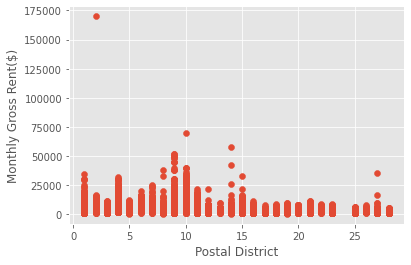

In [6]:
# Plotting
#p = "No. of Bedroom(for Non-Landed Only)"
p = "Postal District"
style.use("ggplot")
# Set up a scatter plot
pyplot.scatter(df[p], df["Monthly Gross Rent($)"])
pyplot.xlabel(p)
pyplot.ylabel('Monthly Gross Rent($)')
pyplot.show()